# Training a Neural Network (1.0 points)

In this assignment, your task is to train a Neural Network or Multilayered Perceptron (MLP) classifier on synthetic data. 
Please read the assignment entirely before you start coding. Most of the code that implements the neural network is provided to you. What you are expected to do is fill in certain missing parts that are required and then train 2 different networks using gradient descent (Details below). 

- <a href='#non-linear activation functions'>Question 1</a> (0.2) Fill in the code to implement the sigmoid and relu functions and their derivatives. Next plot all four functions to certify your implementation is correct. See the example first
- <a href='#the neural network'>Question 2</a> (0.8) Fill in the code inside the __Neural_Network__ Class. Then train two networks one with sigmoid non-linearities for all the layers and one with relu non-linearities and softmax output.
  - <a href='#feedforward'>a.</a> Complete the code in the feedforward method of the Neural_Network Class. Assuming 
      that the input of a layer is $a^{l-1}$ (which is the activation of a previous layer or the input feature vector) then 
      the linear output of the layer is: $z^{l}=W*a^{l-1} + b$. Then the non-linear output or 
      "activation" is $a^{l-1} = f(z^{l})$ where $f()$ is the non-linearity of the layer. Use the gradient checking code (found  <a href='#checking'>here.</a>) to ensure your additions to the code are working correctly. 
      In our case this can be a sigmoid or a relu for hidden layers and it is always a sigmoid for the output layer.      
  - <a href='#backward'>b.</a> Explain briefly (a short paragraph) what is done by the for loop at the end of the __backprop__ method of the __Neural_Network__ Class. 
  - <a href='#Define Network'>c.</a> Train a network with sigmoid non-linearities across all layers. Then plot the 
      accuracy and error curves. Finally visualize the estimated posterior. The code needed for you to do that is provided. 
  - <a href='#Train2'>d.</a> By using the previous question's code as an example, train a network with relu non-linearities for the hidden layers and a sigmoid non-linearity for the output layer. Then plot the accuracy and error curves. Finally visualize the estimated posterior. The code for the last two tasks is provided. Then briefly compare on the performance of the two networks.
  
    


#### Imports

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from construct_data import construct_data
from gradientChecking import checkNNGradients,compute_numerical_gradient 
from numpy.random import RandomState
from numpy import unravel_index

#### Data Generation - Visualization

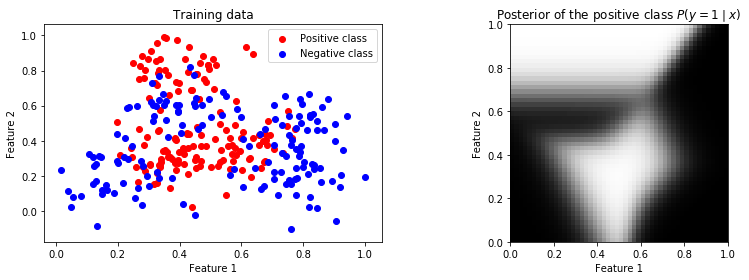

In [2]:
prng=RandomState(1)


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

features, labels, posterior = construct_data(300, 'train', 'nonlinear' , plusminus=True)

# Extract features for both classes
features_pos = features[labels == 1]
features_neg = features[labels != 1]

# Display data
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(features_pos[:, 0], features_pos[:, 1], c="red", label="Positive class")
ax.scatter(features_neg[:, 0], features_neg[:, 1], c="blue", label="Negative class")

ax.set_title("Training data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.imshow(posterior, extent=[0, 1, 0, 1], origin='lower')
ax.set_title("Posterior of the positive class $P(y=1 \mid x)$")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

plt.show()


#negative label values transformed from -1 to 0
for i in range(labels.shape[0]):
    if labels[i]==-1:
        labels[i]=0

# creating alternative input       
data=[] 
for x,y in zip(features,labels): # creating alternative input
    x=x[:,np.newaxis]
    #v.append(np.array([x,y]))
    data.append(np.array([x,y]))
    

## Analytical Derivative of a Function 
Here we present an example of how to compute the gradient of a function. Lets consider the function $f(x)=x^2$. Analytically we know that $f'(x)=2 x$. Thus for some x we can analytically caclulate the derivative of x. The following python functions compute $f$ and $f'$. 

In [3]:
def square(x):
    f=x**2
    return f
def derivative_square(x):
    f_dot=2*x
    return f_dot

We can visualize the function and its derivative using the following commands  

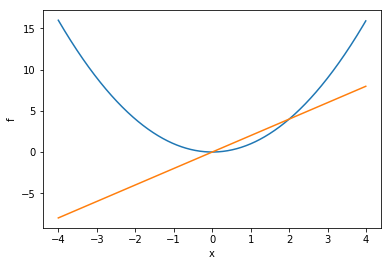

In [4]:
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 1)
x= np.arange(-4,4,0.01) #interval in which we plot the functions
f=square(x)
ax.plot(x,f)
f_dot=derivative_square(x)
ax.plot(x,f_dot)
plt.xlabel('x')
plt.ylabel('f')

<a id='non-linear activation functions'></a>

# Question 1

## Non-linear activation functions 
Fill in the functions that implement the non-linear functions which are used to produve the activations of the neurons of a neural network. Remember that for if $\sigma(x)$ is the sigmoid function, its derivative is $\sigma'(x)=\sigma(x)*(1-\sigma(x))$. Finally if $relu(x)=max(0,x)$ then $relu'(x>0)= 1$ and $relu'(x<=0)=0$.
##### DO NOT CHANGE THE NAMES OF THE FUNCTIONS AND THE ARGUMENTS.



In [5]:
#TO DO (Q1) 
def sigmoid(z):
    g = 1.0/(1.0 + np.exp(-z))
    return g

def sigmoid_gradient(z):
    g = sigmoid(z)*(1.-sigmoid(z))
    return g

def relu(x):
    g = x*(x>0)
    return g

def relu_gradient(z):
    g = 1.*(z>0)
    return g
#TO DO (Q1)

##### Visualize the functions and their gradients by plotting their output in the [-6,6] interval:

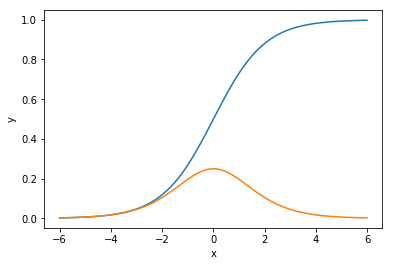

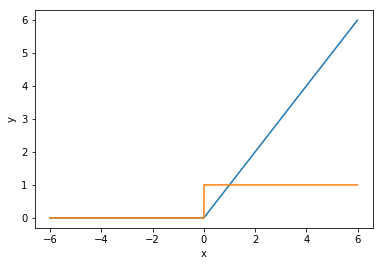

In [6]:
#########TO DO (Q1)###########

#--------Sigmoid and gradient-------
fig = plt.figure(figsize = plt.figaspect(0.3))
ax = fig.add_subplot(1,2,1)
z = np.arange(-6,6,0.01)
f = sigmoid(z)
ax.plot(z,f)
f_dot = sigmoid_gradient(z)
ax.plot(z,f_dot)
plt.xlabel('x')
plt.ylabel('y')

#------Relu and gradient----------
fig = plt.figure(figsize = plt.figaspect(0.3))
ax = fig.add_subplot(1,2,1)
x = np.arange(-6,6,0.01)
g = relu(x)
ax.plot(z,g)
g_dot = relu_gradient(z)
ax.plot(z,g_dot)
plt.xlabel('x')
plt.ylabel('y')

#########TO DO (Q1)##########

# Question 2
<a id='the neural network'></a>
## The Neural Network 
In this assignement in order to define, train and utilize a neural network we are going to first use the implementation provided below. Every operation related to the network is defined as a __method__ (ex. def feedforward , def backpropagation, etc) of the class __Neural_Network__. Try to go through the code to identify what each method inside the class does. Note that when first creating a Neural_Network class object (as shown <a href='#Define Network'> here </a>) , everything inside the def _init_ method is executed.  Also try to connect the notation inside the code with the notation from the slides

<h2>A very basic introduction to classes in python</h2>

This is for the students that are not familiar with class structures in python, if you feel that you know enough you can skip this part and move to the assignment itself, otherwise take the time to go through the explanations and play with the toy example below.

"Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state." (dixit python documentation). 

<h3> Defining a class </h3>
A class contains attributes and methods. The former corresponding to internal variables of the class and the later corresponding to functions that typically use/modify the attributes. To illustrate the workings of a class, we use a toy example: class <b>Operations</b> that can apply operators (addition, subtraction, multiplication, and division) to its only attribute <b>attribute</b>, a number. Our class has five methods: <b>\_\_init\_\_(.)</b>, <b>add(.)</b>, <b>subtract(.)</b>, <b>multiply(.)</b>, and <b>divide(.)</b>. The first one is used by python to initialise an instance of the class when creating it, the other four corresponds to methods that modify the class attribute using four different operators. All of the methods only require one input arguments.

The python keyword <b>self</b> is only used INTERNALLY in a class to define and refer to the internal attributes and methods of the class. To create a class's attribute use the syntax <b>self.name_of_attribute = ...</b> and to define a class's method use the syntax <b>def method(self,other_args)</b>. To access a class's attribute internally use <b>self.name_of_attribute</b>. Similarly to call a method internally use <b>self.name_of_method_to_call(args)</b>.

<h3> Using a class </h3>
To create an instance of a class use the syntax <b>variable = ClassName(input\_args)</b> which associate to <b>variable</b> an instance of the class <b>ClassName</b>. Here, python automatically calls the method <b>\_\_init\_\_(input\_args)</b> to typically initialise the attributes of the class. A method <b>\_\_init\_\_(input\_args)</b> should be defined in any class (for those familiar with C++ this corresponds to a constructor method) and might take any number of arguments as <b>input\_args</b>. In our toy example, the method <b>\_\_init\_\_(input_number)</b> requires only an input number to initialise the attribute. The others methods can be used to modify our attribute, they all require an external input corresponding to the number to add to, subtract from, multiply with, or divide with the internal attribute of our class.

To retrieve an attribute or call a method of an instance of a class, much like calling function from a library imported, python use the dot <b>.</b> operator: <b>class_instance.method(method\_args)</b>. Note that when calling a method, the keyword <b>self</b> should NOT be passed as argument (it is implied with the <b>.</b>).

We provide below a few lines of codes defining the class <b>Operations</b> as well as a few lines showcasing it. Feel free to play with it to make sure you understand what is happening. Once you feel like you have a good grasp of how it works, you should be able to complete the assignment. However, note that this remains a very superficial introduction to class in python, if you are interested to look into object oriented programming with python we refer you to the python documentation on classes https://docs.python.org/3/tutorial/classes.html.

In [7]:
#############################################################################################################
## Definitions of our toy class
class Operations:
    
    # Initialisation funtion
    def __init__(self,input_number):
        # Initialisation of our class' only attribute
        self.attribute = input_number
        
    # Methods    
    def add(self,a):
        print("Adding input",a,"to attribute",self.attribute)
        self.attribute += a
        
    def subtract(self,b):
        print("Subtracting input",b,"from attribute",self.attribute)
        self.attribute -= b
        
    def multiply(self,c):
        print("Multiplying attribute",self.attribute,"with input",c)
        self.attribute *= c
        
    def divide(self,d):
        print("Dividing attribute",self.attribute,"by input",d)
        self.attribute /= d

#############################################################################################################
## Testing the toy class
class_instance = Operations(2) # Creation of an instance of our class "operations" with initial attribute "2"

class_instance.add(3) # Calling add method
print("New attribute:",class_instance.attribute)

class_instance.subtract(1) # Calling subtract method
print("New attribute:",class_instance.attribute)

class_instance.multiply(2) # Calling multiply method
print("New attribute:",class_instance.attribute)

class_instance.divide(4) # Calling divide method
print("New attribute:",class_instance.attribute)

Adding input 3 to attribute 2
New attribute: 5
Subtracting input 1 from attribute 5
New attribute: 4
Multiplying attribute 4 with input 2
New attribute: 8
Dividing attribute 8 by input 4
New attribute: 2.0


<a id='feedforward'></a>
### Complete the feedforward method 

<a href='#feedforward'></a>
 You need to complete the feedforward method (Question 2a) which is defined inside the Neural_Network class (i.e in the code cell below). Then you need to complete the Cost_softmax method that should compute the cost when a softmax is used.

In [8]:
class Neural_Network(object):
    # For Question 2 first focus on def __init__ and def feedforward
    def __init__(self, nnodes,activation_functions='sigmoid'):
        # nnodes: number of hidden units per layer  - e.g. [2,5,10] indicates a three-layer network with the respective number of nodes
        self.num_layers = len(nnodes)
        # weights, biases: list of the numpy arrays containing model parameters for linear layers
        # sampled originally from a gaussian distribution
        self.sizes = nnodes
        prng=RandomState(2)
        self.biases = [prng.randn(y, 1) for y in nnodes[1:]]
        self.weights = [prng.randn(y, x) for x, y in zip(nnodes[:-1], nnodes[1:])]       
        # non-linearity, specified when the network is initialized 
        self.activation_functions=activation_functions
        self.costs=[]  # stores the costs during training
        self.accuracies=[] # stores the accuracies during training 
          
    def feedforward(self, inputs):
        #Computes the output of the network if a is the input 
        # In our case inputs.shape = (2,1), namely the input is a 2-dimensional vector
        activations = []
        activations.append(inputs) # non linear outputs appended to this list 
        zs= [] # linear outputs appended to this list
        
        # loop over all hidden layers (not the output layer ,which is handled after the for loop)
        for l in range(len(self.weights)-1):
            b = self.biases[l]
            w = self.weights[l]

            ##### TO DO Q2 linear output ##### 1 or 2 lines of code 
            z = np.dot(w, inputs) + b
            ##### TO DO Q2 linear output #####

            if self.activation_functions=='sigmoid':
                
            ##### TO DO Q2 sigmoid ##### 1 line of code 
                activation = sigmoid(z)
            ##### TO DO Q2 sigmoid #####

            elif self.activation_functions=='relu':
                
            ##### TO DO Q2 relu ##### 1 line of code 
                activation = relu(z)
            ##### TO DO Q2 relu #####
            
            # save z values for backprop 
            zs.append(z) 
            # save activations for backprop
            activations.append(activation)
            # the input at the next layer is the activation of the previous layer
            inputs=activation  
            
        # compute the output layer's linear and non-linear outputs

        w=self.weights[-1]
        b=self.biases[-1]
        z =np.dot(w,inputs)+b
        activation=sigmoid(z)
        activations.append(activation)
        zs.append(z)
        return activation,zs,activations
    
    
    def cost_function(self,X):
        # computes the cross entropy cost for a single example X=(x,y), where x is input and y is desired label
        cost = 0;
        for n in range(len(X)):
            x=X[n][0]
            y=X[n][1] 
            posterior,dum1,dum2=self.feedforward(x) # (2,1)
            sample_cost  = -int(y==0) * np.log(posterior[0]) - int(1-y==0) * np.log(1-posterior[0]) 
            sample_cost += -int(y==1) * np.log(posterior[1]) - int(1-y==1) * np.log(1-posterior[1]) 
            cost = cost + sample_cost
        return cost 

    def Gradient_Descent(self, training_data, epochs,lr,stop,test_data=None):
        # training_data is a list of tuples ([x1,x2],y) where y is the class and [x1,x2] is numpy array
        # lr is the learning_rate, it is scalar
        # epochs is a scalar value for the number of times the network is going to update its parameters        
        for j in range(epochs):
            self.update_params(training_data,lr) 
            cost =self.cost_function(training_data)
            self.costs.append(cost/len(training_data))
            if test_data:
                if test_data: n_test = len(test_data)
                correct = self.evaluate(test_data)
                print ("Epoch {0}: {1} / {2} Cost: {3}".format(j, correct, n_test,cost/len(training_data)))
                self.accuracies.append(correct/n_test)
                if correct > stop: return
            else:
                print ("Epoch {0} complete".format(j))

    def update_params(self, X, lr):
        # X is all the training data
        # X contains pairs (x,y) where x is the feature vector and y its class label
        N= len(X)
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        #Gradient Descent parameter updates
        for x, y in X:
            delta_grad_b, delta_grad_w = self.backprop(x, y) # take an example backpropagate to find the gradients
            grad_b = [nb+dnb for nb, dnb in zip(grad_b, delta_grad_b)] # accumulate gradients for biases
            grad_w = [nw+dnw for nw, dnw in zip(grad_w, delta_grad_w)] # accumulate gradients for weights
        
        # Update the weights and biases using the gradient of the cost computed using the whole training_dataset
        # divide by N to scale the overall gradient by the number of training examples
        self.weights = [w-lr*nw/N for w, nw in zip(self.weights, grad_w)]  
        self.biases =  [b-lr*nb/N for b, nb in zip(self.biases,  grad_b)]

        
        
    def backprop(self, x, y):
        #Returns (grad_b, grad_w) representing the
        #gradients for the cost function  wrt b and w . 
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        ######### Forward pass of the backprop #########
        
        dummy,zs,activations= self.feedforward(x) #dummy is not used below 
        
        # one hot encoding of the desired label
        # so if for example y=1 then the one-hot encoding of y is y =[0 , 1]
        
        if y==0:
            y=np.array([[1],[0]])
        else:
            y=np.array([[0],[1]])
        
        ######## Backward pass of the backprop ##########
        
        # Grad at the ouput layer 
        z=zs[-1]
        delta = (activations[-1]- y)
        # grad wrt the parameters of the output layer

        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)
        
        # By uncommenting the following lines the you will be printing the shapes of each variable used
        # to compute the gradient at the output layer
        '''
        print('---- shapes')
        print('output-layer')
        print('activation',activations[-1].shape) 
        print('z', z.shape)
        print('delta',delta.shape)
        print('grad_b ',grad_b[-1].shape,' grad_w ',grad_w[-1].shape,'delta',delta.shape) 
        '''
        
        ############# TO DO Q2b explain what is done by following for loop###############
        'Explaination given in mark down cell after the code'
        
        # Grad at the rest of the layers

        L = self.num_layers #  input layer + hidden layers + ouput layers
        # zs has L-1 elements , activations has L elements , self.weights has L-1 elements
        # start from 2nd-to-last layer (hence the L-2 index) and move backwards 
        for l in range(L-2, 0,-1):   
            # linear output of the l-th layer
            z = zs[l-1]        
            
            # input to the l-th layer
            # which is the activation of the (l-1)-th layer
            activation=activations[l-1] 
            
            # take the weights that map the output of the 
            # l-th layer to the input of the (l+1)-th layer
            weights=self.weights[l] 
            
            # compute the value of the gradient of the non-linearity of the l-th layer 
            # given the z of the l-th layer 
            if self.activation_functions=='relu': sg = relu_gradient(z)
            elif self.activation_functions=='sigmoid': sg = sigmoid_gradient(z)
                
            # backpropagate delta from (l+1)-th layer to l-th layer
            prod  = np.dot(weights.T, delta)    
            delta = prod * sg
            
            # gradients of the parameters of the l-th layer
            grad_b[l-1] = delta 
            grad_w[l-1] = np.dot(delta, activation.T) 
            
            # By uncommenting the following lines the 
            # function will be printing the shapes of each variable 
            
            '''
            print('---- shapes')
            print('layer:',l)  
            print('activation ',activation.shape)
            print('z ', z.shape)
            print('w ',weights.shape)       
            print('prod ',prod.shape,'sg',sg.shape)
            print('delta ',delta.shape)
            print('grad_b ',grad_b[-l].shape,' grad_w ',grad_w[-l].shape) 
            '''
        return (grad_b, grad_w)
        
        ############# TO DO Q2b explain what is done by following for loop###############

    def evaluate(self, data):
        correct = 0
        for index in range(len(data)):
            feature = data[index][0]
            label   =  data[index][1]
            output,dum1,dum2 = self.feedforward(feature)
            correct = correct  + int(label == np.argmax(output))
        return correct



## Question 2b : For Loop Explanation

The for loop is utilizing the neural network architecture we defined earlier and taking our data through the training process. In particular, it focuses on the error minimization and weight updated taking place during backpropogation of our delta outputs. 

In the first step of the for loop we are defining the layers of interest. Then we are moving our delta terms through the hidden layers and updating the weights. To do this we use the gradient descent of our activation functions that we defined in question 1. We keep repeating the process of moving backwards through our layers till we have updated the weights coming out of our input layers.



<a id='checking'></a>
#### Gradient checking:
We are going to use $gradient$ $checking$ to check if the numerical (using approximations) and analytical (computed by our backprop implementation) gradient computations match. To test that we are going to check the gradients computed for a small neural network. 

Suppose we have a neural network with 2 dimensional inputs , 2 hidde layers of 4 neurons each with sigmoid non-linearities and an output layer of 2 neurons with sigmoid non-linearity. This network is initialized as shown by the code in the next cell.

In [9]:
nnodes2=[2,4,2]
activation_functions_checking='sigmoid' 
nnet_checking = Neural_Network(nnodes2,activation_functions_checking)

We are going to use a few training examples to check if the analytical and numerical gradients match.

In [10]:
m=50 # using 50 examples to do gradient checking 
train_data = data[1:m] 
checkNNGradients(nnet_checking,train_data)                 # compute_numerical_gradient 

Relative difference 1.26178460649e-07 for layer 0 parameters
Analytical and numerical gradients match
as relative distance is less that 1e-5
Relative difference 2.51045624503e-08 for layer 1 parameters
Analytical and numerical gradients match
as relative distance is less that 1e-5


<a id='Define Network'></a>
#### Define a Network 
To initialize a Neural Network we must provide two arguments: $nnodes$ and activation_functions. $nnodes$ is a list. Each 
element of $nnodes$ defines the number of neurons of each layer of the network. By convention the first element of $nnodes$
defines the input layer of the network that is not associated with any weights and biases. The rest of the elements of 
$nnodes$ are used to initialize the weigths and biases of the hidden layers and the output layer. The activation_functions 
argument is a string that defines the type of non-linear function to be used for each neuron of the hidden layer. Our 
implementation supports ReLUs and sigmoids as activation functions. The output layer is set to always be a sigmoid function. 



#### Execute the following three cells to 1) define a network 2) train it 3) visualize the estimated posterior 

In [11]:
nnodes=[2, 10,10, 2]
activation_functions='sigmoid' # use 'sigmoid' or 'relu'
nnet = Neural_Network(nnodes,activation_functions)
#print(nnet.weights) # uncomment to see weights after they have been initialized

In [12]:
learning_rate=2 # 
epochs = 15000  ## usually has already converged around that number
stop = 260 #  number of correctly classified performance to which we wish to stop training / set it to a number close to 300
train_data = data
test_data = data #evaluate the performance on the train data
nnet.Gradient_Descent(train_data,epochs,learning_rate,stop,test_data)

Epoch 0: 150 / 300 Cost: [ 2.16889996]
Epoch 1: 150 / 300 Cost: [ 2.8487349]
Epoch 2: 150 / 300 Cost: [ 2.48714604]
Epoch 3: 150 / 300 Cost: [ 2.12390887]
Epoch 4: 150 / 300 Cost: [ 2.02194588]
Epoch 5: 150 / 300 Cost: [ 1.6746181]
Epoch 6: 150 / 300 Cost: [ 1.69613043]
Epoch 7: 150 / 300 Cost: [ 1.78170732]
Epoch 8: 150 / 300 Cost: [ 2.16873431]
Epoch 9: 199 / 300 Cost: [ 1.84604524]
Epoch 10: 192 / 300 Cost: [ 1.87002109]
Epoch 11: 183 / 300 Cost: [ 1.57654504]
Epoch 12: 194 / 300 Cost: [ 1.53813784]
Epoch 13: 177 / 300 Cost: [ 1.4626254]
Epoch 14: 186 / 300 Cost: [ 1.43928743]
Epoch 15: 177 / 300 Cost: [ 1.41144273]
Epoch 16: 184 / 300 Cost: [ 1.39942273]
Epoch 17: 180 / 300 Cost: [ 1.3874795]
Epoch 18: 182 / 300 Cost: [ 1.38104454]
Epoch 19: 179 / 300 Cost: [ 1.37507961]
Epoch 20: 181 / 300 Cost: [ 1.37120408]
Epoch 21: 179 / 300 Cost: [ 1.36763733]
Epoch 22: 178 / 300 Cost: [ 1.36491257]
Epoch 23: 178 / 300 Cost: [ 1.36234613]
Epoch 24: 178 / 300 Cost: [ 1.36013383]
Epoch 25: 177 

Epoch 205: 167 / 300 Cost: [ 1.25385751]
Epoch 206: 192 / 300 Cost: [ 1.25343649]
Epoch 207: 169 / 300 Cost: [ 1.25261115]
Epoch 208: 192 / 300 Cost: [ 1.25218002]
Epoch 209: 170 / 300 Cost: [ 1.25134527]
Epoch 210: 192 / 300 Cost: [ 1.25090306]
Epoch 211: 169 / 300 Cost: [ 1.25005847]
Epoch 212: 192 / 300 Cost: [ 1.24960452]
Epoch 213: 170 / 300 Cost: [ 1.24874999]
Epoch 214: 192 / 300 Cost: [ 1.24828395]
Epoch 215: 171 / 300 Cost: [ 1.24741966]
Epoch 216: 192 / 300 Cost: [ 1.24694144]
Epoch 217: 173 / 300 Cost: [ 1.24606781]
Epoch 218: 192 / 300 Cost: [ 1.24557759]
Epoch 219: 174 / 300 Cost: [ 1.24469517]
Epoch 220: 192 / 300 Cost: [ 1.24419337]
Epoch 221: 174 / 300 Cost: [ 1.24330283]
Epoch 222: 193 / 300 Cost: [ 1.24279006]
Epoch 223: 174 / 300 Cost: [ 1.24189214]
Epoch 224: 194 / 300 Cost: [ 1.2413692]
Epoch 225: 174 / 300 Cost: [ 1.24046463]
Epoch 226: 194 / 300 Cost: [ 1.23993249]
Epoch 227: 174 / 300 Cost: [ 1.23902201]
Epoch 228: 194 / 300 Cost: [ 1.23848178]
Epoch 229: 174 / 

Epoch 408: 233 / 300 Cost: [ 1.03368329]
Epoch 409: 220 / 300 Cost: [ 1.03109627]
Epoch 410: 231 / 300 Cost: [ 1.03209581]
Epoch 411: 220 / 300 Cost: [ 1.0295445]
Epoch 412: 231 / 300 Cost: [ 1.03054376]
Epoch 413: 220 / 300 Cost: [ 1.02803347]
Epoch 414: 229 / 300 Cost: [ 1.02902517]
Epoch 415: 220 / 300 Cost: [ 1.02656141]
Epoch 416: 230 / 300 Cost: [ 1.02753851]
Epoch 417: 220 / 300 Cost: [ 1.02512693]
Epoch 418: 229 / 300 Cost: [ 1.02608272]
Epoch 419: 220 / 300 Cost: [ 1.02372901]
Epoch 420: 229 / 300 Cost: [ 1.02465715]
Epoch 421: 219 / 300 Cost: [ 1.02236697]
Epoch 422: 229 / 300 Cost: [ 1.02326157]
Epoch 423: 219 / 300 Cost: [ 1.02104042]
Epoch 424: 229 / 300 Cost: [ 1.02189605]
Epoch 425: 219 / 300 Cost: [ 1.0197493]
Epoch 426: 230 / 300 Cost: [ 1.02056099]
Epoch 427: 219 / 300 Cost: [ 1.01849375]
Epoch 428: 230 / 300 Cost: [ 1.01925703]
Epoch 429: 219 / 300 Cost: [ 1.01727419]
Epoch 430: 230 / 300 Cost: [ 1.01798505]
Epoch 431: 219 / 300 Cost: [ 1.01609124]
Epoch 432: 230 / 3

Epoch 609: 229 / 300 Cost: [ 0.98154891]
Epoch 610: 232 / 300 Cost: [ 0.98137748]
Epoch 611: 229 / 300 Cost: [ 0.98123594]
Epoch 612: 232 / 300 Cost: [ 0.98107164]
Epoch 613: 229 / 300 Cost: [ 0.98092747]
Epoch 614: 232 / 300 Cost: [ 0.98077014]
Epoch 615: 229 / 300 Cost: [ 0.98062346]
Epoch 616: 232 / 300 Cost: [ 0.98047292]
Epoch 617: 228 / 300 Cost: [ 0.98032384]
Epoch 618: 232 / 300 Cost: [ 0.98017991]
Epoch 619: 228 / 300 Cost: [ 0.9800285]
Epoch 620: 232 / 300 Cost: [ 0.97989101]
Epoch 621: 228 / 300 Cost: [ 0.97973735]
Epoch 622: 232 / 300 Cost: [ 0.9796061]
Epoch 623: 228 / 300 Cost: [ 0.97945025]
Epoch 624: 232 / 300 Cost: [ 0.97932507]
Epoch 625: 228 / 300 Cost: [ 0.97916706]
Epoch 626: 232 / 300 Cost: [ 0.97904776]
Epoch 627: 228 / 300 Cost: [ 0.97888766]
Epoch 628: 232 / 300 Cost: [ 0.97877406]
Epoch 629: 227 / 300 Cost: [ 0.97861189]
Epoch 630: 232 / 300 Cost: [ 0.97850381]
Epoch 631: 227 / 300 Cost: [ 0.97833961]
Epoch 632: 232 / 300 Cost: [ 0.97823688]
Epoch 633: 227 / 3

Epoch 811: 230 / 300 Cost: [ 0.96163464]
Epoch 812: 230 / 300 Cost: [ 0.96171017]
Epoch 813: 230 / 300 Cost: [ 0.96151022]
Epoch 814: 230 / 300 Cost: [ 0.96158638]
Epoch 815: 230 / 300 Cost: [ 0.96138676]
Epoch 816: 230 / 300 Cost: [ 0.96146354]
Epoch 817: 230 / 300 Cost: [ 0.96126424]
Epoch 818: 230 / 300 Cost: [ 0.96134163]
Epoch 819: 230 / 300 Cost: [ 0.96114266]
Epoch 820: 230 / 300 Cost: [ 0.96122064]
Epoch 821: 230 / 300 Cost: [ 0.961022]
Epoch 822: 230 / 300 Cost: [ 0.96110058]
Epoch 823: 230 / 300 Cost: [ 0.96090226]
Epoch 824: 230 / 300 Cost: [ 0.96098143]
Epoch 825: 230 / 300 Cost: [ 0.96078343]
Epoch 826: 230 / 300 Cost: [ 0.96086317]
Epoch 827: 230 / 300 Cost: [ 0.96066549]
Epoch 828: 230 / 300 Cost: [ 0.96074581]
Epoch 829: 230 / 300 Cost: [ 0.96054844]
Epoch 830: 230 / 300 Cost: [ 0.96062933]
Epoch 831: 230 / 300 Cost: [ 0.96043228]
Epoch 832: 230 / 300 Cost: [ 0.96051373]
Epoch 833: 230 / 300 Cost: [ 0.96031698]
Epoch 834: 230 / 300 Cost: [ 0.96039899]
Epoch 835: 230 / 3

Epoch 1012: 232 / 300 Cost: [ 0.95284453]
Epoch 1013: 228 / 300 Cost: [ 0.95263658]
Epoch 1014: 232 / 300 Cost: [ 0.95278289]
Epoch 1015: 228 / 300 Cost: [ 0.95257412]
Epoch 1016: 232 / 300 Cost: [ 0.95272172]
Epoch 1017: 228 / 300 Cost: [ 0.9525121]
Epoch 1018: 232 / 300 Cost: [ 0.95266102]
Epoch 1019: 228 / 300 Cost: [ 0.95245055]
Epoch 1020: 232 / 300 Cost: [ 0.95260081]
Epoch 1021: 228 / 300 Cost: [ 0.95238946]
Epoch 1022: 232 / 300 Cost: [ 0.9525411]
Epoch 1023: 228 / 300 Cost: [ 0.95232883]
Epoch 1024: 232 / 300 Cost: [ 0.95248188]
Epoch 1025: 228 / 300 Cost: [ 0.95226869]
Epoch 1026: 232 / 300 Cost: [ 0.95242317]
Epoch 1027: 228 / 300 Cost: [ 0.95220904]
Epoch 1028: 232 / 300 Cost: [ 0.95236499]
Epoch 1029: 228 / 300 Cost: [ 0.95214989]
Epoch 1030: 232 / 300 Cost: [ 0.95230734]
Epoch 1031: 228 / 300 Cost: [ 0.95209125]
Epoch 1032: 232 / 300 Cost: [ 0.95225024]
Epoch 1033: 228 / 300 Cost: [ 0.95203313]
Epoch 1034: 232 / 300 Cost: [ 0.9521937]
Epoch 1035: 228 / 300 Cost: [ 0.95197

Epoch 1210: 228 / 300 Cost: [ 0.95773152]
Epoch 1211: 229 / 300 Cost: [ 0.95714138]
Epoch 1212: 228 / 300 Cost: [ 0.95778378]
Epoch 1213: 229 / 300 Cost: [ 0.95717462]
Epoch 1214: 228 / 300 Cost: [ 0.95780992]
Epoch 1215: 229 / 300 Cost: [ 0.95718244]
Epoch 1216: 228 / 300 Cost: [ 0.95781021]
Epoch 1217: 228 / 300 Cost: [ 0.95716535]
Epoch 1218: 228 / 300 Cost: [ 0.95778545]
Epoch 1219: 228 / 300 Cost: [ 0.95712437]
Epoch 1220: 228 / 300 Cost: [ 0.9577369]
Epoch 1221: 228 / 300 Cost: [ 0.95706091]
Epoch 1222: 228 / 300 Cost: [ 0.95766626]
Epoch 1223: 228 / 300 Cost: [ 0.95697681]
Epoch 1224: 228 / 300 Cost: [ 0.95757561]
Epoch 1225: 228 / 300 Cost: [ 0.95687422]
Epoch 1226: 228 / 300 Cost: [ 0.95746738]
Epoch 1227: 228 / 300 Cost: [ 0.95675555]
Epoch 1228: 228 / 300 Cost: [ 0.95734422]
Epoch 1229: 228 / 300 Cost: [ 0.95662343]
Epoch 1230: 228 / 300 Cost: [ 0.95720894]
Epoch 1231: 228 / 300 Cost: [ 0.95648059]
Epoch 1232: 228 / 300 Cost: [ 0.95706448]
Epoch 1233: 228 / 300 Cost: [ 0.956

Epoch 1407: 228 / 300 Cost: [ 0.94754973]
Epoch 1408: 227 / 300 Cost: [ 0.95074453]
Epoch 1409: 228 / 300 Cost: [ 0.94743653]
Epoch 1410: 227 / 300 Cost: [ 0.9506734]
Epoch 1411: 228 / 300 Cost: [ 0.94732259]
Epoch 1412: 228 / 300 Cost: [ 0.95060168]
Epoch 1413: 228 / 300 Cost: [ 0.94720802]
Epoch 1414: 228 / 300 Cost: [ 0.95052949]
Epoch 1415: 228 / 300 Cost: [ 0.94709289]
Epoch 1416: 228 / 300 Cost: [ 0.95045695]
Epoch 1417: 228 / 300 Cost: [ 0.9469773]
Epoch 1418: 228 / 300 Cost: [ 0.95038415]
Epoch 1419: 228 / 300 Cost: [ 0.94686132]
Epoch 1420: 228 / 300 Cost: [ 0.95031118]
Epoch 1421: 228 / 300 Cost: [ 0.94674503]
Epoch 1422: 228 / 300 Cost: [ 0.9502381]
Epoch 1423: 228 / 300 Cost: [ 0.94662847]
Epoch 1424: 228 / 300 Cost: [ 0.95016496]
Epoch 1425: 228 / 300 Cost: [ 0.94651165]
Epoch 1426: 228 / 300 Cost: [ 0.95009175]
Epoch 1427: 227 / 300 Cost: [ 0.94639459]
Epoch 1428: 228 / 300 Cost: [ 0.95001847]
Epoch 1429: 227 / 300 Cost: [ 0.94627727]
Epoch 1430: 228 / 300 Cost: [ 0.94994

Epoch 1605: 229 / 300 Cost: [ 0.93323479]
Epoch 1606: 228 / 300 Cost: [ 0.94104915]
Epoch 1607: 229 / 300 Cost: [ 0.93304683]
Epoch 1608: 228 / 300 Cost: [ 0.94091193]
Epoch 1609: 229 / 300 Cost: [ 0.93285779]
Epoch 1610: 228 / 300 Cost: [ 0.94077373]
Epoch 1611: 230 / 300 Cost: [ 0.93266764]
Epoch 1612: 228 / 300 Cost: [ 0.94063455]
Epoch 1613: 230 / 300 Cost: [ 0.93247638]
Epoch 1614: 228 / 300 Cost: [ 0.94049438]
Epoch 1615: 230 / 300 Cost: [ 0.932284]
Epoch 1616: 228 / 300 Cost: [ 0.94035322]
Epoch 1617: 230 / 300 Cost: [ 0.9320905]
Epoch 1618: 228 / 300 Cost: [ 0.94021105]
Epoch 1619: 230 / 300 Cost: [ 0.93189586]
Epoch 1620: 228 / 300 Cost: [ 0.94006788]
Epoch 1621: 230 / 300 Cost: [ 0.93170008]
Epoch 1622: 228 / 300 Cost: [ 0.93992369]
Epoch 1623: 230 / 300 Cost: [ 0.93150315]
Epoch 1624: 228 / 300 Cost: [ 0.93977848]
Epoch 1625: 230 / 300 Cost: [ 0.93130506]
Epoch 1626: 228 / 300 Cost: [ 0.93963225]
Epoch 1627: 230 / 300 Cost: [ 0.9311058]
Epoch 1628: 228 / 300 Cost: [ 0.939484

Epoch 1801: 234 / 300 Cost: [ 0.90812132]
Epoch 1802: 229 / 300 Cost: [ 0.92179918]
Epoch 1803: 234 / 300 Cost: [ 0.90777478]
Epoch 1804: 229 / 300 Cost: [ 0.92152098]
Epoch 1805: 234 / 300 Cost: [ 0.90742584]
Epoch 1806: 229 / 300 Cost: [ 0.92124024]
Epoch 1807: 235 / 300 Cost: [ 0.90707449]
Epoch 1808: 229 / 300 Cost: [ 0.9209569]
Epoch 1809: 236 / 300 Cost: [ 0.9067207]
Epoch 1810: 229 / 300 Cost: [ 0.92067091]
Epoch 1811: 236 / 300 Cost: [ 0.90636446]
Epoch 1812: 229 / 300 Cost: [ 0.92038222]
Epoch 1813: 236 / 300 Cost: [ 0.90600574]
Epoch 1814: 228 / 300 Cost: [ 0.92009076]
Epoch 1815: 236 / 300 Cost: [ 0.90564451]
Epoch 1816: 228 / 300 Cost: [ 0.91979647]
Epoch 1817: 236 / 300 Cost: [ 0.90528075]
Epoch 1818: 228 / 300 Cost: [ 0.9194993]
Epoch 1819: 237 / 300 Cost: [ 0.90491445]
Epoch 1820: 228 / 300 Cost: [ 0.91919919]
Epoch 1821: 237 / 300 Cost: [ 0.90454557]
Epoch 1822: 228 / 300 Cost: [ 0.91889606]
Epoch 1823: 235 / 300 Cost: [ 0.90417409]
Epoch 1824: 228 / 300 Cost: [ 0.91858

Epoch 2194: 245 / 300 Cost: [ 0.79776051]
Epoch 2195: 241 / 300 Cost: [ 0.79454842]
Epoch 2196: 245 / 300 Cost: [ 0.79715676]
Epoch 2197: 241 / 300 Cost: [ 0.7939899]
Epoch 2198: 245 / 300 Cost: [ 0.79655457]
Epoch 2199: 241 / 300 Cost: [ 0.79343235]
Epoch 2200: 245 / 300 Cost: [ 0.79595395]
Epoch 2201: 241 / 300 Cost: [ 0.79287578]
Epoch 2202: 244 / 300 Cost: [ 0.79535492]
Epoch 2203: 241 / 300 Cost: [ 0.7923202]
Epoch 2204: 244 / 300 Cost: [ 0.7947575]
Epoch 2205: 241 / 300 Cost: [ 0.79176565]
Epoch 2206: 244 / 300 Cost: [ 0.79416175]
Epoch 2207: 241 / 300 Cost: [ 0.79121217]
Epoch 2208: 243 / 300 Cost: [ 0.79356773]
Epoch 2209: 241 / 300 Cost: [ 0.7906598]
Epoch 2210: 243 / 300 Cost: [ 0.79297552]
Epoch 2211: 241 / 300 Cost: [ 0.79010863]
Epoch 2212: 245 / 300 Cost: [ 0.79238519]
Epoch 2213: 241 / 300 Cost: [ 0.78955872]
Epoch 2214: 245 / 300 Cost: [ 0.79179686]
Epoch 2215: 241 / 300 Cost: [ 0.78901018]
Epoch 2216: 244 / 300 Cost: [ 0.79121064]
Epoch 2217: 240 / 300 Cost: [ 0.788463

Epoch 2391: 243 / 300 Cost: [ 0.75678605]
Epoch 2392: 250 / 300 Cost: [ 0.75794974]
Epoch 2393: 243 / 300 Cost: [ 0.75655993]
Epoch 2394: 250 / 300 Cost: [ 0.75772114]
Epoch 2395: 243 / 300 Cost: [ 0.7563352]
Epoch 2396: 250 / 300 Cost: [ 0.75749399]
Epoch 2397: 243 / 300 Cost: [ 0.75611184]
Epoch 2398: 250 / 300 Cost: [ 0.75726826]
Epoch 2399: 243 / 300 Cost: [ 0.75588984]
Epoch 2400: 250 / 300 Cost: [ 0.75704396]
Epoch 2401: 243 / 300 Cost: [ 0.7556692]
Epoch 2402: 250 / 300 Cost: [ 0.75682105]
Epoch 2403: 243 / 300 Cost: [ 0.75544989]
Epoch 2404: 250 / 300 Cost: [ 0.75659954]
Epoch 2405: 243 / 300 Cost: [ 0.75523192]
Epoch 2406: 250 / 300 Cost: [ 0.75637941]
Epoch 2407: 243 / 300 Cost: [ 0.75501526]
Epoch 2408: 250 / 300 Cost: [ 0.75616065]
Epoch 2409: 243 / 300 Cost: [ 0.75479992]
Epoch 2410: 250 / 300 Cost: [ 0.75594325]
Epoch 2411: 243 / 300 Cost: [ 0.75458587]
Epoch 2412: 250 / 300 Cost: [ 0.7557272]
Epoch 2413: 243 / 300 Cost: [ 0.75437313]
Epoch 2414: 250 / 300 Cost: [ 0.75551

Epoch 2587: 243 / 300 Cost: [ 0.74006363]
Epoch 2588: 251 / 300 Cost: [ 0.74110462]
Epoch 2589: 243 / 300 Cost: [ 0.73993874]
Epoch 2590: 251 / 300 Cost: [ 0.74097873]
Epoch 2591: 243 / 300 Cost: [ 0.73981456]
Epoch 2592: 251 / 300 Cost: [ 0.74085354]
Epoch 2593: 243 / 300 Cost: [ 0.73969108]
Epoch 2594: 251 / 300 Cost: [ 0.74072905]
Epoch 2595: 243 / 300 Cost: [ 0.73956829]
Epoch 2596: 251 / 300 Cost: [ 0.74060525]
Epoch 2597: 243 / 300 Cost: [ 0.73944618]
Epoch 2598: 251 / 300 Cost: [ 0.74048213]
Epoch 2599: 243 / 300 Cost: [ 0.73932476]
Epoch 2600: 251 / 300 Cost: [ 0.74035969]
Epoch 2601: 243 / 300 Cost: [ 0.73920402]
Epoch 2602: 251 / 300 Cost: [ 0.74023792]
Epoch 2603: 243 / 300 Cost: [ 0.73908394]
Epoch 2604: 251 / 300 Cost: [ 0.74011682]
Epoch 2605: 243 / 300 Cost: [ 0.73896453]
Epoch 2606: 251 / 300 Cost: [ 0.73999638]
Epoch 2607: 243 / 300 Cost: [ 0.73884578]
Epoch 2608: 251 / 300 Cost: [ 0.73987659]
Epoch 2609: 243 / 300 Cost: [ 0.73872768]
Epoch 2610: 251 / 300 Cost: [ 0.73

Epoch 2786: 253 / 300 Cost: [ 0.73125749]
Epoch 2787: 244 / 300 Cost: [ 0.73024674]
Epoch 2788: 253 / 300 Cost: [ 0.73117837]
Epoch 2789: 244 / 300 Cost: [ 0.73016899]
Epoch 2790: 253 / 300 Cost: [ 0.73109956]
Epoch 2791: 245 / 300 Cost: [ 0.73009155]
Epoch 2792: 253 / 300 Cost: [ 0.73102105]
Epoch 2793: 245 / 300 Cost: [ 0.7300144]
Epoch 2794: 253 / 300 Cost: [ 0.73094284]
Epoch 2795: 245 / 300 Cost: [ 0.72993754]
Epoch 2796: 253 / 300 Cost: [ 0.73086492]
Epoch 2797: 245 / 300 Cost: [ 0.72986098]
Epoch 2798: 253 / 300 Cost: [ 0.7307873]
Epoch 2799: 245 / 300 Cost: [ 0.7297847]
Epoch 2800: 253 / 300 Cost: [ 0.73070998]
Epoch 2801: 245 / 300 Cost: [ 0.72970872]
Epoch 2802: 253 / 300 Cost: [ 0.73063294]
Epoch 2803: 245 / 300 Cost: [ 0.72963302]
Epoch 2804: 253 / 300 Cost: [ 0.7305562]
Epoch 2805: 245 / 300 Cost: [ 0.7295576]
Epoch 2806: 253 / 300 Cost: [ 0.73047974]
Epoch 2807: 245 / 300 Cost: [ 0.72948246]
Epoch 2808: 253 / 300 Cost: [ 0.73040356]
Epoch 2809: 245 / 300 Cost: [ 0.7294076

Epoch 2985: 244 / 300 Cost: [ 0.72371828]
Epoch 2986: 253 / 300 Cost: [ 0.72456627]
Epoch 2987: 244 / 300 Cost: [ 0.72366207]
Epoch 2988: 253 / 300 Cost: [ 0.7245095]
Epoch 2989: 244 / 300 Cost: [ 0.72360602]
Epoch 2990: 253 / 300 Cost: [ 0.72445289]
Epoch 2991: 244 / 300 Cost: [ 0.72355013]
Epoch 2992: 253 / 300 Cost: [ 0.72439645]
Epoch 2993: 244 / 300 Cost: [ 0.72349439]
Epoch 2994: 253 / 300 Cost: [ 0.72434017]
Epoch 2995: 244 / 300 Cost: [ 0.72343881]
Epoch 2996: 253 / 300 Cost: [ 0.72428405]
Epoch 2997: 244 / 300 Cost: [ 0.72338339]
Epoch 2998: 253 / 300 Cost: [ 0.72422809]
Epoch 2999: 244 / 300 Cost: [ 0.72332811]
Epoch 3000: 253 / 300 Cost: [ 0.7241723]
Epoch 3001: 244 / 300 Cost: [ 0.72327299]
Epoch 3002: 254 / 300 Cost: [ 0.72411666]
Epoch 3003: 244 / 300 Cost: [ 0.72321802]
Epoch 3004: 254 / 300 Cost: [ 0.72406118]
Epoch 3005: 244 / 300 Cost: [ 0.72316321]
Epoch 3006: 254 / 300 Cost: [ 0.72400586]
Epoch 3007: 244 / 300 Cost: [ 0.72310854]
Epoch 3008: 254 / 300 Cost: [ 0.7239

Epoch 3181: 246 / 300 Cost: [ 0.71884813]
Epoch 3182: 253 / 300 Cost: [ 0.71967276]
Epoch 3183: 246 / 300 Cost: [ 0.71880403]
Epoch 3184: 253 / 300 Cost: [ 0.71962877]
Epoch 3185: 246 / 300 Cost: [ 0.71876003]
Epoch 3186: 253 / 300 Cost: [ 0.71958489]
Epoch 3187: 246 / 300 Cost: [ 0.71871613]
Epoch 3188: 253 / 300 Cost: [ 0.7195411]
Epoch 3189: 246 / 300 Cost: [ 0.71867232]
Epoch 3190: 253 / 300 Cost: [ 0.71949742]
Epoch 3191: 246 / 300 Cost: [ 0.7186286]
Epoch 3192: 253 / 300 Cost: [ 0.71945383]
Epoch 3193: 246 / 300 Cost: [ 0.71858497]
Epoch 3194: 253 / 300 Cost: [ 0.71941034]
Epoch 3195: 246 / 300 Cost: [ 0.71854143]
Epoch 3196: 253 / 300 Cost: [ 0.71936695]
Epoch 3197: 246 / 300 Cost: [ 0.71849799]
Epoch 3198: 253 / 300 Cost: [ 0.71932367]
Epoch 3199: 246 / 300 Cost: [ 0.71845463]
Epoch 3200: 253 / 300 Cost: [ 0.71928047]
Epoch 3201: 246 / 300 Cost: [ 0.71841137]
Epoch 3202: 253 / 300 Cost: [ 0.71923738]
Epoch 3203: 246 / 300 Cost: [ 0.71836819]
Epoch 3204: 253 / 300 Cost: [ 0.7191

Epoch 3379: 248 / 300 Cost: [ 0.71486573]
Epoch 3380: 253 / 300 Cost: [ 0.71573733]
Epoch 3381: 248 / 300 Cost: [ 0.71482874]
Epoch 3382: 253 / 300 Cost: [ 0.71570122]
Epoch 3383: 248 / 300 Cost: [ 0.7147918]
Epoch 3384: 253 / 300 Cost: [ 0.71566516]
Epoch 3385: 248 / 300 Cost: [ 0.71475492]
Epoch 3386: 253 / 300 Cost: [ 0.71562917]
Epoch 3387: 248 / 300 Cost: [ 0.71471808]
Epoch 3388: 253 / 300 Cost: [ 0.71559323]
Epoch 3389: 248 / 300 Cost: [ 0.71468129]
Epoch 3390: 253 / 300 Cost: [ 0.71555735]
Epoch 3391: 248 / 300 Cost: [ 0.71464455]
Epoch 3392: 253 / 300 Cost: [ 0.71552154]
Epoch 3393: 248 / 300 Cost: [ 0.71460787]
Epoch 3394: 253 / 300 Cost: [ 0.71548578]
Epoch 3395: 248 / 300 Cost: [ 0.71457123]
Epoch 3396: 253 / 300 Cost: [ 0.71545008]
Epoch 3397: 248 / 300 Cost: [ 0.71453464]
Epoch 3398: 253 / 300 Cost: [ 0.71541443]
Epoch 3399: 248 / 300 Cost: [ 0.7144981]
Epoch 3400: 253 / 300 Cost: [ 0.71537885]
Epoch 3401: 248 / 300 Cost: [ 0.71446161]
Epoch 3402: 253 / 300 Cost: [ 0.7153

Epoch 3576: 252 / 300 Cost: [ 0.71244135]
Epoch 3577: 247 / 300 Cost: [ 0.7114048]
Epoch 3578: 252 / 300 Cost: [ 0.71240988]
Epoch 3579: 247 / 300 Cost: [ 0.71137148]
Epoch 3580: 252 / 300 Cost: [ 0.71237845]
Epoch 3581: 247 / 300 Cost: [ 0.71133819]
Epoch 3582: 252 / 300 Cost: [ 0.71234705]
Epoch 3583: 247 / 300 Cost: [ 0.71130492]
Epoch 3584: 252 / 300 Cost: [ 0.71231569]
Epoch 3585: 247 / 300 Cost: [ 0.71127167]
Epoch 3586: 252 / 300 Cost: [ 0.71228437]
Epoch 3587: 247 / 300 Cost: [ 0.71123845]
Epoch 3588: 252 / 300 Cost: [ 0.71225309]
Epoch 3589: 247 / 300 Cost: [ 0.71120526]
Epoch 3590: 252 / 300 Cost: [ 0.71222185]
Epoch 3591: 247 / 300 Cost: [ 0.71117209]
Epoch 3592: 252 / 300 Cost: [ 0.71219064]
Epoch 3593: 247 / 300 Cost: [ 0.71113895]
Epoch 3594: 252 / 300 Cost: [ 0.71215947]
Epoch 3595: 247 / 300 Cost: [ 0.71110583]
Epoch 3596: 252 / 300 Cost: [ 0.71212834]
Epoch 3597: 247 / 300 Cost: [ 0.71107273]
Epoch 3598: 252 / 300 Cost: [ 0.71209725]
Epoch 3599: 247 / 300 Cost: [ 0.711

Epoch 3773: 247 / 300 Cost: [ 0.70825242]
Epoch 3774: 252 / 300 Cost: [ 0.70950757]
Epoch 3775: 247 / 300 Cost: [ 0.70822149]
Epoch 3776: 252 / 300 Cost: [ 0.70947994]
Epoch 3777: 247 / 300 Cost: [ 0.70819059]
Epoch 3778: 252 / 300 Cost: [ 0.70945235]
Epoch 3779: 247 / 300 Cost: [ 0.70815971]
Epoch 3780: 252 / 300 Cost: [ 0.70942481]
Epoch 3781: 247 / 300 Cost: [ 0.70812887]
Epoch 3782: 252 / 300 Cost: [ 0.70939731]
Epoch 3783: 247 / 300 Cost: [ 0.70809805]
Epoch 3784: 252 / 300 Cost: [ 0.70936987]
Epoch 3785: 247 / 300 Cost: [ 0.70806727]
Epoch 3786: 252 / 300 Cost: [ 0.70934246]
Epoch 3787: 247 / 300 Cost: [ 0.70803651]
Epoch 3788: 252 / 300 Cost: [ 0.70931511]
Epoch 3789: 247 / 300 Cost: [ 0.70800579]
Epoch 3790: 252 / 300 Cost: [ 0.7092878]
Epoch 3791: 247 / 300 Cost: [ 0.7079751]
Epoch 3792: 252 / 300 Cost: [ 0.70926054]
Epoch 3793: 247 / 300 Cost: [ 0.70794443]
Epoch 3794: 252 / 300 Cost: [ 0.70923332]
Epoch 3795: 247 / 300 Cost: [ 0.7079138]
Epoch 3796: 252 / 300 Cost: [ 0.70920

Epoch 3972: 252 / 300 Cost: [ 0.70700917]
Epoch 3973: 247 / 300 Cost: [ 0.70532579]
Epoch 3974: 252 / 300 Cost: [ 0.70698611]
Epoch 3975: 247 / 300 Cost: [ 0.70529814]
Epoch 3976: 252 / 300 Cost: [ 0.70696309]
Epoch 3977: 247 / 300 Cost: [ 0.70527052]
Epoch 3978: 252 / 300 Cost: [ 0.70694008]
Epoch 3979: 247 / 300 Cost: [ 0.70524291]
Epoch 3980: 252 / 300 Cost: [ 0.7069171]
Epoch 3981: 247 / 300 Cost: [ 0.70521532]
Epoch 3982: 252 / 300 Cost: [ 0.70689415]
Epoch 3983: 247 / 300 Cost: [ 0.70518775]
Epoch 3984: 252 / 300 Cost: [ 0.70687121]
Epoch 3985: 247 / 300 Cost: [ 0.7051602]
Epoch 3986: 252 / 300 Cost: [ 0.70684829]
Epoch 3987: 247 / 300 Cost: [ 0.70513267]
Epoch 3988: 252 / 300 Cost: [ 0.7068254]
Epoch 3989: 247 / 300 Cost: [ 0.70510515]
Epoch 3990: 252 / 300 Cost: [ 0.70680252]
Epoch 3991: 247 / 300 Cost: [ 0.70507764]
Epoch 3992: 252 / 300 Cost: [ 0.70677965]
Epoch 3993: 247 / 300 Cost: [ 0.70505015]
Epoch 3994: 252 / 300 Cost: [ 0.7067568]
Epoch 3995: 247 / 300 Cost: [ 0.705022

Epoch 4169: 246 / 300 Cost: [ 0.70258449]
Epoch 4170: 252 / 300 Cost: [ 0.70465495]
Epoch 4171: 246 / 300 Cost: [ 0.70255487]
Epoch 4172: 252 / 300 Cost: [ 0.70462846]
Epoch 4173: 246 / 300 Cost: [ 0.7025252]
Epoch 4174: 252 / 300 Cost: [ 0.70460188]
Epoch 4175: 246 / 300 Cost: [ 0.70249548]
Epoch 4176: 252 / 300 Cost: [ 0.70457523]
Epoch 4177: 246 / 300 Cost: [ 0.7024657]
Epoch 4178: 252 / 300 Cost: [ 0.70454849]
Epoch 4179: 246 / 300 Cost: [ 0.70243587]
Epoch 4180: 252 / 300 Cost: [ 0.70452166]
Epoch 4181: 246 / 300 Cost: [ 0.70240599]
Epoch 4182: 252 / 300 Cost: [ 0.70449475]
Epoch 4183: 246 / 300 Cost: [ 0.70237606]
Epoch 4184: 252 / 300 Cost: [ 0.70446776]
Epoch 4185: 246 / 300 Cost: [ 0.70234607]
Epoch 4186: 252 / 300 Cost: [ 0.70444068]
Epoch 4187: 246 / 300 Cost: [ 0.70231602]
Epoch 4188: 252 / 300 Cost: [ 0.70441351]
Epoch 4189: 246 / 300 Cost: [ 0.70228593]
Epoch 4190: 252 / 300 Cost: [ 0.70438626]
Epoch 4191: 246 / 300 Cost: [ 0.70225578]
Epoch 4192: 252 / 300 Cost: [ 0.7043

Epoch 4365: 247 / 300 Cost: [ 0.69946018]
Epoch 4366: 251 / 300 Cost: [ 0.70168986]
Epoch 4367: 247 / 300 Cost: [ 0.69942671]
Epoch 4368: 251 / 300 Cost: [ 0.70165664]
Epoch 4369: 247 / 300 Cost: [ 0.69939322]
Epoch 4370: 251 / 300 Cost: [ 0.70162339]
Epoch 4371: 247 / 300 Cost: [ 0.69935971]
Epoch 4372: 251 / 300 Cost: [ 0.70159009]
Epoch 4373: 247 / 300 Cost: [ 0.6993262]
Epoch 4374: 251 / 300 Cost: [ 0.70155677]
Epoch 4375: 247 / 300 Cost: [ 0.69929267]
Epoch 4376: 251 / 300 Cost: [ 0.70152341]
Epoch 4377: 247 / 300 Cost: [ 0.69925913]
Epoch 4378: 251 / 300 Cost: [ 0.70149002]
Epoch 4379: 247 / 300 Cost: [ 0.69922558]
Epoch 4380: 251 / 300 Cost: [ 0.7014566]
Epoch 4381: 247 / 300 Cost: [ 0.69919203]
Epoch 4382: 251 / 300 Cost: [ 0.70142314]
Epoch 4383: 247 / 300 Cost: [ 0.69915846]
Epoch 4384: 251 / 300 Cost: [ 0.70138966]
Epoch 4385: 247 / 300 Cost: [ 0.69912488]
Epoch 4386: 251 / 300 Cost: [ 0.70135615]
Epoch 4387: 247 / 300 Cost: [ 0.6990913]
Epoch 4388: 251 / 300 Cost: [ 0.70132

Epoch 4562: 251 / 300 Cost: [ 0.69836663]
Epoch 4563: 247 / 300 Cost: [ 0.69615852]
Epoch 4564: 251 / 300 Cost: [ 0.69833289]
Epoch 4565: 247 / 300 Cost: [ 0.69612594]
Epoch 4566: 251 / 300 Cost: [ 0.69829916]
Epoch 4567: 247 / 300 Cost: [ 0.69609338]
Epoch 4568: 251 / 300 Cost: [ 0.69826545]
Epoch 4569: 247 / 300 Cost: [ 0.69606085]
Epoch 4570: 251 / 300 Cost: [ 0.69823176]
Epoch 4571: 247 / 300 Cost: [ 0.69602834]
Epoch 4572: 251 / 300 Cost: [ 0.69819809]
Epoch 4573: 247 / 300 Cost: [ 0.69599585]
Epoch 4574: 251 / 300 Cost: [ 0.69816443]
Epoch 4575: 247 / 300 Cost: [ 0.6959634]
Epoch 4576: 251 / 300 Cost: [ 0.6981308]
Epoch 4577: 247 / 300 Cost: [ 0.69593096]
Epoch 4578: 251 / 300 Cost: [ 0.69809718]
Epoch 4579: 247 / 300 Cost: [ 0.69589856]
Epoch 4580: 251 / 300 Cost: [ 0.69806358]
Epoch 4581: 247 / 300 Cost: [ 0.69586618]
Epoch 4582: 251 / 300 Cost: [ 0.69803]
Epoch 4583: 247 / 300 Cost: [ 0.69583383]
Epoch 4584: 251 / 300 Cost: [ 0.69799645]
Epoch 4585: 247 / 300 Cost: [ 0.6958015

Epoch 4762: 251 / 300 Cost: [ 0.69511643]
Epoch 4763: 247 / 300 Cost: [ 0.69304634]
Epoch 4764: 251 / 300 Cost: [ 0.69508551]
Epoch 4765: 247 / 300 Cost: [ 0.69301688]
Epoch 4766: 251 / 300 Cost: [ 0.69505462]
Epoch 4767: 247 / 300 Cost: [ 0.69298745]
Epoch 4768: 251 / 300 Cost: [ 0.69502376]
Epoch 4769: 247 / 300 Cost: [ 0.69295805]
Epoch 4770: 251 / 300 Cost: [ 0.69499295]
Epoch 4771: 247 / 300 Cost: [ 0.69292869]
Epoch 4772: 251 / 300 Cost: [ 0.69496216]
Epoch 4773: 247 / 300 Cost: [ 0.69289937]
Epoch 4774: 251 / 300 Cost: [ 0.69493142]
Epoch 4775: 247 / 300 Cost: [ 0.69287008]
Epoch 4776: 251 / 300 Cost: [ 0.69490071]
Epoch 4777: 247 / 300 Cost: [ 0.69284082]
Epoch 4778: 251 / 300 Cost: [ 0.69487004]
Epoch 4779: 247 / 300 Cost: [ 0.6928116]
Epoch 4780: 251 / 300 Cost: [ 0.6948394]
Epoch 4781: 247 / 300 Cost: [ 0.69278242]
Epoch 4782: 251 / 300 Cost: [ 0.6948088]
Epoch 4783: 247 / 300 Cost: [ 0.69275327]
Epoch 4784: 251 / 300 Cost: [ 0.69477824]
Epoch 4785: 247 / 300 Cost: [ 0.69272

Epoch 4959: 248 / 300 Cost: [ 0.69032877]
Epoch 4960: 251 / 300 Cost: [ 0.69224247]
Epoch 4961: 248 / 300 Cost: [ 0.69030284]
Epoch 4962: 251 / 300 Cost: [ 0.69221549]
Epoch 4963: 248 / 300 Cost: [ 0.69027695]
Epoch 4964: 251 / 300 Cost: [ 0.69218855]
Epoch 4965: 248 / 300 Cost: [ 0.69025109]
Epoch 4966: 251 / 300 Cost: [ 0.69216166]
Epoch 4967: 248 / 300 Cost: [ 0.69022527]
Epoch 4968: 251 / 300 Cost: [ 0.69213481]
Epoch 4969: 248 / 300 Cost: [ 0.69019949]
Epoch 4970: 251 / 300 Cost: [ 0.69210801]
Epoch 4971: 248 / 300 Cost: [ 0.69017374]
Epoch 4972: 250 / 300 Cost: [ 0.69208124]
Epoch 4973: 248 / 300 Cost: [ 0.69014804]
Epoch 4974: 250 / 300 Cost: [ 0.69205453]
Epoch 4975: 249 / 300 Cost: [ 0.69012236]
Epoch 4976: 250 / 300 Cost: [ 0.69202785]
Epoch 4977: 249 / 300 Cost: [ 0.69009673]
Epoch 4978: 250 / 300 Cost: [ 0.69200122]
Epoch 4979: 249 / 300 Cost: [ 0.69007113]
Epoch 4980: 250 / 300 Cost: [ 0.69197463]
Epoch 4981: 249 / 300 Cost: [ 0.69004557]
Epoch 4982: 250 / 300 Cost: [ 0.69

Epoch 5155: 249 / 300 Cost: [ 0.68796468]
Epoch 5156: 251 / 300 Cost: [ 0.68980973]
Epoch 5157: 249 / 300 Cost: [ 0.68794241]
Epoch 5158: 251 / 300 Cost: [ 0.68978714]
Epoch 5159: 249 / 300 Cost: [ 0.68792018]
Epoch 5160: 251 / 300 Cost: [ 0.6897646]
Epoch 5161: 249 / 300 Cost: [ 0.68789799]
Epoch 5162: 251 / 300 Cost: [ 0.6897421]
Epoch 5163: 249 / 300 Cost: [ 0.68787583]
Epoch 5164: 251 / 300 Cost: [ 0.68971964]
Epoch 5165: 249 / 300 Cost: [ 0.68785371]
Epoch 5166: 251 / 300 Cost: [ 0.68969723]
Epoch 5167: 249 / 300 Cost: [ 0.68783163]
Epoch 5168: 251 / 300 Cost: [ 0.68967487]
Epoch 5169: 249 / 300 Cost: [ 0.68780958]
Epoch 5170: 251 / 300 Cost: [ 0.68965254]
Epoch 5171: 249 / 300 Cost: [ 0.68778757]
Epoch 5172: 251 / 300 Cost: [ 0.68963027]
Epoch 5173: 249 / 300 Cost: [ 0.6877656]
Epoch 5174: 251 / 300 Cost: [ 0.68960803]
Epoch 5175: 249 / 300 Cost: [ 0.68774366]
Epoch 5176: 251 / 300 Cost: [ 0.68958584]
Epoch 5177: 249 / 300 Cost: [ 0.68772176]
Epoch 5178: 251 / 300 Cost: [ 0.68956

Epoch 5352: 251 / 300 Cost: [ 0.68777216]
Epoch 5353: 250 / 300 Cost: [ 0.6859145]
Epoch 5354: 251 / 300 Cost: [ 0.68775243]
Epoch 5355: 250 / 300 Cost: [ 0.68589481]
Epoch 5356: 251 / 300 Cost: [ 0.68773269]
Epoch 5357: 250 / 300 Cost: [ 0.68587512]
Epoch 5358: 251 / 300 Cost: [ 0.68771295]
Epoch 5359: 250 / 300 Cost: [ 0.68585543]
Epoch 5360: 251 / 300 Cost: [ 0.6876932]
Epoch 5361: 250 / 300 Cost: [ 0.68583573]
Epoch 5362: 251 / 300 Cost: [ 0.68767344]
Epoch 5363: 250 / 300 Cost: [ 0.68581604]
Epoch 5364: 251 / 300 Cost: [ 0.68765367]
Epoch 5365: 250 / 300 Cost: [ 0.68579634]
Epoch 5366: 251 / 300 Cost: [ 0.68763389]
Epoch 5367: 250 / 300 Cost: [ 0.68577663]
Epoch 5368: 251 / 300 Cost: [ 0.68761409]
Epoch 5369: 250 / 300 Cost: [ 0.68575692]
Epoch 5370: 251 / 300 Cost: [ 0.68759428]
Epoch 5371: 250 / 300 Cost: [ 0.6857372]
Epoch 5372: 251 / 300 Cost: [ 0.68757446]
Epoch 5373: 250 / 300 Cost: [ 0.68571747]
Epoch 5374: 251 / 300 Cost: [ 0.68755462]
Epoch 5375: 250 / 300 Cost: [ 0.68569

Epoch 5548: 252 / 300 Cost: [ 0.6855855]
Epoch 5549: 251 / 300 Cost: [ 0.6837963]
Epoch 5550: 252 / 300 Cost: [ 0.68555809]
Epoch 5551: 251 / 300 Cost: [ 0.68377059]
Epoch 5552: 252 / 300 Cost: [ 0.68553053]
Epoch 5553: 251 / 300 Cost: [ 0.68374476]
Epoch 5554: 252 / 300 Cost: [ 0.68550284]
Epoch 5555: 251 / 300 Cost: [ 0.68371881]
Epoch 5556: 252 / 300 Cost: [ 0.685475]
Epoch 5557: 251 / 300 Cost: [ 0.68369274]
Epoch 5558: 252 / 300 Cost: [ 0.68544701]
Epoch 5559: 251 / 300 Cost: [ 0.68366654]
Epoch 5560: 252 / 300 Cost: [ 0.68541888]
Epoch 5561: 251 / 300 Cost: [ 0.68364023]
Epoch 5562: 252 / 300 Cost: [ 0.6853906]
Epoch 5563: 251 / 300 Cost: [ 0.68361379]
Epoch 5564: 252 / 300 Cost: [ 0.68536218]
Epoch 5565: 251 / 300 Cost: [ 0.68358723]
Epoch 5566: 252 / 300 Cost: [ 0.68533361]
Epoch 5567: 251 / 300 Cost: [ 0.68356054]
Epoch 5568: 252 / 300 Cost: [ 0.6853049]
Epoch 5569: 251 / 300 Cost: [ 0.68353373]
Epoch 5570: 252 / 300 Cost: [ 0.68527604]
Epoch 5571: 251 / 300 Cost: [ 0.6835068]

Epoch 5744: 253 / 300 Cost: [ 0.68226401]
Epoch 5745: 251 / 300 Cost: [ 0.68072394]
Epoch 5746: 253 / 300 Cost: [ 0.68222498]
Epoch 5747: 251 / 300 Cost: [ 0.68068795]
Epoch 5748: 254 / 300 Cost: [ 0.68218589]
Epoch 5749: 251 / 300 Cost: [ 0.6806519]
Epoch 5750: 254 / 300 Cost: [ 0.68214675]
Epoch 5751: 251 / 300 Cost: [ 0.68061579]
Epoch 5752: 254 / 300 Cost: [ 0.68210754]
Epoch 5753: 251 / 300 Cost: [ 0.68057963]
Epoch 5754: 254 / 300 Cost: [ 0.68206827]
Epoch 5755: 251 / 300 Cost: [ 0.68054341]
Epoch 5756: 254 / 300 Cost: [ 0.68202895]
Epoch 5757: 251 / 300 Cost: [ 0.68050714]
Epoch 5758: 254 / 300 Cost: [ 0.68198957]
Epoch 5759: 251 / 300 Cost: [ 0.68047082]
Epoch 5760: 254 / 300 Cost: [ 0.68195014]
Epoch 5761: 251 / 300 Cost: [ 0.68043444]
Epoch 5762: 254 / 300 Cost: [ 0.68191066]
Epoch 5763: 251 / 300 Cost: [ 0.68039801]
Epoch 5764: 254 / 300 Cost: [ 0.68187113]
Epoch 5765: 251 / 300 Cost: [ 0.68036153]
Epoch 5766: 254 / 300 Cost: [ 0.68183155]
Epoch 5767: 251 / 300 Cost: [ 0.680

Epoch 5941: 251 / 300 Cost: [ 0.67707881]
Epoch 5942: 253 / 300 Cost: [ 0.67828936]
Epoch 5943: 251 / 300 Cost: [ 0.67704186]
Epoch 5944: 253 / 300 Cost: [ 0.67824975]
Epoch 5945: 251 / 300 Cost: [ 0.67700494]
Epoch 5946: 253 / 300 Cost: [ 0.67821018]
Epoch 5947: 251 / 300 Cost: [ 0.67696805]
Epoch 5948: 253 / 300 Cost: [ 0.67817064]
Epoch 5949: 251 / 300 Cost: [ 0.67693119]
Epoch 5950: 253 / 300 Cost: [ 0.67813115]
Epoch 5951: 251 / 300 Cost: [ 0.67689437]
Epoch 5952: 253 / 300 Cost: [ 0.67809169]
Epoch 5953: 251 / 300 Cost: [ 0.67685757]
Epoch 5954: 253 / 300 Cost: [ 0.67805228]
Epoch 5955: 251 / 300 Cost: [ 0.67682081]
Epoch 5956: 253 / 300 Cost: [ 0.67801291]
Epoch 5957: 251 / 300 Cost: [ 0.67678409]
Epoch 5958: 253 / 300 Cost: [ 0.67797358]
Epoch 5959: 251 / 300 Cost: [ 0.6767474]
Epoch 5960: 253 / 300 Cost: [ 0.6779343]
Epoch 5961: 251 / 300 Cost: [ 0.67671074]
Epoch 5962: 253 / 300 Cost: [ 0.67789505]
Epoch 5963: 251 / 300 Cost: [ 0.67667411]
Epoch 5964: 253 / 300 Cost: [ 0.6778

Epoch 6139: 250 / 300 Cost: [ 0.67363602]
Epoch 6140: 253 / 300 Cost: [ 0.67463241]
Epoch 6141: 250 / 300 Cost: [ 0.67360396]
Epoch 6142: 253 / 300 Cost: [ 0.67459874]
Epoch 6143: 250 / 300 Cost: [ 0.67357195]
Epoch 6144: 253 / 300 Cost: [ 0.67456514]
Epoch 6145: 250 / 300 Cost: [ 0.67354]
Epoch 6146: 253 / 300 Cost: [ 0.67453162]
Epoch 6147: 250 / 300 Cost: [ 0.67350812]
Epoch 6148: 252 / 300 Cost: [ 0.67449816]
Epoch 6149: 250 / 300 Cost: [ 0.67347629]
Epoch 6150: 252 / 300 Cost: [ 0.67446478]
Epoch 6151: 250 / 300 Cost: [ 0.67344453]
Epoch 6152: 252 / 300 Cost: [ 0.67443147]
Epoch 6153: 250 / 300 Cost: [ 0.67341282]
Epoch 6154: 252 / 300 Cost: [ 0.67439823]
Epoch 6155: 250 / 300 Cost: [ 0.67338117]
Epoch 6156: 253 / 300 Cost: [ 0.67436507]
Epoch 6157: 250 / 300 Cost: [ 0.67334959]
Epoch 6158: 253 / 300 Cost: [ 0.67433197]
Epoch 6159: 250 / 300 Cost: [ 0.67331806]
Epoch 6160: 253 / 300 Cost: [ 0.67429895]
Epoch 6161: 250 / 300 Cost: [ 0.67328659]
Epoch 6162: 253 / 300 Cost: [ 0.67426

Epoch 6338: 254 / 300 Cost: [ 0.67163846]
Epoch 6339: 249 / 300 Cost: [ 0.67071935]
Epoch 6340: 254 / 300 Cost: [ 0.67161152]
Epoch 6341: 249 / 300 Cost: [ 0.67069298]
Epoch 6342: 254 / 300 Cost: [ 0.67158464]
Epoch 6343: 249 / 300 Cost: [ 0.67066665]
Epoch 6344: 254 / 300 Cost: [ 0.67155782]
Epoch 6345: 249 / 300 Cost: [ 0.67064037]
Epoch 6346: 254 / 300 Cost: [ 0.67153106]
Epoch 6347: 249 / 300 Cost: [ 0.67061414]
Epoch 6348: 255 / 300 Cost: [ 0.67150436]
Epoch 6349: 249 / 300 Cost: [ 0.67058796]
Epoch 6350: 255 / 300 Cost: [ 0.67147771]
Epoch 6351: 249 / 300 Cost: [ 0.67056184]
Epoch 6352: 255 / 300 Cost: [ 0.67145113]
Epoch 6353: 249 / 300 Cost: [ 0.67053576]
Epoch 6354: 255 / 300 Cost: [ 0.67142461]
Epoch 6355: 249 / 300 Cost: [ 0.67050972]
Epoch 6356: 255 / 300 Cost: [ 0.67139814]
Epoch 6357: 249 / 300 Cost: [ 0.67048374]
Epoch 6358: 255 / 300 Cost: [ 0.67137174]
Epoch 6359: 249 / 300 Cost: [ 0.67045781]
Epoch 6360: 256 / 300 Cost: [ 0.67134539]
Epoch 6361: 249 / 300 Cost: [ 0.67

Epoch 6536: 256 / 300 Cost: [ 0.66922716]
Epoch 6537: 249 / 300 Cost: [ 0.6683184]
Epoch 6538: 256 / 300 Cost: [ 0.66920502]
Epoch 6539: 249 / 300 Cost: [ 0.66829594]
Epoch 6540: 256 / 300 Cost: [ 0.66918292]
Epoch 6541: 249 / 300 Cost: [ 0.6682735]
Epoch 6542: 256 / 300 Cost: [ 0.66916085]
Epoch 6543: 249 / 300 Cost: [ 0.66825109]
Epoch 6544: 256 / 300 Cost: [ 0.66913881]
Epoch 6545: 249 / 300 Cost: [ 0.6682287]
Epoch 6546: 256 / 300 Cost: [ 0.66911681]
Epoch 6547: 249 / 300 Cost: [ 0.66820635]
Epoch 6548: 256 / 300 Cost: [ 0.66909484]
Epoch 6549: 249 / 300 Cost: [ 0.66818401]
Epoch 6550: 256 / 300 Cost: [ 0.6690729]
Epoch 6551: 249 / 300 Cost: [ 0.66816171]
Epoch 6552: 256 / 300 Cost: [ 0.669051]
Epoch 6553: 249 / 300 Cost: [ 0.66813942]
Epoch 6554: 256 / 300 Cost: [ 0.66902913]
Epoch 6555: 249 / 300 Cost: [ 0.66811717]
Epoch 6556: 256 / 300 Cost: [ 0.66900729]
Epoch 6557: 249 / 300 Cost: [ 0.66809494]
Epoch 6558: 256 / 300 Cost: [ 0.66898548]
Epoch 6559: 249 / 300 Cost: [ 0.66807273

Epoch 6931: 248 / 300 Cost: [ 0.66393145]
Epoch 6932: 256 / 300 Cost: [ 0.66497867]
Epoch 6933: 248 / 300 Cost: [ 0.66390636]
Epoch 6934: 256 / 300 Cost: [ 0.66495443]
Epoch 6935: 248 / 300 Cost: [ 0.66388122]
Epoch 6936: 256 / 300 Cost: [ 0.66493012]
Epoch 6937: 248 / 300 Cost: [ 0.66385601]
Epoch 6938: 256 / 300 Cost: [ 0.66490575]
Epoch 6939: 248 / 300 Cost: [ 0.66383074]
Epoch 6940: 256 / 300 Cost: [ 0.66488131]
Epoch 6941: 248 / 300 Cost: [ 0.66380541]
Epoch 6942: 256 / 300 Cost: [ 0.66485681]
Epoch 6943: 248 / 300 Cost: [ 0.66378003]
Epoch 6944: 256 / 300 Cost: [ 0.66483224]
Epoch 6945: 248 / 300 Cost: [ 0.66375457]
Epoch 6946: 256 / 300 Cost: [ 0.6648076]
Epoch 6947: 248 / 300 Cost: [ 0.66372906]
Epoch 6948: 256 / 300 Cost: [ 0.6647829]
Epoch 6949: 248 / 300 Cost: [ 0.66370349]
Epoch 6950: 256 / 300 Cost: [ 0.66475813]
Epoch 6951: 248 / 300 Cost: [ 0.66367785]
Epoch 6952: 256 / 300 Cost: [ 0.66473329]
Epoch 6953: 248 / 300 Cost: [ 0.66365215]
Epoch 6954: 256 / 300 Cost: [ 0.6647

Epoch 7129: 247 / 300 Cost: [ 0.6611282]
Epoch 7130: 257 / 300 Cost: [ 0.66222387]
Epoch 7131: 247 / 300 Cost: [ 0.66109656]
Epoch 7132: 257 / 300 Cost: [ 0.6621923]
Epoch 7133: 247 / 300 Cost: [ 0.66106486]
Epoch 7134: 257 / 300 Cost: [ 0.66216065]
Epoch 7135: 247 / 300 Cost: [ 0.6610331]
Epoch 7136: 257 / 300 Cost: [ 0.66212893]
Epoch 7137: 247 / 300 Cost: [ 0.66100127]
Epoch 7138: 257 / 300 Cost: [ 0.66209714]
Epoch 7139: 247 / 300 Cost: [ 0.66096939]
Epoch 7140: 257 / 300 Cost: [ 0.66206529]
Epoch 7141: 247 / 300 Cost: [ 0.66093744]
Epoch 7142: 257 / 300 Cost: [ 0.66203336]
Epoch 7143: 247 / 300 Cost: [ 0.66090543]
Epoch 7144: 257 / 300 Cost: [ 0.66200136]
Epoch 7145: 247 / 300 Cost: [ 0.66087337]
Epoch 7146: 257 / 300 Cost: [ 0.6619693]
Epoch 7147: 247 / 300 Cost: [ 0.66084124]
Epoch 7148: 257 / 300 Cost: [ 0.66193717]
Epoch 7149: 247 / 300 Cost: [ 0.66080906]
Epoch 7150: 257 / 300 Cost: [ 0.66190497]
Epoch 7151: 247 / 300 Cost: [ 0.66077681]
Epoch 7152: 257 / 300 Cost: [ 0.661872

Epoch 7325: 250 / 300 Cost: [ 0.65778629]
Epoch 7326: 257 / 300 Cost: [ 0.65885133]
Epoch 7327: 250 / 300 Cost: [ 0.65775025]
Epoch 7328: 257 / 300 Cost: [ 0.65881465]
Epoch 7329: 250 / 300 Cost: [ 0.65771417]
Epoch 7330: 257 / 300 Cost: [ 0.65877795]
Epoch 7331: 250 / 300 Cost: [ 0.65767807]
Epoch 7332: 257 / 300 Cost: [ 0.65874121]
Epoch 7333: 250 / 300 Cost: [ 0.65764194]
Epoch 7334: 257 / 300 Cost: [ 0.65870444]
Epoch 7335: 250 / 300 Cost: [ 0.65760579]
Epoch 7336: 257 / 300 Cost: [ 0.65866763]
Epoch 7337: 250 / 300 Cost: [ 0.65756961]
Epoch 7338: 257 / 300 Cost: [ 0.6586308]
Epoch 7339: 250 / 300 Cost: [ 0.6575334]
Epoch 7340: 257 / 300 Cost: [ 0.65859393]
Epoch 7341: 250 / 300 Cost: [ 0.65749716]
Epoch 7342: 257 / 300 Cost: [ 0.65855703]
Epoch 7343: 250 / 300 Cost: [ 0.6574609]
Epoch 7344: 257 / 300 Cost: [ 0.6585201]
Epoch 7345: 250 / 300 Cost: [ 0.65742461]
Epoch 7346: 257 / 300 Cost: [ 0.65848313]
Epoch 7347: 250 / 300 Cost: [ 0.65738829]
Epoch 7348: 257 / 300 Cost: [ 0.658446

Epoch 7523: 251 / 300 Cost: [ 0.65411279]
Epoch 7524: 258 / 300 Cost: [ 0.65509614]
Epoch 7525: 251 / 300 Cost: [ 0.65407483]
Epoch 7526: 258 / 300 Cost: [ 0.65505719]
Epoch 7527: 251 / 300 Cost: [ 0.65403686]
Epoch 7528: 258 / 300 Cost: [ 0.65501823]
Epoch 7529: 251 / 300 Cost: [ 0.65399887]
Epoch 7530: 258 / 300 Cost: [ 0.65497924]
Epoch 7531: 251 / 300 Cost: [ 0.65396087]
Epoch 7532: 258 / 300 Cost: [ 0.65494025]
Epoch 7533: 251 / 300 Cost: [ 0.65392286]
Epoch 7534: 258 / 300 Cost: [ 0.65490123]
Epoch 7535: 251 / 300 Cost: [ 0.65388483]
Epoch 7536: 258 / 300 Cost: [ 0.6548622]
Epoch 7537: 251 / 300 Cost: [ 0.65384679]
Epoch 7538: 258 / 300 Cost: [ 0.65482315]
Epoch 7539: 251 / 300 Cost: [ 0.65380873]
Epoch 7540: 258 / 300 Cost: [ 0.65478408]
Epoch 7541: 251 / 300 Cost: [ 0.65377067]
Epoch 7542: 258 / 300 Cost: [ 0.654745]
Epoch 7543: 251 / 300 Cost: [ 0.65373258]
Epoch 7544: 258 / 300 Cost: [ 0.6547059]
Epoch 7545: 251 / 300 Cost: [ 0.65369448]
Epoch 7546: 258 / 300 Cost: [ 0.654666

Epoch 7720: 259 / 300 Cost: [ 0.65120641]
Epoch 7721: 251 / 300 Cost: [ 0.65029325]
Epoch 7722: 259 / 300 Cost: [ 0.65116607]
Epoch 7723: 251 / 300 Cost: [ 0.65025413]
Epoch 7724: 259 / 300 Cost: [ 0.65112573]
Epoch 7725: 251 / 300 Cost: [ 0.65021501]
Epoch 7726: 259 / 300 Cost: [ 0.65108538]
Epoch 7727: 251 / 300 Cost: [ 0.65017588]
Epoch 7728: 259 / 300 Cost: [ 0.65104502]
Epoch 7729: 251 / 300 Cost: [ 0.65013674]
Epoch 7730: 259 / 300 Cost: [ 0.65100465]
Epoch 7731: 251 / 300 Cost: [ 0.6500976]
Epoch 7732: 259 / 300 Cost: [ 0.65096427]
Epoch 7733: 251 / 300 Cost: [ 0.65005845]
Epoch 7734: 259 / 300 Cost: [ 0.65092388]
Epoch 7735: 251 / 300 Cost: [ 0.65001929]
Epoch 7736: 259 / 300 Cost: [ 0.65088349]
Epoch 7737: 251 / 300 Cost: [ 0.64998012]
Epoch 7738: 259 / 300 Cost: [ 0.65084308]
Epoch 7739: 251 / 300 Cost: [ 0.64994095]
Epoch 7740: 259 / 300 Cost: [ 0.65080267]
Epoch 7741: 251 / 300 Cost: [ 0.64990178]
Epoch 7742: 259 / 300 Cost: [ 0.65076226]
Epoch 7743: 251 / 300 Cost: [ 0.649

Epoch 7917: 251 / 300 Cost: [ 0.64645578]
Epoch 7918: 259 / 300 Cost: [ 0.64720444]
Epoch 7919: 251 / 300 Cost: [ 0.64641699]
Epoch 7920: 259 / 300 Cost: [ 0.64716439]
Epoch 7921: 251 / 300 Cost: [ 0.64637821]
Epoch 7922: 259 / 300 Cost: [ 0.64712436]
Epoch 7923: 251 / 300 Cost: [ 0.64633945]
Epoch 7924: 259 / 300 Cost: [ 0.64708435]
Epoch 7925: 252 / 300 Cost: [ 0.6463007]
Epoch 7926: 259 / 300 Cost: [ 0.64704435]
Epoch 7927: 252 / 300 Cost: [ 0.64626198]
Epoch 7928: 259 / 300 Cost: [ 0.64700438]
Epoch 7929: 252 / 300 Cost: [ 0.64622327]
Epoch 7930: 259 / 300 Cost: [ 0.64696442]
Epoch 7931: 252 / 300 Cost: [ 0.64618458]
Epoch 7932: 259 / 300 Cost: [ 0.64692448]
Epoch 7933: 252 / 300 Cost: [ 0.64614591]
Epoch 7934: 259 / 300 Cost: [ 0.64688457]
Epoch 7935: 252 / 300 Cost: [ 0.64610726]
Epoch 7936: 259 / 300 Cost: [ 0.64684467]
Epoch 7937: 252 / 300 Cost: [ 0.64606863]
Epoch 7938: 259 / 300 Cost: [ 0.6468048]
Epoch 7939: 252 / 300 Cost: [ 0.64603002]
Epoch 7940: 259 / 300 Cost: [ 0.6467

Epoch 8114: 258 / 300 Cost: [ 0.64341073]
Epoch 8115: 253 / 300 Cost: [ 0.6427389]
Epoch 8116: 258 / 300 Cost: [ 0.64337376]
Epoch 8117: 253 / 300 Cost: [ 0.642703]
Epoch 8118: 258 / 300 Cost: [ 0.64333684]
Epoch 8119: 253 / 300 Cost: [ 0.64266713]
Epoch 8120: 258 / 300 Cost: [ 0.64329997]
Epoch 8121: 253 / 300 Cost: [ 0.64263129]
Epoch 8122: 258 / 300 Cost: [ 0.64326313]
Epoch 8123: 253 / 300 Cost: [ 0.6425955]
Epoch 8124: 258 / 300 Cost: [ 0.64322633]
Epoch 8125: 253 / 300 Cost: [ 0.64255974]
Epoch 8126: 258 / 300 Cost: [ 0.64318957]
Epoch 8127: 253 / 300 Cost: [ 0.64252402]
Epoch 8128: 258 / 300 Cost: [ 0.64315286]
Epoch 8129: 253 / 300 Cost: [ 0.64248834]
Epoch 8130: 258 / 300 Cost: [ 0.64311619]
Epoch 8131: 253 / 300 Cost: [ 0.6424527]
Epoch 8132: 258 / 300 Cost: [ 0.64307955]
Epoch 8133: 252 / 300 Cost: [ 0.6424171]
Epoch 8134: 258 / 300 Cost: [ 0.64304296]
Epoch 8135: 252 / 300 Cost: [ 0.64238153]
Epoch 8136: 258 / 300 Cost: [ 0.64300642]
Epoch 8137: 252 / 300 Cost: [ 0.64234601

Epoch 8314: 258 / 300 Cost: [ 0.63992052]
Epoch 8315: 252 / 300 Cost: [ 0.63933955]
Epoch 8316: 258 / 300 Cost: [ 0.63988766]
Epoch 8317: 252 / 300 Cost: [ 0.63930746]
Epoch 8318: 258 / 300 Cost: [ 0.63985484]
Epoch 8319: 252 / 300 Cost: [ 0.63927542]
Epoch 8320: 258 / 300 Cost: [ 0.63982206]
Epoch 8321: 252 / 300 Cost: [ 0.63924341]
Epoch 8322: 258 / 300 Cost: [ 0.63978932]
Epoch 8323: 252 / 300 Cost: [ 0.63921143]
Epoch 8324: 258 / 300 Cost: [ 0.63975661]
Epoch 8325: 252 / 300 Cost: [ 0.63917949]
Epoch 8326: 258 / 300 Cost: [ 0.63972394]
Epoch 8327: 252 / 300 Cost: [ 0.63914758]
Epoch 8328: 258 / 300 Cost: [ 0.63969131]
Epoch 8329: 252 / 300 Cost: [ 0.63911571]
Epoch 8330: 259 / 300 Cost: [ 0.63965872]
Epoch 8331: 252 / 300 Cost: [ 0.63908388]
Epoch 8332: 259 / 300 Cost: [ 0.63962616]
Epoch 8333: 252 / 300 Cost: [ 0.63905207]
Epoch 8334: 259 / 300 Cost: [ 0.63959364]
Epoch 8335: 252 / 300 Cost: [ 0.63902031]
Epoch 8336: 259 / 300 Cost: [ 0.63956116]
Epoch 8337: 252 / 300 Cost: [ 0.63

Epoch 8513: 253 / 300 Cost: [ 0.63632093]
Epoch 8514: 258 / 300 Cost: [ 0.63680513]
Epoch 8515: 253 / 300 Cost: [ 0.6362919]
Epoch 8516: 258 / 300 Cost: [ 0.63677553]
Epoch 8517: 253 / 300 Cost: [ 0.6362629]
Epoch 8518: 258 / 300 Cost: [ 0.63674595]
Epoch 8519: 253 / 300 Cost: [ 0.63623392]
Epoch 8520: 258 / 300 Cost: [ 0.63671641]
Epoch 8521: 253 / 300 Cost: [ 0.63620497]
Epoch 8522: 258 / 300 Cost: [ 0.63668689]
Epoch 8523: 253 / 300 Cost: [ 0.63617604]
Epoch 8524: 258 / 300 Cost: [ 0.6366574]
Epoch 8525: 253 / 300 Cost: [ 0.63614714]
Epoch 8526: 258 / 300 Cost: [ 0.63662794]
Epoch 8527: 253 / 300 Cost: [ 0.63611827]
Epoch 8528: 258 / 300 Cost: [ 0.6365985]
Epoch 8529: 253 / 300 Cost: [ 0.63608942]
Epoch 8530: 258 / 300 Cost: [ 0.63656909]
Epoch 8531: 253 / 300 Cost: [ 0.63606059]
Epoch 8532: 258 / 300 Cost: [ 0.6365397]
Epoch 8533: 253 / 300 Cost: [ 0.6360318]
Epoch 8534: 258 / 300 Cost: [ 0.63651034]
Epoch 8535: 253 / 300 Cost: [ 0.63600302]
Epoch 8536: 258 / 300 Cost: [ 0.63648101

Epoch 8712: 257 / 300 Cost: [ 0.63399319]
Epoch 8713: 253 / 300 Cost: [ 0.6335336]
Epoch 8714: 257 / 300 Cost: [ 0.63396588]
Epoch 8715: 253 / 300 Cost: [ 0.63350678]
Epoch 8716: 257 / 300 Cost: [ 0.63393859]
Epoch 8717: 253 / 300 Cost: [ 0.63347999]
Epoch 8718: 257 / 300 Cost: [ 0.63391132]
Epoch 8719: 253 / 300 Cost: [ 0.63345321]
Epoch 8720: 257 / 300 Cost: [ 0.63388407]
Epoch 8721: 253 / 300 Cost: [ 0.63342645]
Epoch 8722: 257 / 300 Cost: [ 0.63385683]
Epoch 8723: 253 / 300 Cost: [ 0.6333997]
Epoch 8724: 257 / 300 Cost: [ 0.63382962]
Epoch 8725: 253 / 300 Cost: [ 0.63337298]
Epoch 8726: 257 / 300 Cost: [ 0.63380243]
Epoch 8727: 253 / 300 Cost: [ 0.63334627]
Epoch 8728: 257 / 300 Cost: [ 0.63377525]
Epoch 8729: 253 / 300 Cost: [ 0.63331959]
Epoch 8730: 257 / 300 Cost: [ 0.6337481]
Epoch 8731: 253 / 300 Cost: [ 0.63329292]
Epoch 8732: 257 / 300 Cost: [ 0.63372096]
Epoch 8733: 253 / 300 Cost: [ 0.63326627]
Epoch 8734: 257 / 300 Cost: [ 0.63369384]
Epoch 8735: 253 / 300 Cost: [ 0.63323

Epoch 8911: 253 / 300 Cost: [ 0.63096139]
Epoch 8912: 256 / 300 Cost: [ 0.63135028]
Epoch 8913: 253 / 300 Cost: [ 0.63093618]
Epoch 8914: 256 / 300 Cost: [ 0.63132467]
Epoch 8915: 253 / 300 Cost: [ 0.63091099]
Epoch 8916: 256 / 300 Cost: [ 0.63129908]
Epoch 8917: 253 / 300 Cost: [ 0.63088581]
Epoch 8918: 256 / 300 Cost: [ 0.6312735]
Epoch 8919: 253 / 300 Cost: [ 0.63086065]
Epoch 8920: 256 / 300 Cost: [ 0.63124793]
Epoch 8921: 253 / 300 Cost: [ 0.6308355]
Epoch 8922: 256 / 300 Cost: [ 0.63122238]
Epoch 8923: 253 / 300 Cost: [ 0.63081036]
Epoch 8924: 256 / 300 Cost: [ 0.63119685]
Epoch 8925: 253 / 300 Cost: [ 0.63078524]
Epoch 8926: 256 / 300 Cost: [ 0.63117133]
Epoch 8927: 253 / 300 Cost: [ 0.63076013]
Epoch 8928: 256 / 300 Cost: [ 0.63114582]
Epoch 8929: 253 / 300 Cost: [ 0.63073504]
Epoch 8930: 256 / 300 Cost: [ 0.63112033]
Epoch 8931: 253 / 300 Cost: [ 0.63070996]
Epoch 8932: 256 / 300 Cost: [ 0.63109485]
Epoch 8933: 253 / 300 Cost: [ 0.6306849]
Epoch 8934: 256 / 300 Cost: [ 0.63106

Epoch 9108: 255 / 300 Cost: [ 0.62890584]
Epoch 9109: 254 / 300 Cost: [ 0.6285295]
Epoch 9110: 255 / 300 Cost: [ 0.62888153]
Epoch 9111: 254 / 300 Cost: [ 0.62850554]
Epoch 9112: 255 / 300 Cost: [ 0.62885723]
Epoch 9113: 254 / 300 Cost: [ 0.62848159]
Epoch 9114: 255 / 300 Cost: [ 0.62883294]
Epoch 9115: 254 / 300 Cost: [ 0.62845765]
Epoch 9116: 255 / 300 Cost: [ 0.62880866]
Epoch 9117: 254 / 300 Cost: [ 0.62843373]
Epoch 9118: 255 / 300 Cost: [ 0.6287844]
Epoch 9119: 255 / 300 Cost: [ 0.62840981]
Epoch 9120: 255 / 300 Cost: [ 0.62876015]
Epoch 9121: 255 / 300 Cost: [ 0.62838591]
Epoch 9122: 255 / 300 Cost: [ 0.6287359]
Epoch 9123: 255 / 300 Cost: [ 0.62836202]
Epoch 9124: 255 / 300 Cost: [ 0.62871167]
Epoch 9125: 255 / 300 Cost: [ 0.62833814]
Epoch 9126: 255 / 300 Cost: [ 0.62868746]
Epoch 9127: 255 / 300 Cost: [ 0.62831427]
Epoch 9128: 255 / 300 Cost: [ 0.62866325]
Epoch 9129: 255 / 300 Cost: [ 0.62829041]
Epoch 9130: 255 / 300 Cost: [ 0.62863906]
Epoch 9131: 255 / 300 Cost: [ 0.62826

Epoch 9306: 256 / 300 Cost: [ 0.62655319]
Epoch 9307: 255 / 300 Cost: [ 0.62620877]
Epoch 9308: 256 / 300 Cost: [ 0.62652995]
Epoch 9309: 255 / 300 Cost: [ 0.62618583]
Epoch 9310: 256 / 300 Cost: [ 0.62650673]
Epoch 9311: 255 / 300 Cost: [ 0.6261629]
Epoch 9312: 256 / 300 Cost: [ 0.62648351]
Epoch 9313: 255 / 300 Cost: [ 0.62613997]
Epoch 9314: 256 / 300 Cost: [ 0.62646031]
Epoch 9315: 255 / 300 Cost: [ 0.62611706]
Epoch 9316: 256 / 300 Cost: [ 0.62643711]
Epoch 9317: 255 / 300 Cost: [ 0.62609415]
Epoch 9318: 256 / 300 Cost: [ 0.62641393]
Epoch 9319: 255 / 300 Cost: [ 0.62607126]
Epoch 9320: 256 / 300 Cost: [ 0.62639075]
Epoch 9321: 255 / 300 Cost: [ 0.62604837]
Epoch 9322: 256 / 300 Cost: [ 0.62636759]
Epoch 9323: 255 / 300 Cost: [ 0.62602549]
Epoch 9324: 256 / 300 Cost: [ 0.62634443]
Epoch 9325: 254 / 300 Cost: [ 0.62600263]
Epoch 9326: 256 / 300 Cost: [ 0.62632129]
Epoch 9327: 254 / 300 Cost: [ 0.62597977]
Epoch 9328: 256 / 300 Cost: [ 0.62629815]
Epoch 9329: 254 / 300 Cost: [ 0.625

Epoch 9504: 256 / 300 Cost: [ 0.62430033]
Epoch 9505: 255 / 300 Cost: [ 0.62398192]
Epoch 9506: 256 / 300 Cost: [ 0.62427805]
Epoch 9507: 255 / 300 Cost: [ 0.62395987]
Epoch 9508: 256 / 300 Cost: [ 0.62425578]
Epoch 9509: 255 / 300 Cost: [ 0.62393784]
Epoch 9510: 256 / 300 Cost: [ 0.62423352]
Epoch 9511: 255 / 300 Cost: [ 0.62391581]
Epoch 9512: 256 / 300 Cost: [ 0.62421127]
Epoch 9513: 255 / 300 Cost: [ 0.62389379]
Epoch 9514: 256 / 300 Cost: [ 0.62418903]
Epoch 9515: 255 / 300 Cost: [ 0.62387178]
Epoch 9516: 256 / 300 Cost: [ 0.62416679]
Epoch 9517: 255 / 300 Cost: [ 0.62384978]
Epoch 9518: 256 / 300 Cost: [ 0.62414457]
Epoch 9519: 255 / 300 Cost: [ 0.62382778]
Epoch 9520: 256 / 300 Cost: [ 0.62412236]
Epoch 9521: 255 / 300 Cost: [ 0.6238058]
Epoch 9522: 256 / 300 Cost: [ 0.62410016]
Epoch 9523: 255 / 300 Cost: [ 0.62378382]
Epoch 9524: 256 / 300 Cost: [ 0.62407796]
Epoch 9525: 255 / 300 Cost: [ 0.62376186]
Epoch 9526: 256 / 300 Cost: [ 0.62405578]
Epoch 9527: 255 / 300 Cost: [ 0.623

Epoch 9702: 255 / 300 Cost: [ 0.62214055]
Epoch 9703: 255 / 300 Cost: [ 0.6218423]
Epoch 9704: 255 / 300 Cost: [ 0.62211921]
Epoch 9705: 255 / 300 Cost: [ 0.62182114]
Epoch 9706: 255 / 300 Cost: [ 0.62209788]
Epoch 9707: 255 / 300 Cost: [ 0.62179998]
Epoch 9708: 255 / 300 Cost: [ 0.62207656]
Epoch 9709: 255 / 300 Cost: [ 0.62177884]
Epoch 9710: 255 / 300 Cost: [ 0.62205525]
Epoch 9711: 255 / 300 Cost: [ 0.6217577]
Epoch 9712: 255 / 300 Cost: [ 0.62203395]
Epoch 9713: 255 / 300 Cost: [ 0.62173657]
Epoch 9714: 255 / 300 Cost: [ 0.62201266]
Epoch 9715: 255 / 300 Cost: [ 0.62171545]
Epoch 9716: 255 / 300 Cost: [ 0.62199138]
Epoch 9717: 255 / 300 Cost: [ 0.62169434]
Epoch 9718: 255 / 300 Cost: [ 0.62197011]
Epoch 9719: 255 / 300 Cost: [ 0.62167324]
Epoch 9720: 255 / 300 Cost: [ 0.62194885]
Epoch 9721: 255 / 300 Cost: [ 0.62165215]
Epoch 9722: 255 / 300 Cost: [ 0.6219276]
Epoch 9723: 255 / 300 Cost: [ 0.62163107]
Epoch 9724: 255 / 300 Cost: [ 0.62190636]
Epoch 9725: 255 / 300 Cost: [ 0.62160

Epoch 9901: 255 / 300 Cost: [ 0.61979239]
Epoch 9902: 254 / 300 Cost: [ 0.62005607]
Epoch 9903: 255 / 300 Cost: [ 0.61977217]
Epoch 9904: 254 / 300 Cost: [ 0.62003574]
Epoch 9905: 255 / 300 Cost: [ 0.61975195]
Epoch 9906: 254 / 300 Cost: [ 0.62001542]
Epoch 9907: 255 / 300 Cost: [ 0.61973175]
Epoch 9908: 254 / 300 Cost: [ 0.61999512]
Epoch 9909: 255 / 300 Cost: [ 0.61971156]
Epoch 9910: 254 / 300 Cost: [ 0.61997482]
Epoch 9911: 255 / 300 Cost: [ 0.61969137]
Epoch 9912: 254 / 300 Cost: [ 0.61995454]
Epoch 9913: 255 / 300 Cost: [ 0.6196712]
Epoch 9914: 254 / 300 Cost: [ 0.61993426]
Epoch 9915: 255 / 300 Cost: [ 0.61965103]
Epoch 9916: 254 / 300 Cost: [ 0.619914]
Epoch 9917: 255 / 300 Cost: [ 0.61963088]
Epoch 9918: 254 / 300 Cost: [ 0.61989375]
Epoch 9919: 255 / 300 Cost: [ 0.61961073]
Epoch 9920: 254 / 300 Cost: [ 0.6198735]
Epoch 9921: 255 / 300 Cost: [ 0.6195906]
Epoch 9922: 254 / 300 Cost: [ 0.61985327]
Epoch 9923: 255 / 300 Cost: [ 0.61957048]
Epoch 9924: 254 / 300 Cost: [ 0.6198330

Epoch 10097: 255 / 300 Cost: [ 0.61785904]
Epoch 10098: 254 / 300 Cost: [ 0.61811546]
Epoch 10099: 255 / 300 Cost: [ 0.61783983]
Epoch 10100: 254 / 300 Cost: [ 0.61809621]
Epoch 10101: 255 / 300 Cost: [ 0.61782064]
Epoch 10102: 254 / 300 Cost: [ 0.61807696]
Epoch 10103: 255 / 300 Cost: [ 0.61780145]
Epoch 10104: 254 / 300 Cost: [ 0.61805773]
Epoch 10105: 255 / 300 Cost: [ 0.61778227]
Epoch 10106: 254 / 300 Cost: [ 0.61803851]
Epoch 10107: 255 / 300 Cost: [ 0.6177631]
Epoch 10108: 254 / 300 Cost: [ 0.6180193]
Epoch 10109: 255 / 300 Cost: [ 0.61774395]
Epoch 10110: 254 / 300 Cost: [ 0.6180001]
Epoch 10111: 255 / 300 Cost: [ 0.61772481]
Epoch 10112: 254 / 300 Cost: [ 0.61798092]
Epoch 10113: 255 / 300 Cost: [ 0.61770567]
Epoch 10114: 254 / 300 Cost: [ 0.61796174]
Epoch 10115: 255 / 300 Cost: [ 0.61768655]
Epoch 10116: 254 / 300 Cost: [ 0.61794258]
Epoch 10117: 255 / 300 Cost: [ 0.61766744]
Epoch 10118: 254 / 300 Cost: [ 0.61792342]
Epoch 10119: 255 / 300 Cost: [ 0.61764833]
Epoch 10120: 2

Epoch 10291: 255 / 300 Cost: [ 0.61604632]
Epoch 10292: 254 / 300 Cost: [ 0.61630062]
Epoch 10293: 255 / 300 Cost: [ 0.61602817]
Epoch 10294: 254 / 300 Cost: [ 0.61628247]
Epoch 10295: 255 / 300 Cost: [ 0.61601003]
Epoch 10296: 254 / 300 Cost: [ 0.61626433]
Epoch 10297: 255 / 300 Cost: [ 0.6159919]
Epoch 10298: 254 / 300 Cost: [ 0.6162462]
Epoch 10299: 255 / 300 Cost: [ 0.61597378]
Epoch 10300: 254 / 300 Cost: [ 0.61622808]
Epoch 10301: 255 / 300 Cost: [ 0.61595567]
Epoch 10302: 254 / 300 Cost: [ 0.61620998]
Epoch 10303: 255 / 300 Cost: [ 0.61593757]
Epoch 10304: 254 / 300 Cost: [ 0.61619188]
Epoch 10305: 255 / 300 Cost: [ 0.61591949]
Epoch 10306: 254 / 300 Cost: [ 0.6161738]
Epoch 10307: 255 / 300 Cost: [ 0.61590141]
Epoch 10308: 254 / 300 Cost: [ 0.61615573]
Epoch 10309: 255 / 300 Cost: [ 0.61588335]
Epoch 10310: 254 / 300 Cost: [ 0.61613767]
Epoch 10311: 255 / 300 Cost: [ 0.6158653]
Epoch 10312: 254 / 300 Cost: [ 0.61611962]
Epoch 10313: 255 / 300 Cost: [ 0.61584725]
Epoch 10314: 25

Epoch 10484: 254 / 300 Cost: [ 0.61460935]
Epoch 10485: 256 / 300 Cost: [ 0.61433647]
Epoch 10486: 254 / 300 Cost: [ 0.61459227]
Epoch 10487: 256 / 300 Cost: [ 0.61431937]
Epoch 10488: 254 / 300 Cost: [ 0.6145752]
Epoch 10489: 256 / 300 Cost: [ 0.61430229]
Epoch 10490: 254 / 300 Cost: [ 0.61455815]
Epoch 10491: 256 / 300 Cost: [ 0.61428521]
Epoch 10492: 254 / 300 Cost: [ 0.6145411]
Epoch 10493: 256 / 300 Cost: [ 0.61426815]
Epoch 10494: 254 / 300 Cost: [ 0.61452406]
Epoch 10495: 256 / 300 Cost: [ 0.61425109]
Epoch 10496: 254 / 300 Cost: [ 0.61450704]
Epoch 10497: 256 / 300 Cost: [ 0.61423405]
Epoch 10498: 254 / 300 Cost: [ 0.61449002]
Epoch 10499: 256 / 300 Cost: [ 0.61421702]
Epoch 10500: 254 / 300 Cost: [ 0.61447302]
Epoch 10501: 256 / 300 Cost: [ 0.61419999]
Epoch 10502: 254 / 300 Cost: [ 0.61445602]
Epoch 10503: 256 / 300 Cost: [ 0.61418298]
Epoch 10504: 254 / 300 Cost: [ 0.61443904]
Epoch 10505: 256 / 300 Cost: [ 0.61416598]
Epoch 10506: 254 / 300 Cost: [ 0.61442207]
Epoch 10507: 

Epoch 10677: 256 / 300 Cost: [ 0.61274298]
Epoch 10678: 254 / 300 Cost: [ 0.61300195]
Epoch 10679: 256 / 300 Cost: [ 0.61272688]
Epoch 10680: 254 / 300 Cost: [ 0.61298589]
Epoch 10681: 256 / 300 Cost: [ 0.61271078]
Epoch 10682: 254 / 300 Cost: [ 0.61296983]
Epoch 10683: 256 / 300 Cost: [ 0.6126947]
Epoch 10684: 254 / 300 Cost: [ 0.61295379]
Epoch 10685: 256 / 300 Cost: [ 0.61267863]
Epoch 10686: 254 / 300 Cost: [ 0.61293775]
Epoch 10687: 256 / 300 Cost: [ 0.61266257]
Epoch 10688: 254 / 300 Cost: [ 0.61292173]
Epoch 10689: 256 / 300 Cost: [ 0.61264652]
Epoch 10690: 254 / 300 Cost: [ 0.61290571]
Epoch 10691: 256 / 300 Cost: [ 0.61263048]
Epoch 10692: 254 / 300 Cost: [ 0.6128897]
Epoch 10693: 256 / 300 Cost: [ 0.61261445]
Epoch 10694: 254 / 300 Cost: [ 0.61287371]
Epoch 10695: 256 / 300 Cost: [ 0.61259843]
Epoch 10696: 254 / 300 Cost: [ 0.61285772]
Epoch 10697: 256 / 300 Cost: [ 0.61258242]
Epoch 10698: 254 / 300 Cost: [ 0.61284175]
Epoch 10699: 256 / 300 Cost: [ 0.61256642]
Epoch 10700: 

Epoch 10873: 256 / 300 Cost: [ 0.61121147]
Epoch 10874: 254 / 300 Cost: [ 0.61147356]
Epoch 10875: 256 / 300 Cost: [ 0.61119631]
Epoch 10876: 254 / 300 Cost: [ 0.61145842]
Epoch 10877: 256 / 300 Cost: [ 0.61118116]
Epoch 10878: 254 / 300 Cost: [ 0.6114433]
Epoch 10879: 256 / 300 Cost: [ 0.61116602]
Epoch 10880: 254 / 300 Cost: [ 0.61142818]
Epoch 10881: 256 / 300 Cost: [ 0.61115089]
Epoch 10882: 254 / 300 Cost: [ 0.61141308]
Epoch 10883: 256 / 300 Cost: [ 0.61113576]
Epoch 10884: 254 / 300 Cost: [ 0.61139798]
Epoch 10885: 256 / 300 Cost: [ 0.61112065]
Epoch 10886: 254 / 300 Cost: [ 0.61138289]
Epoch 10887: 256 / 300 Cost: [ 0.61110555]
Epoch 10888: 254 / 300 Cost: [ 0.61136781]
Epoch 10889: 256 / 300 Cost: [ 0.61109045]
Epoch 10890: 254 / 300 Cost: [ 0.61135274]
Epoch 10891: 256 / 300 Cost: [ 0.61107537]
Epoch 10892: 254 / 300 Cost: [ 0.61133768]
Epoch 10893: 256 / 300 Cost: [ 0.61106029]
Epoch 10894: 254 / 300 Cost: [ 0.61132263]
Epoch 10895: 256 / 300 Cost: [ 0.61104522]
Epoch 10896:

Epoch 11068: 254 / 300 Cost: [ 0.61004586]
Epoch 11069: 256 / 300 Cost: [ 0.60976792]
Epoch 11070: 254 / 300 Cost: [ 0.61003155]
Epoch 11071: 256 / 300 Cost: [ 0.60975361]
Epoch 11072: 254 / 300 Cost: [ 0.61001724]
Epoch 11073: 256 / 300 Cost: [ 0.6097393]
Epoch 11074: 254 / 300 Cost: [ 0.61000294]
Epoch 11075: 256 / 300 Cost: [ 0.60972501]
Epoch 11076: 254 / 300 Cost: [ 0.60998865]
Epoch 11077: 256 / 300 Cost: [ 0.60971073]
Epoch 11078: 254 / 300 Cost: [ 0.60997437]
Epoch 11079: 256 / 300 Cost: [ 0.60969645]
Epoch 11080: 254 / 300 Cost: [ 0.6099601]
Epoch 11081: 256 / 300 Cost: [ 0.60968218]
Epoch 11082: 254 / 300 Cost: [ 0.60994583]
Epoch 11083: 256 / 300 Cost: [ 0.60966792]
Epoch 11084: 254 / 300 Cost: [ 0.60993157]
Epoch 11085: 256 / 300 Cost: [ 0.60965366]
Epoch 11086: 254 / 300 Cost: [ 0.60991732]
Epoch 11087: 256 / 300 Cost: [ 0.60963942]
Epoch 11088: 254 / 300 Cost: [ 0.60990308]
Epoch 11089: 256 / 300 Cost: [ 0.60962518]
Epoch 11090: 254 / 300 Cost: [ 0.60988884]
Epoch 11091: 

Epoch 11261: 256 / 300 Cost: [ 0.60842943]
Epoch 11262: 254 / 300 Cost: [ 0.60869212]
Epoch 11263: 256 / 300 Cost: [ 0.60841584]
Epoch 11264: 254 / 300 Cost: [ 0.60867851]
Epoch 11265: 256 / 300 Cost: [ 0.60840226]
Epoch 11266: 254 / 300 Cost: [ 0.6086649]
Epoch 11267: 256 / 300 Cost: [ 0.60838868]
Epoch 11268: 254 / 300 Cost: [ 0.6086513]
Epoch 11269: 256 / 300 Cost: [ 0.60837511]
Epoch 11270: 254 / 300 Cost: [ 0.60863771]
Epoch 11271: 256 / 300 Cost: [ 0.60836155]
Epoch 11272: 254 / 300 Cost: [ 0.60862412]
Epoch 11273: 256 / 300 Cost: [ 0.608348]
Epoch 11274: 254 / 300 Cost: [ 0.60861054]
Epoch 11275: 256 / 300 Cost: [ 0.60833445]
Epoch 11276: 254 / 300 Cost: [ 0.60859696]
Epoch 11277: 256 / 300 Cost: [ 0.60832091]
Epoch 11278: 254 / 300 Cost: [ 0.6085834]
Epoch 11279: 256 / 300 Cost: [ 0.60830738]
Epoch 11280: 254 / 300 Cost: [ 0.60856983]
Epoch 11281: 256 / 300 Cost: [ 0.60829385]
Epoch 11282: 254 / 300 Cost: [ 0.60855628]
Epoch 11283: 256 / 300 Cost: [ 0.60828033]
Epoch 11284: 254

Epoch 11456: 254 / 300 Cost: [ 0.60739967]
Epoch 11457: 256 / 300 Cost: [ 0.60712802]
Epoch 11458: 254 / 300 Cost: [ 0.60738661]
Epoch 11459: 256 / 300 Cost: [ 0.60711503]
Epoch 11460: 254 / 300 Cost: [ 0.60737356]
Epoch 11461: 256 / 300 Cost: [ 0.60710204]
Epoch 11462: 254 / 300 Cost: [ 0.60736051]
Epoch 11463: 256 / 300 Cost: [ 0.60708906]
Epoch 11464: 254 / 300 Cost: [ 0.60734747]
Epoch 11465: 256 / 300 Cost: [ 0.60707608]
Epoch 11466: 254 / 300 Cost: [ 0.60733443]
Epoch 11467: 256 / 300 Cost: [ 0.60706311]
Epoch 11468: 254 / 300 Cost: [ 0.6073214]
Epoch 11469: 256 / 300 Cost: [ 0.60705015]
Epoch 11470: 254 / 300 Cost: [ 0.60730837]
Epoch 11471: 256 / 300 Cost: [ 0.60703719]
Epoch 11472: 254 / 300 Cost: [ 0.60729535]
Epoch 11473: 256 / 300 Cost: [ 0.60702423]
Epoch 11474: 254 / 300 Cost: [ 0.60728233]
Epoch 11475: 256 / 300 Cost: [ 0.60701128]
Epoch 11476: 254 / 300 Cost: [ 0.60726932]
Epoch 11477: 256 / 300 Cost: [ 0.60699834]
Epoch 11478: 254 / 300 Cost: [ 0.60725631]
Epoch 11479:

Epoch 11650: 254 / 300 Cost: [ 0.6061529]
Epoch 11651: 256 / 300 Cost: [ 0.60588943]
Epoch 11652: 254 / 300 Cost: [ 0.60614022]
Epoch 11653: 256 / 300 Cost: [ 0.60587685]
Epoch 11654: 254 / 300 Cost: [ 0.60612755]
Epoch 11655: 256 / 300 Cost: [ 0.60586428]
Epoch 11656: 254 / 300 Cost: [ 0.60611487]
Epoch 11657: 256 / 300 Cost: [ 0.60585171]
Epoch 11658: 254 / 300 Cost: [ 0.6061022]
Epoch 11659: 256 / 300 Cost: [ 0.60583915]
Epoch 11660: 254 / 300 Cost: [ 0.60608953]
Epoch 11661: 256 / 300 Cost: [ 0.60582659]
Epoch 11662: 254 / 300 Cost: [ 0.60607687]
Epoch 11663: 256 / 300 Cost: [ 0.60581403]
Epoch 11664: 254 / 300 Cost: [ 0.6060642]
Epoch 11665: 256 / 300 Cost: [ 0.60580147]
Epoch 11666: 254 / 300 Cost: [ 0.60605154]
Epoch 11667: 256 / 300 Cost: [ 0.60578892]
Epoch 11668: 254 / 300 Cost: [ 0.60603888]
Epoch 11669: 256 / 300 Cost: [ 0.60577637]
Epoch 11670: 254 / 300 Cost: [ 0.60602623]
Epoch 11671: 256 / 300 Cost: [ 0.60576382]
Epoch 11672: 254 / 300 Cost: [ 0.60601357]
Epoch 11673: 2

Epoch 11846: 254 / 300 Cost: [ 0.60491947]
Epoch 11847: 255 / 300 Cost: [ 0.60466865]
Epoch 11848: 254 / 300 Cost: [ 0.60490694]
Epoch 11849: 255 / 300 Cost: [ 0.60465627]
Epoch 11850: 254 / 300 Cost: [ 0.6048944]
Epoch 11851: 255 / 300 Cost: [ 0.60464389]
Epoch 11852: 254 / 300 Cost: [ 0.60488187]
Epoch 11853: 255 / 300 Cost: [ 0.60463151]
Epoch 11854: 254 / 300 Cost: [ 0.60486933]
Epoch 11855: 255 / 300 Cost: [ 0.60461913]
Epoch 11856: 254 / 300 Cost: [ 0.60485679]
Epoch 11857: 255 / 300 Cost: [ 0.60460675]
Epoch 11858: 254 / 300 Cost: [ 0.60484426]
Epoch 11859: 255 / 300 Cost: [ 0.60459437]
Epoch 11860: 254 / 300 Cost: [ 0.60483172]
Epoch 11861: 255 / 300 Cost: [ 0.604582]
Epoch 11862: 254 / 300 Cost: [ 0.60481918]
Epoch 11863: 255 / 300 Cost: [ 0.60456962]
Epoch 11864: 254 / 300 Cost: [ 0.60480665]
Epoch 11865: 255 / 300 Cost: [ 0.60455724]
Epoch 11866: 254 / 300 Cost: [ 0.60479411]
Epoch 11867: 255 / 300 Cost: [ 0.60454487]
Epoch 11868: 254 / 300 Cost: [ 0.60478157]
Epoch 11869: 2

Epoch 12038: 255 / 300 Cost: [ 0.60371087]
Epoch 12039: 255 / 300 Cost: [ 0.6034779]
Epoch 12040: 255 / 300 Cost: [ 0.60369817]
Epoch 12041: 255 / 300 Cost: [ 0.60346542]
Epoch 12042: 255 / 300 Cost: [ 0.60368546]
Epoch 12043: 255 / 300 Cost: [ 0.60345293]
Epoch 12044: 255 / 300 Cost: [ 0.60367275]
Epoch 12045: 255 / 300 Cost: [ 0.60344044]
Epoch 12046: 255 / 300 Cost: [ 0.60366003]
Epoch 12047: 255 / 300 Cost: [ 0.60342795]
Epoch 12048: 255 / 300 Cost: [ 0.60364731]
Epoch 12049: 255 / 300 Cost: [ 0.60341546]
Epoch 12050: 255 / 300 Cost: [ 0.60363459]
Epoch 12051: 255 / 300 Cost: [ 0.60340296]
Epoch 12052: 255 / 300 Cost: [ 0.60362187]
Epoch 12053: 255 / 300 Cost: [ 0.60339046]
Epoch 12054: 255 / 300 Cost: [ 0.60360914]
Epoch 12055: 255 / 300 Cost: [ 0.60337795]
Epoch 12056: 255 / 300 Cost: [ 0.6035964]
Epoch 12057: 255 / 300 Cost: [ 0.60336544]
Epoch 12058: 255 / 300 Cost: [ 0.60358366]
Epoch 12059: 255 / 300 Cost: [ 0.60335293]
Epoch 12060: 255 / 300 Cost: [ 0.60357092]
Epoch 12061: 

Epoch 12232: 255 / 300 Cost: [ 0.60245465]
Epoch 12233: 255 / 300 Cost: [ 0.60224686]
Epoch 12234: 255 / 300 Cost: [ 0.60244137]
Epoch 12235: 255 / 300 Cost: [ 0.60223388]
Epoch 12236: 255 / 300 Cost: [ 0.60242808]
Epoch 12237: 255 / 300 Cost: [ 0.6022209]
Epoch 12238: 255 / 300 Cost: [ 0.60241479]
Epoch 12239: 255 / 300 Cost: [ 0.60220791]
Epoch 12240: 255 / 300 Cost: [ 0.60240148]
Epoch 12241: 255 / 300 Cost: [ 0.60219491]
Epoch 12242: 255 / 300 Cost: [ 0.60238817]
Epoch 12243: 255 / 300 Cost: [ 0.6021819]
Epoch 12244: 255 / 300 Cost: [ 0.60237485]
Epoch 12245: 255 / 300 Cost: [ 0.60216889]
Epoch 12246: 255 / 300 Cost: [ 0.60236152]
Epoch 12247: 255 / 300 Cost: [ 0.60215587]
Epoch 12248: 255 / 300 Cost: [ 0.60234818]
Epoch 12249: 255 / 300 Cost: [ 0.60214284]
Epoch 12250: 255 / 300 Cost: [ 0.60233483]
Epoch 12251: 255 / 300 Cost: [ 0.6021298]
Epoch 12252: 255 / 300 Cost: [ 0.60232148]
Epoch 12253: 255 / 300 Cost: [ 0.60211675]
Epoch 12254: 255 / 300 Cost: [ 0.60230811]
Epoch 12255: 2

Epoch 12426: 255 / 300 Cost: [ 0.60112061]
Epoch 12427: 255 / 300 Cost: [ 0.60094656]
Epoch 12428: 255 / 300 Cost: [ 0.6011063]
Epoch 12429: 255 / 300 Cost: [ 0.60093265]
Epoch 12430: 255 / 300 Cost: [ 0.60109198]
Epoch 12431: 255 / 300 Cost: [ 0.60091872]
Epoch 12432: 255 / 300 Cost: [ 0.60107764]
Epoch 12433: 255 / 300 Cost: [ 0.60090478]
Epoch 12434: 255 / 300 Cost: [ 0.6010633]
Epoch 12435: 255 / 300 Cost: [ 0.60089082]
Epoch 12436: 255 / 300 Cost: [ 0.60104893]
Epoch 12437: 255 / 300 Cost: [ 0.60087686]
Epoch 12438: 255 / 300 Cost: [ 0.60103456]
Epoch 12439: 255 / 300 Cost: [ 0.60086288]
Epoch 12440: 255 / 300 Cost: [ 0.60102017]
Epoch 12441: 255 / 300 Cost: [ 0.60084889]
Epoch 12442: 255 / 300 Cost: [ 0.60100577]
Epoch 12443: 255 / 300 Cost: [ 0.60083489]
Epoch 12444: 255 / 300 Cost: [ 0.60099136]
Epoch 12445: 255 / 300 Cost: [ 0.60082088]
Epoch 12446: 255 / 300 Cost: [ 0.60097693]
Epoch 12447: 255 / 300 Cost: [ 0.60080686]
Epoch 12448: 255 / 300 Cost: [ 0.6009625]
Epoch 12449: 2

Epoch 12618: 254 / 300 Cost: [ 0.59968442]
Epoch 12619: 255 / 300 Cost: [ 0.59955147]
Epoch 12620: 254 / 300 Cost: [ 0.59966876]
Epoch 12621: 255 / 300 Cost: [ 0.59953627]
Epoch 12622: 254 / 300 Cost: [ 0.59965308]
Epoch 12623: 255 / 300 Cost: [ 0.59952105]
Epoch 12624: 254 / 300 Cost: [ 0.59963739]
Epoch 12625: 255 / 300 Cost: [ 0.59950581]
Epoch 12626: 254 / 300 Cost: [ 0.59962169]
Epoch 12627: 255 / 300 Cost: [ 0.59949056]
Epoch 12628: 254 / 300 Cost: [ 0.59960597]
Epoch 12629: 255 / 300 Cost: [ 0.5994753]
Epoch 12630: 254 / 300 Cost: [ 0.59959023]
Epoch 12631: 255 / 300 Cost: [ 0.59946002]
Epoch 12632: 254 / 300 Cost: [ 0.59957448]
Epoch 12633: 255 / 300 Cost: [ 0.59944473]
Epoch 12634: 254 / 300 Cost: [ 0.59955871]
Epoch 12635: 255 / 300 Cost: [ 0.59942942]
Epoch 12636: 253 / 300 Cost: [ 0.59954293]
Epoch 12637: 255 / 300 Cost: [ 0.5994141]
Epoch 12638: 253 / 300 Cost: [ 0.59952714]
Epoch 12639: 255 / 300 Cost: [ 0.59939876]
Epoch 12640: 253 / 300 Cost: [ 0.59951133]
Epoch 12641: 

Epoch 12809: 255 / 300 Cost: [ 0.59803986]
Epoch 12810: 254 / 300 Cost: [ 0.59811199]
Epoch 12811: 255 / 300 Cost: [ 0.59802321]
Epoch 12812: 254 / 300 Cost: [ 0.59809487]
Epoch 12813: 255 / 300 Cost: [ 0.59800654]
Epoch 12814: 254 / 300 Cost: [ 0.59807774]
Epoch 12815: 255 / 300 Cost: [ 0.59798986]
Epoch 12816: 254 / 300 Cost: [ 0.59806059]
Epoch 12817: 255 / 300 Cost: [ 0.59797316]
Epoch 12818: 254 / 300 Cost: [ 0.59804342]
Epoch 12819: 255 / 300 Cost: [ 0.59795645]
Epoch 12820: 254 / 300 Cost: [ 0.59802624]
Epoch 12821: 255 / 300 Cost: [ 0.59793972]
Epoch 12822: 254 / 300 Cost: [ 0.59800905]
Epoch 12823: 255 / 300 Cost: [ 0.59792297]
Epoch 12824: 254 / 300 Cost: [ 0.59799184]
Epoch 12825: 255 / 300 Cost: [ 0.59790621]
Epoch 12826: 254 / 300 Cost: [ 0.59797461]
Epoch 12827: 255 / 300 Cost: [ 0.59788943]
Epoch 12828: 254 / 300 Cost: [ 0.59795737]
Epoch 12829: 255 / 300 Cost: [ 0.59787264]
Epoch 12830: 254 / 300 Cost: [ 0.59794011]
Epoch 12831: 255 / 300 Cost: [ 0.59785583]
Epoch 12832

Epoch 13002: 254 / 300 Cost: [ 0.5963989]
Epoch 13003: 255 / 300 Cost: [ 0.59635021]
Epoch 13004: 254 / 300 Cost: [ 0.59638033]
Epoch 13005: 255 / 300 Cost: [ 0.596332]
Epoch 13006: 254 / 300 Cost: [ 0.59636174]
Epoch 13007: 255 / 300 Cost: [ 0.59631378]
Epoch 13008: 254 / 300 Cost: [ 0.59634314]
Epoch 13009: 255 / 300 Cost: [ 0.59629555]
Epoch 13010: 254 / 300 Cost: [ 0.59632452]
Epoch 13011: 255 / 300 Cost: [ 0.59627729]
Epoch 13012: 254 / 300 Cost: [ 0.59630588]
Epoch 13013: 255 / 300 Cost: [ 0.59625903]
Epoch 13014: 254 / 300 Cost: [ 0.59628724]
Epoch 13015: 255 / 300 Cost: [ 0.59624074]
Epoch 13016: 254 / 300 Cost: [ 0.59626858]
Epoch 13017: 255 / 300 Cost: [ 0.59622245]
Epoch 13018: 254 / 300 Cost: [ 0.5962499]
Epoch 13019: 255 / 300 Cost: [ 0.59620413]
Epoch 13020: 254 / 300 Cost: [ 0.59623121]
Epoch 13021: 255 / 300 Cost: [ 0.5961858]
Epoch 13022: 254 / 300 Cost: [ 0.59621251]
Epoch 13023: 255 / 300 Cost: [ 0.59616746]
Epoch 13024: 254 / 300 Cost: [ 0.59619379]
Epoch 13025: 255

Epoch 13198: 254 / 300 Cost: [ 0.59452373]
Epoch 13199: 253 / 300 Cost: [ 0.59450407]
Epoch 13200: 254 / 300 Cost: [ 0.5945043]
Epoch 13201: 253 / 300 Cost: [ 0.59448485]
Epoch 13202: 254 / 300 Cost: [ 0.59448487]
Epoch 13203: 253 / 300 Cost: [ 0.59446563]
Epoch 13204: 254 / 300 Cost: [ 0.59446545]
Epoch 13205: 253 / 300 Cost: [ 0.59444641]
Epoch 13206: 254 / 300 Cost: [ 0.59444603]
Epoch 13207: 253 / 300 Cost: [ 0.59442719]
Epoch 13208: 254 / 300 Cost: [ 0.59442662]
Epoch 13209: 253 / 300 Cost: [ 0.59440798]
Epoch 13210: 254 / 300 Cost: [ 0.59440721]
Epoch 13211: 253 / 300 Cost: [ 0.59438876]
Epoch 13212: 254 / 300 Cost: [ 0.59438781]
Epoch 13213: 253 / 300 Cost: [ 0.59436956]
Epoch 13214: 254 / 300 Cost: [ 0.59436841]
Epoch 13215: 253 / 300 Cost: [ 0.59435035]
Epoch 13216: 254 / 300 Cost: [ 0.59434902]
Epoch 13217: 253 / 300 Cost: [ 0.59433115]
Epoch 13218: 254 / 300 Cost: [ 0.59432964]
Epoch 13219: 253 / 300 Cost: [ 0.59431196]
Epoch 13220: 254 / 300 Cost: [ 0.59431026]
Epoch 13221:

Epoch 13394: 255 / 300 Cost: [ 0.59271055]
Epoch 13395: 253 / 300 Cost: [ 0.59270183]
Epoch 13396: 255 / 300 Cost: [ 0.59269359]
Epoch 13397: 253 / 300 Cost: [ 0.5926849]
Epoch 13398: 255 / 300 Cost: [ 0.59267666]
Epoch 13399: 253 / 300 Cost: [ 0.59266801]
Epoch 13400: 255 / 300 Cost: [ 0.59265977]
Epoch 13401: 253 / 300 Cost: [ 0.59265114]
Epoch 13402: 255 / 300 Cost: [ 0.5926429]
Epoch 13403: 253 / 300 Cost: [ 0.5926343]
Epoch 13404: 255 / 300 Cost: [ 0.59262606]
Epoch 13405: 253 / 300 Cost: [ 0.59261748]
Epoch 13406: 255 / 300 Cost: [ 0.59260925]
Epoch 13407: 253 / 300 Cost: [ 0.5926007]
Epoch 13408: 255 / 300 Cost: [ 0.59259246]
Epoch 13409: 253 / 300 Cost: [ 0.59258394]
Epoch 13410: 255 / 300 Cost: [ 0.59257571]
Epoch 13411: 253 / 300 Cost: [ 0.5925672]
Epoch 13412: 255 / 300 Cost: [ 0.59255898]
Epoch 13413: 253 / 300 Cost: [ 0.59255049]
Epoch 13414: 255 / 300 Cost: [ 0.59254227]
Epoch 13415: 253 / 300 Cost: [ 0.59253381]
Epoch 13416: 255 / 300 Cost: [ 0.59252559]
Epoch 13417: 253

Epoch 13586: 255 / 300 Cost: [ 0.59111306]
Epoch 13587: 255 / 300 Cost: [ 0.59110448]
Epoch 13588: 255 / 300 Cost: [ 0.5910959]
Epoch 13589: 255 / 300 Cost: [ 0.59108731]
Epoch 13590: 255 / 300 Cost: [ 0.59107871]
Epoch 13591: 255 / 300 Cost: [ 0.59107011]
Epoch 13592: 255 / 300 Cost: [ 0.59106151]
Epoch 13593: 255 / 300 Cost: [ 0.5910529]
Epoch 13594: 255 / 300 Cost: [ 0.59104429]
Epoch 13595: 255 / 300 Cost: [ 0.59103567]
Epoch 13596: 255 / 300 Cost: [ 0.59102705]
Epoch 13597: 255 / 300 Cost: [ 0.59101843]
Epoch 13598: 255 / 300 Cost: [ 0.5910098]
Epoch 13599: 255 / 300 Cost: [ 0.59100116]
Epoch 13600: 255 / 300 Cost: [ 0.59099253]
Epoch 13601: 255 / 300 Cost: [ 0.59098388]
Epoch 13602: 255 / 300 Cost: [ 0.59097524]
Epoch 13603: 255 / 300 Cost: [ 0.59096658]
Epoch 13604: 255 / 300 Cost: [ 0.59095793]
Epoch 13605: 255 / 300 Cost: [ 0.59094927]
Epoch 13606: 255 / 300 Cost: [ 0.5909406]
Epoch 13607: 255 / 300 Cost: [ 0.59093193]
Epoch 13608: 255 / 300 Cost: [ 0.59092326]
Epoch 13609: 25

Epoch 13782: 256 / 300 Cost: [ 0.58935641]
Epoch 13783: 256 / 300 Cost: [ 0.58934714]
Epoch 13784: 256 / 300 Cost: [ 0.58933786]
Epoch 13785: 256 / 300 Cost: [ 0.58932858]
Epoch 13786: 256 / 300 Cost: [ 0.5893193]
Epoch 13787: 256 / 300 Cost: [ 0.58931002]
Epoch 13788: 256 / 300 Cost: [ 0.58930073]
Epoch 13789: 256 / 300 Cost: [ 0.58929144]
Epoch 13790: 256 / 300 Cost: [ 0.58928215]
Epoch 13791: 256 / 300 Cost: [ 0.58927286]
Epoch 13792: 256 / 300 Cost: [ 0.58926356]
Epoch 13793: 256 / 300 Cost: [ 0.58925427]
Epoch 13794: 256 / 300 Cost: [ 0.58924497]
Epoch 13795: 256 / 300 Cost: [ 0.58923567]
Epoch 13796: 256 / 300 Cost: [ 0.58922636]
Epoch 13797: 256 / 300 Cost: [ 0.58921706]
Epoch 13798: 256 / 300 Cost: [ 0.58920775]
Epoch 13799: 256 / 300 Cost: [ 0.58919844]
Epoch 13800: 256 / 300 Cost: [ 0.58918913]
Epoch 13801: 256 / 300 Cost: [ 0.58917982]
Epoch 13802: 256 / 300 Cost: [ 0.5891705]
Epoch 13803: 256 / 300 Cost: [ 0.58916118]
Epoch 13804: 256 / 300 Cost: [ 0.58915186]
Epoch 13805: 

Epoch 13975: 256 / 300 Cost: [ 0.58753869]
Epoch 13976: 256 / 300 Cost: [ 0.5875292]
Epoch 13977: 256 / 300 Cost: [ 0.5875197]
Epoch 13978: 256 / 300 Cost: [ 0.58751021]
Epoch 13979: 256 / 300 Cost: [ 0.58750071]
Epoch 13980: 256 / 300 Cost: [ 0.58749122]
Epoch 13981: 256 / 300 Cost: [ 0.58748172]
Epoch 13982: 256 / 300 Cost: [ 0.58747223]
Epoch 13983: 256 / 300 Cost: [ 0.58746273]
Epoch 13984: 256 / 300 Cost: [ 0.58745324]
Epoch 13985: 256 / 300 Cost: [ 0.58744374]
Epoch 13986: 256 / 300 Cost: [ 0.58743424]
Epoch 13987: 256 / 300 Cost: [ 0.58742475]
Epoch 13988: 256 / 300 Cost: [ 0.58741525]
Epoch 13989: 256 / 300 Cost: [ 0.58740575]
Epoch 13990: 256 / 300 Cost: [ 0.58739626]
Epoch 13991: 256 / 300 Cost: [ 0.58738676]
Epoch 13992: 256 / 300 Cost: [ 0.58737726]
Epoch 13993: 256 / 300 Cost: [ 0.58736777]
Epoch 13994: 256 / 300 Cost: [ 0.58735827]
Epoch 13995: 256 / 300 Cost: [ 0.58734877]
Epoch 13996: 256 / 300 Cost: [ 0.58733927]
Epoch 13997: 256 / 300 Cost: [ 0.58732978]
Epoch 13998: 

Epoch 14167: 256 / 300 Cost: [ 0.58571743]
Epoch 14168: 256 / 300 Cost: [ 0.58570797]
Epoch 14169: 256 / 300 Cost: [ 0.58569851]
Epoch 14170: 256 / 300 Cost: [ 0.58568905]
Epoch 14171: 256 / 300 Cost: [ 0.58567959]
Epoch 14172: 256 / 300 Cost: [ 0.58567014]
Epoch 14173: 256 / 300 Cost: [ 0.58566068]
Epoch 14174: 256 / 300 Cost: [ 0.58565122]
Epoch 14175: 256 / 300 Cost: [ 0.58564177]
Epoch 14176: 256 / 300 Cost: [ 0.58563231]
Epoch 14177: 256 / 300 Cost: [ 0.58562285]
Epoch 14178: 256 / 300 Cost: [ 0.5856134]
Epoch 14179: 256 / 300 Cost: [ 0.58560394]
Epoch 14180: 256 / 300 Cost: [ 0.58559449]
Epoch 14181: 256 / 300 Cost: [ 0.58558504]
Epoch 14182: 256 / 300 Cost: [ 0.58557558]
Epoch 14183: 256 / 300 Cost: [ 0.58556613]
Epoch 14184: 256 / 300 Cost: [ 0.58555668]
Epoch 14185: 256 / 300 Cost: [ 0.58554722]
Epoch 14186: 256 / 300 Cost: [ 0.58553777]
Epoch 14187: 256 / 300 Cost: [ 0.58552832]
Epoch 14188: 256 / 300 Cost: [ 0.58551887]
Epoch 14189: 256 / 300 Cost: [ 0.58550942]
Epoch 14190:

Epoch 14360: 254 / 300 Cost: [ 0.58389905]
Epoch 14361: 254 / 300 Cost: [ 0.58388966]
Epoch 14362: 254 / 300 Cost: [ 0.58388028]
Epoch 14363: 254 / 300 Cost: [ 0.5838709]
Epoch 14364: 254 / 300 Cost: [ 0.58386151]
Epoch 14365: 254 / 300 Cost: [ 0.58385213]
Epoch 14366: 254 / 300 Cost: [ 0.58384275]
Epoch 14367: 254 / 300 Cost: [ 0.58383337]
Epoch 14368: 254 / 300 Cost: [ 0.58382399]
Epoch 14369: 254 / 300 Cost: [ 0.58381461]
Epoch 14370: 254 / 300 Cost: [ 0.58380523]
Epoch 14371: 254 / 300 Cost: [ 0.58379585]
Epoch 14372: 254 / 300 Cost: [ 0.58378647]
Epoch 14373: 254 / 300 Cost: [ 0.58377709]
Epoch 14374: 254 / 300 Cost: [ 0.58376771]
Epoch 14375: 254 / 300 Cost: [ 0.58375833]
Epoch 14376: 254 / 300 Cost: [ 0.58374895]
Epoch 14377: 254 / 300 Cost: [ 0.58373957]
Epoch 14378: 254 / 300 Cost: [ 0.5837302]
Epoch 14379: 254 / 300 Cost: [ 0.58372082]
Epoch 14380: 254 / 300 Cost: [ 0.58371144]
Epoch 14381: 254 / 300 Cost: [ 0.58370207]
Epoch 14382: 254 / 300 Cost: [ 0.58369269]
Epoch 14383: 

Epoch 14554: 255 / 300 Cost: [ 0.58208611]
Epoch 14555: 255 / 300 Cost: [ 0.58207681]
Epoch 14556: 255 / 300 Cost: [ 0.5820675]
Epoch 14557: 255 / 300 Cost: [ 0.5820582]
Epoch 14558: 255 / 300 Cost: [ 0.5820489]
Epoch 14559: 255 / 300 Cost: [ 0.5820396]
Epoch 14560: 255 / 300 Cost: [ 0.58203029]
Epoch 14561: 255 / 300 Cost: [ 0.58202099]
Epoch 14562: 255 / 300 Cost: [ 0.58201169]
Epoch 14563: 255 / 300 Cost: [ 0.58200239]
Epoch 14564: 255 / 300 Cost: [ 0.58199309]
Epoch 14565: 255 / 300 Cost: [ 0.58198379]
Epoch 14566: 255 / 300 Cost: [ 0.58197449]
Epoch 14567: 255 / 300 Cost: [ 0.58196519]
Epoch 14568: 255 / 300 Cost: [ 0.58195589]
Epoch 14569: 255 / 300 Cost: [ 0.5819466]
Epoch 14570: 255 / 300 Cost: [ 0.5819373]
Epoch 14571: 255 / 300 Cost: [ 0.581928]
Epoch 14572: 255 / 300 Cost: [ 0.58191871]
Epoch 14573: 255 / 300 Cost: [ 0.58190941]
Epoch 14574: 255 / 300 Cost: [ 0.58190011]
Epoch 14575: 255 / 300 Cost: [ 0.58189082]
Epoch 14576: 255 / 300 Cost: [ 0.58188153]
Epoch 14577: 255 / 

Epoch 14748: 255 / 300 Cost: [ 0.58029001]
Epoch 14749: 255 / 300 Cost: [ 0.5802808]
Epoch 14750: 255 / 300 Cost: [ 0.58027159]
Epoch 14751: 255 / 300 Cost: [ 0.58026238]
Epoch 14752: 255 / 300 Cost: [ 0.58025317]
Epoch 14753: 255 / 300 Cost: [ 0.58024397]
Epoch 14754: 255 / 300 Cost: [ 0.58023476]
Epoch 14755: 255 / 300 Cost: [ 0.58022556]
Epoch 14756: 255 / 300 Cost: [ 0.58021635]
Epoch 14757: 255 / 300 Cost: [ 0.58020715]
Epoch 14758: 255 / 300 Cost: [ 0.58019794]
Epoch 14759: 255 / 300 Cost: [ 0.58018874]
Epoch 14760: 255 / 300 Cost: [ 0.58017954]
Epoch 14761: 255 / 300 Cost: [ 0.58017033]
Epoch 14762: 255 / 300 Cost: [ 0.58016113]
Epoch 14763: 255 / 300 Cost: [ 0.58015193]
Epoch 14764: 255 / 300 Cost: [ 0.58014273]
Epoch 14765: 255 / 300 Cost: [ 0.58013353]
Epoch 14766: 255 / 300 Cost: [ 0.58012433]
Epoch 14767: 255 / 300 Cost: [ 0.58011513]
Epoch 14768: 255 / 300 Cost: [ 0.58010593]
Epoch 14769: 255 / 300 Cost: [ 0.58009673]
Epoch 14770: 255 / 300 Cost: [ 0.58008754]
Epoch 14771:

Epoch 14940: 255 / 300 Cost: [ 0.57853226]
Epoch 14941: 255 / 300 Cost: [ 0.57852316]
Epoch 14942: 255 / 300 Cost: [ 0.57851406]
Epoch 14943: 255 / 300 Cost: [ 0.57850497]
Epoch 14944: 255 / 300 Cost: [ 0.57849587]
Epoch 14945: 255 / 300 Cost: [ 0.57848678]
Epoch 14946: 255 / 300 Cost: [ 0.57847768]
Epoch 14947: 255 / 300 Cost: [ 0.57846859]
Epoch 14948: 255 / 300 Cost: [ 0.57845949]
Epoch 14949: 255 / 300 Cost: [ 0.5784504]
Epoch 14950: 255 / 300 Cost: [ 0.57844131]
Epoch 14951: 255 / 300 Cost: [ 0.57843222]
Epoch 14952: 255 / 300 Cost: [ 0.57842313]
Epoch 14953: 255 / 300 Cost: [ 0.57841404]
Epoch 14954: 255 / 300 Cost: [ 0.57840495]
Epoch 14955: 255 / 300 Cost: [ 0.57839586]
Epoch 14956: 255 / 300 Cost: [ 0.57838677]
Epoch 14957: 255 / 300 Cost: [ 0.57837768]
Epoch 14958: 255 / 300 Cost: [ 0.57836859]
Epoch 14959: 255 / 300 Cost: [ 0.57835951]
Epoch 14960: 255 / 300 Cost: [ 0.57835042]
Epoch 14961: 255 / 300 Cost: [ 0.57834133]
Epoch 14962: 255 / 300 Cost: [ 0.57833225]
Epoch 14963:

### Train a network with sigmoid non-linearities across all layers
To train the Network we use the Gradient_Descent method defined inside the Neural_Network Class 

best_accuracy: 0.8633333333333333 achieved at epoch: 7576


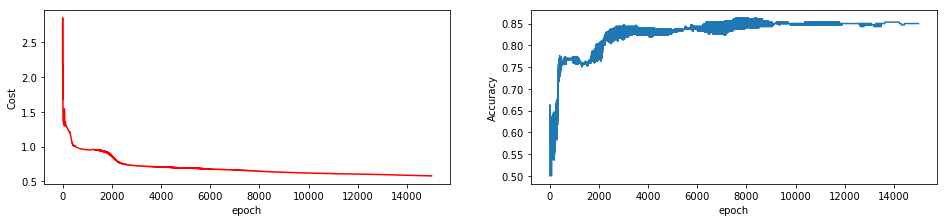

In [13]:
#### RUN this after training is done
#access the cost and accuracy during training by referencing the nnet object's attributes costs and accuracies
#This is done in the following way:
cost_training= nnet.costs
accuracy_training=nnet.accuracies
# Plots the cost and accuracy evolution during training 
fig = plt.figure(figsize=plt.figaspect(0.2))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(cost_training,'r')
plt.xlabel('epoch')
plt.ylabel('Cost')
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(accuracy_training)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
A=np.array(accuracy_training)
best_epoch=np.argmax(A)
print('best_accuracy:',max(accuracy_training),'achieved at epoch:',best_epoch)

#### Visualize the posterior of the network trained above

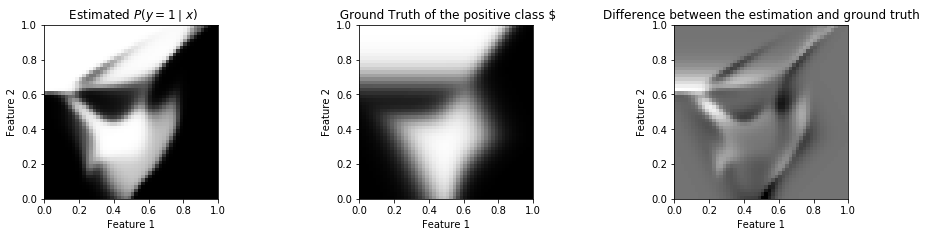

In [14]:
#### RUN this after training is done
x_rng = y_rng = np.linspace(0, 1, 50)
gridx,gridy = np.meshgrid(x_rng, y_rng)
p1=np.zeros((50,50))
p0=np.zeros((50,50))
for i in range(50):
    for j in range(50):
        v = np.array([gridx[i,j],gridy[i,j]])
        v=v[:,np.newaxis]
        out,dum,dum2=nnet.feedforward(v)
        p0[i,j]=out[0]
        p1[i,j]=out[1]

fig = plt.figure(figsize=plt.figaspect(0.2))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(p1, extent=[0, 1, 0, 1], origin='lower')
ax1.set_title(" Estimated $P(y=1 \mid x)$")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

ax1 = fig.add_subplot(1, 3, 2)
ax1.imshow(posterior, extent=[0, 1, 0, 1], origin='lower')
ax1.set_title(" Ground Truth of the positive class $")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

ax1 = fig.add_subplot(1, 3, 3)
ax1.imshow(p1-posterior, extent=[0, 1, 0, 1], origin='lower')
ax1.set_title("Difference between the estimation and ground truth")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
plt.show()  

<a id='Train2'></a>
#### Train a network with Relu non-linearities for the hidden layers and sigmoid non-linearity for the output layer
__ Use nnodes = [2 , 10 , 10 ,2]__

In [15]:
nnodes = [2, 10,10, 2]
learning_rate = 0.2 
epochs = 15000
# Recommended to set the learning rate less than or equal to 0.2 
# use the previous network that was trained above as an example
############ TO DO Q2d ############################
#nnet_2 = # Name the network nnet_2 in order to avoid erasing the previous model!

activation_functions = 'relu'
nnet_2 = Neural_Network(nnodes, activation_functions)
nnet_2.Gradient_Descent(train_data,epochs,learning_rate,stop,test_data)

###########  TO DO Q2d ###########################

Epoch 0: 137 / 300 Cost: [ 3.31624438]
Epoch 1: 159 / 300 Cost: [ 5.23059686]
Epoch 2: 168 / 300 Cost: [ 2.75172696]
Epoch 3: 181 / 300 Cost: [ 1.64530462]
Epoch 4: 160 / 300 Cost: [ 1.53540589]
Epoch 5: 184 / 300 Cost: [ 1.4843889]
Epoch 6: 168 / 300 Cost: [ 1.45272479]
Epoch 7: 186 / 300 Cost: [ 1.43496312]
Epoch 8: 168 / 300 Cost: [ 1.42103822]
Epoch 9: 194 / 300 Cost: [ 1.41528195]
Epoch 10: 176 / 300 Cost: [ 1.40145188]
Epoch 11: 196 / 300 Cost: [ 1.4007747]
Epoch 12: 185 / 300 Cost: [ 1.38129208]
Epoch 13: 198 / 300 Cost: [ 1.38037749]
Epoch 14: 190 / 300 Cost: [ 1.36058768]
Epoch 15: 199 / 300 Cost: [ 1.35803765]
Epoch 16: 195 / 300 Cost: [ 1.3387699]
Epoch 17: 201 / 300 Cost: [ 1.33287991]
Epoch 18: 201 / 300 Cost: [ 1.3163518]
Epoch 19: 199 / 300 Cost: [ 1.31113182]
Epoch 20: 204 / 300 Cost: [ 1.29837265]
Epoch 21: 199 / 300 Cost: [ 1.29403234]
Epoch 22: 210 / 300 Cost: [ 1.28202459]
Epoch 23: 199 / 300 Cost: [ 1.27682126]
Epoch 24: 212 / 300 Cost: [ 1.26644627]
Epoch 25: 200 

Epoch 207: 215 / 300 Cost: [ 1.06735966]
Epoch 208: 215 / 300 Cost: [ 1.02553889]
Epoch 209: 217 / 300 Cost: [ 1.06143343]
Epoch 210: 214 / 300 Cost: [ 1.02466467]
Epoch 211: 217 / 300 Cost: [ 1.05972904]
Epoch 212: 213 / 300 Cost: [ 1.02654595]
Epoch 213: 215 / 300 Cost: [ 1.06657459]
Epoch 214: 213 / 300 Cost: [ 1.02841602]
Epoch 215: 214 / 300 Cost: [ 1.06767215]
Epoch 216: 212 / 300 Cost: [ 1.03084708]
Epoch 217: 213 / 300 Cost: [ 1.07381026]
Epoch 218: 213 / 300 Cost: [ 1.02477564]
Epoch 219: 216 / 300 Cost: [ 1.05975922]
Epoch 220: 213 / 300 Cost: [ 1.02563176]
Epoch 221: 215 / 300 Cost: [ 1.06436647]
Epoch 222: 211 / 300 Cost: [ 1.02739551]
Epoch 223: 215 / 300 Cost: [ 1.06672683]
Epoch 224: 210 / 300 Cost: [ 1.031004]
Epoch 225: 214 / 300 Cost: [ 1.07353418]
Epoch 226: 212 / 300 Cost: [ 1.02650842]
Epoch 227: 215 / 300 Cost: [ 1.06597534]
Epoch 228: 211 / 300 Cost: [ 1.0262924]
Epoch 229: 215 / 300 Cost: [ 1.0658286]
Epoch 230: 213 / 300 Cost: [ 1.02188164]
Epoch 231: 216 / 300

Epoch 411: 214 / 300 Cost: [ 1.06205475]
Epoch 412: 223 / 300 Cost: [ 0.99909542]
Epoch 413: 215 / 300 Cost: [ 1.06141826]
Epoch 414: 223 / 300 Cost: [ 0.99863405]
Epoch 415: 214 / 300 Cost: [ 1.05877527]
Epoch 416: 224 / 300 Cost: [ 0.99529239]
Epoch 417: 215 / 300 Cost: [ 1.0537608]
Epoch 418: 223 / 300 Cost: [ 0.9997999]
Epoch 419: 214 / 300 Cost: [ 1.06617562]
Epoch 420: 223 / 300 Cost: [ 1.00182593]
Epoch 421: 214 / 300 Cost: [ 1.0700064]
Epoch 422: 222 / 300 Cost: [ 1.00484677]
Epoch 423: 214 / 300 Cost: [ 1.07122936]
Epoch 424: 222 / 300 Cost: [ 1.00328782]
Epoch 425: 215 / 300 Cost: [ 1.06860871]
Epoch 426: 222 / 300 Cost: [ 1.00177254]
Epoch 427: 214 / 300 Cost: [ 1.06397718]
Epoch 428: 223 / 300 Cost: [ 0.99937199]
Epoch 429: 214 / 300 Cost: [ 1.06476069]
Epoch 430: 223 / 300 Cost: [ 0.9998494]
Epoch 431: 214 / 300 Cost: [ 1.06178285]
Epoch 432: 224 / 300 Cost: [ 0.99838729]
Epoch 433: 214 / 300 Cost: [ 1.06387423]
Epoch 434: 223 / 300 Cost: [ 0.99966976]
Epoch 435: 215 / 300

Epoch 616: 226 / 300 Cost: [ 0.97002796]
Epoch 617: 219 / 300 Cost: [ 1.02754076]
Epoch 618: 226 / 300 Cost: [ 0.97089065]
Epoch 619: 219 / 300 Cost: [ 1.02757334]
Epoch 620: 225 / 300 Cost: [ 0.97059465]
Epoch 621: 219 / 300 Cost: [ 1.02698913]
Epoch 622: 227 / 300 Cost: [ 0.96876213]
Epoch 623: 219 / 300 Cost: [ 1.02412002]
Epoch 624: 227 / 300 Cost: [ 0.96701788]
Epoch 625: 219 / 300 Cost: [ 1.02107179]
Epoch 626: 227 / 300 Cost: [ 0.96569509]
Epoch 627: 220 / 300 Cost: [ 1.01821491]
Epoch 628: 229 / 300 Cost: [ 0.96395764]
Epoch 629: 220 / 300 Cost: [ 1.01547123]
Epoch 630: 229 / 300 Cost: [ 0.96223442]
Epoch 631: 220 / 300 Cost: [ 1.01278982]
Epoch 632: 229 / 300 Cost: [ 0.96096757]
Epoch 633: 221 / 300 Cost: [ 1.01088703]
Epoch 634: 227 / 300 Cost: [ 0.95993319]
Epoch 635: 221 / 300 Cost: [ 1.0078832]
Epoch 636: 228 / 300 Cost: [ 0.9579522]
Epoch 637: 222 / 300 Cost: [ 1.00107734]
Epoch 638: 229 / 300 Cost: [ 0.94585601]
Epoch 639: 223 / 300 Cost: [ 0.97872169]
Epoch 640: 232 / 3

Epoch 817: 238 / 300 Cost: [ 0.87145968]
Epoch 818: 244 / 300 Cost: [ 0.86591069]
Epoch 819: 239 / 300 Cost: [ 0.87026961]
Epoch 820: 244 / 300 Cost: [ 0.86853266]
Epoch 821: 236 / 300 Cost: [ 0.87772086]
Epoch 822: 243 / 300 Cost: [ 0.8742861]
Epoch 823: 234 / 300 Cost: [ 0.88589908]
Epoch 824: 242 / 300 Cost: [ 0.88042912]
Epoch 825: 232 / 300 Cost: [ 0.89460058]
Epoch 826: 243 / 300 Cost: [ 0.88810062]
Epoch 827: 233 / 300 Cost: [ 0.90896846]
Epoch 828: 242 / 300 Cost: [ 0.89695217]
Epoch 829: 229 / 300 Cost: [ 0.92921988]
Epoch 830: 234 / 300 Cost: [ 0.91789404]
Epoch 831: 226 / 300 Cost: [ 0.96809966]
Epoch 832: 230 / 300 Cost: [ 0.94030761]
Epoch 833: 222 / 300 Cost: [ 1.00725213]
Epoch 834: 229 / 300 Cost: [ 0.96209911]
Epoch 835: 219 / 300 Cost: [ 1.03812444]
Epoch 836: 226 / 300 Cost: [ 0.98562352]
Epoch 837: 216 / 300 Cost: [ 1.0599699]
Epoch 838: 228 / 300 Cost: [ 0.96212881]
Epoch 839: 219 / 300 Cost: [ 1.02738996]
Epoch 840: 233 / 300 Cost: [ 0.95157346]
Epoch 841: 222 / 3

Epoch 1216: 243 / 300 Cost: [ 0.87270078]
Epoch 1217: 232 / 300 Cost: [ 0.89557817]
Epoch 1218: 244 / 300 Cost: [ 0.89240708]
Epoch 1219: 232 / 300 Cost: [ 0.90492777]
Epoch 1220: 244 / 300 Cost: [ 0.87110965]
Epoch 1221: 233 / 300 Cost: [ 0.88732133]
Epoch 1222: 243 / 300 Cost: [ 0.87941033]
Epoch 1223: 233 / 300 Cost: [ 0.89709721]
Epoch 1224: 243 / 300 Cost: [ 0.87260393]
Epoch 1225: 233 / 300 Cost: [ 0.88849849]
Epoch 1226: 243 / 300 Cost: [ 0.87994761]
Epoch 1227: 234 / 300 Cost: [ 0.89584968]
Epoch 1228: 243 / 300 Cost: [ 0.87103075]
Epoch 1229: 233 / 300 Cost: [ 0.88490423]
Epoch 1230: 244 / 300 Cost: [ 0.86892406]
Epoch 1231: 231 / 300 Cost: [ 0.8889919]
Epoch 1232: 244 / 300 Cost: [ 0.88133736]
Epoch 1233: 234 / 300 Cost: [ 0.89184913]
Epoch 1234: 243 / 300 Cost: [ 0.8617945]
Epoch 1235: 235 / 300 Cost: [ 0.87139588]
Epoch 1236: 243 / 300 Cost: [ 0.85384954]
Epoch 1237: 237 / 300 Cost: [ 0.86346472]
Epoch 1238: 242 / 300 Cost: [ 0.84675349]
Epoch 1239: 238 / 300 Cost: [ 0.8547

Epoch 1416: 247 / 300 Cost: [ 0.81411605]
Epoch 1417: 245 / 300 Cost: [ 0.81718956]
Epoch 1418: 246 / 300 Cost: [ 0.81723922]
Epoch 1419: 247 / 300 Cost: [ 0.82562494]
Epoch 1420: 244 / 300 Cost: [ 0.83287439]
Epoch 1421: 242 / 300 Cost: [ 0.85379772]
Epoch 1422: 242 / 300 Cost: [ 0.87654945]
Epoch 1423: 234 / 300 Cost: [ 0.94900341]
Epoch 1424: 237 / 300 Cost: [ 0.9791063]
Epoch 1425: 226 / 300 Cost: [ 1.11112282]
Epoch 1426: 239 / 300 Cost: [ 1.02045521]
Epoch 1427: 223 / 300 Cost: [ 1.11206052]
Epoch 1428: 231 / 300 Cost: [ 0.99757333]
Epoch 1429: 224 / 300 Cost: [ 1.05301989]
Epoch 1430: 239 / 300 Cost: [ 0.93271421]
Epoch 1431: 228 / 300 Cost: [ 0.95923708]
Epoch 1432: 243 / 300 Cost: [ 0.89437503]
Epoch 1433: 233 / 300 Cost: [ 0.89291279]
Epoch 1434: 241 / 300 Cost: [ 0.85787735]
Epoch 1435: 239 / 300 Cost: [ 0.86592086]
Epoch 1436: 242 / 300 Cost: [ 0.84924554]
Epoch 1437: 242 / 300 Cost: [ 0.8519564]
Epoch 1438: 245 / 300 Cost: [ 0.83588135]
Epoch 1439: 245 / 300 Cost: [ 0.8334

Epoch 1612: 246 / 300 Cost: [ 0.80751847]
Epoch 1613: 246 / 300 Cost: [ 0.80566179]
Epoch 1614: 245 / 300 Cost: [ 0.8046537]
Epoch 1615: 246 / 300 Cost: [ 0.80339359]
Epoch 1616: 245 / 300 Cost: [ 0.8032713]
Epoch 1617: 246 / 300 Cost: [ 0.80285098]
Epoch 1618: 245 / 300 Cost: [ 0.80302323]
Epoch 1619: 246 / 300 Cost: [ 0.80296211]
Epoch 1620: 245 / 300 Cost: [ 0.80300127]
Epoch 1621: 246 / 300 Cost: [ 0.80287154]
Epoch 1622: 244 / 300 Cost: [ 0.80391581]
Epoch 1623: 247 / 300 Cost: [ 0.80006808]
Epoch 1624: 246 / 300 Cost: [ 0.80034371]
Epoch 1625: 247 / 300 Cost: [ 0.79994852]
Epoch 1626: 245 / 300 Cost: [ 0.80021965]
Epoch 1627: 247 / 300 Cost: [ 0.799411]
Epoch 1628: 245 / 300 Cost: [ 0.79967]
Epoch 1629: 247 / 300 Cost: [ 0.79903262]
Epoch 1630: 245 / 300 Cost: [ 0.79915252]
Epoch 1631: 247 / 300 Cost: [ 0.79910729]
Epoch 1632: 245 / 300 Cost: [ 0.79916598]
Epoch 1633: 246 / 300 Cost: [ 0.79991799]
Epoch 1634: 245 / 300 Cost: [ 0.80004154]
Epoch 1635: 246 / 300 Cost: [ 0.80023284]

Epoch 1811: 248 / 300 Cost: [ 0.80167407]
Epoch 1812: 246 / 300 Cost: [ 0.80425279]
Epoch 1813: 245 / 300 Cost: [ 0.79728472]
Epoch 1814: 245 / 300 Cost: [ 0.79795914]
Epoch 1815: 244 / 300 Cost: [ 0.79687796]
Epoch 1816: 245 / 300 Cost: [ 0.79760661]
Epoch 1817: 245 / 300 Cost: [ 0.79685174]
Epoch 1818: 245 / 300 Cost: [ 0.79980645]
Epoch 1819: 244 / 300 Cost: [ 0.79869656]
Epoch 1820: 245 / 300 Cost: [ 0.80136153]
Epoch 1821: 244 / 300 Cost: [ 0.79923174]
Epoch 1822: 246 / 300 Cost: [ 0.80193474]
Epoch 1823: 245 / 300 Cost: [ 0.80116245]
Epoch 1824: 246 / 300 Cost: [ 0.80434651]
Epoch 1825: 247 / 300 Cost: [ 0.8025698]
Epoch 1826: 245 / 300 Cost: [ 0.80701855]
Epoch 1827: 249 / 300 Cost: [ 0.80463357]
Epoch 1828: 245 / 300 Cost: [ 0.80744174]
Epoch 1829: 248 / 300 Cost: [ 0.80523762]
Epoch 1830: 244 / 300 Cost: [ 0.80988425]
Epoch 1831: 248 / 300 Cost: [ 0.80828285]
Epoch 1832: 245 / 300 Cost: [ 0.80841066]
Epoch 1833: 245 / 300 Cost: [ 0.80548687]
Epoch 1834: 248 / 300 Cost: [ 0.809

Epoch 2010: 247 / 300 Cost: [ 0.79270124]
Epoch 2011: 243 / 300 Cost: [ 0.79282687]
Epoch 2012: 247 / 300 Cost: [ 0.79297336]
Epoch 2013: 243 / 300 Cost: [ 0.79315987]
Epoch 2014: 247 / 300 Cost: [ 0.79336898]
Epoch 2015: 243 / 300 Cost: [ 0.79558768]
Epoch 2016: 245 / 300 Cost: [ 0.79563665]
Epoch 2017: 242 / 300 Cost: [ 0.79745671]
Epoch 2018: 247 / 300 Cost: [ 0.79312467]
Epoch 2019: 243 / 300 Cost: [ 0.79426235]
Epoch 2020: 247 / 300 Cost: [ 0.79452831]
Epoch 2021: 244 / 300 Cost: [ 0.79612701]
Epoch 2022: 246 / 300 Cost: [ 0.79965799]
Epoch 2023: 244 / 300 Cost: [ 0.80322809]
Epoch 2024: 247 / 300 Cost: [ 0.80303761]
Epoch 2025: 246 / 300 Cost: [ 0.80544033]
Epoch 2026: 244 / 300 Cost: [ 0.81235193]
Epoch 2027: 243 / 300 Cost: [ 0.81928445]
Epoch 2028: 245 / 300 Cost: [ 0.82773069]
Epoch 2029: 242 / 300 Cost: [ 0.83565081]
Epoch 2030: 243 / 300 Cost: [ 0.84633476]
Epoch 2031: 238 / 300 Cost: [ 0.86633456]
Epoch 2032: 243 / 300 Cost: [ 0.86960339]
Epoch 2033: 240 / 300 Cost: [ 0.89

Epoch 2206: 248 / 300 Cost: [ 0.81035227]
Epoch 2207: 240 / 300 Cost: [ 0.81466233]
Epoch 2208: 247 / 300 Cost: [ 0.8086249]
Epoch 2209: 242 / 300 Cost: [ 0.81164659]
Epoch 2210: 247 / 300 Cost: [ 0.80896095]
Epoch 2211: 239 / 300 Cost: [ 0.81170537]
Epoch 2212: 247 / 300 Cost: [ 0.80978457]
Epoch 2213: 239 / 300 Cost: [ 0.81312177]
Epoch 2214: 245 / 300 Cost: [ 0.81099596]
Epoch 2215: 241 / 300 Cost: [ 0.81726742]
Epoch 2216: 243 / 300 Cost: [ 0.81906593]
Epoch 2217: 244 / 300 Cost: [ 0.82795607]
Epoch 2218: 241 / 300 Cost: [ 0.83576454]
Epoch 2219: 242 / 300 Cost: [ 0.84360253]
Epoch 2220: 241 / 300 Cost: [ 0.84443318]
Epoch 2221: 243 / 300 Cost: [ 0.85393116]
Epoch 2222: 241 / 300 Cost: [ 0.85999802]
Epoch 2223: 241 / 300 Cost: [ 0.87198737]
Epoch 2224: 241 / 300 Cost: [ 0.86806786]
Epoch 2225: 241 / 300 Cost: [ 0.87396218]
Epoch 2226: 242 / 300 Cost: [ 0.86178828]
Epoch 2227: 238 / 300 Cost: [ 0.86920656]
Epoch 2228: 244 / 300 Cost: [ 0.85965855]
Epoch 2229: 242 / 300 Cost: [ 0.861

Epoch 2405: 250 / 300 Cost: [ 0.79863671]
Epoch 2406: 243 / 300 Cost: [ 0.79859546]
Epoch 2407: 251 / 300 Cost: [ 0.801647]
Epoch 2408: 245 / 300 Cost: [ 0.80513328]
Epoch 2409: 250 / 300 Cost: [ 0.80940219]
Epoch 2410: 243 / 300 Cost: [ 0.81610492]
Epoch 2411: 249 / 300 Cost: [ 0.81562164]
Epoch 2412: 244 / 300 Cost: [ 0.81763616]
Epoch 2413: 246 / 300 Cost: [ 0.82334401]
Epoch 2414: 241 / 300 Cost: [ 0.83100073]
Epoch 2415: 244 / 300 Cost: [ 0.84317039]
Epoch 2416: 240 / 300 Cost: [ 0.85488774]
Epoch 2417: 242 / 300 Cost: [ 0.88410326]
Epoch 2418: 239 / 300 Cost: [ 0.89542495]
Epoch 2419: 236 / 300 Cost: [ 0.92999435]
Epoch 2420: 239 / 300 Cost: [ 0.91935453]
Epoch 2421: 236 / 300 Cost: [ 0.93017353]
Epoch 2422: 240 / 300 Cost: [ 0.88427903]
Epoch 2423: 240 / 300 Cost: [ 0.88047439]
Epoch 2424: 241 / 300 Cost: [ 0.8462734]
Epoch 2425: 243 / 300 Cost: [ 0.85296382]
Epoch 2426: 241 / 300 Cost: [ 0.84180294]
Epoch 2427: 243 / 300 Cost: [ 0.84415208]
Epoch 2428: 241 / 300 Cost: [ 0.83908

Epoch 2603: 246 / 300 Cost: [ 0.78890138]
Epoch 2604: 247 / 300 Cost: [ 0.78827007]
Epoch 2605: 245 / 300 Cost: [ 0.78795553]
Epoch 2606: 248 / 300 Cost: [ 0.78762398]
Epoch 2607: 246 / 300 Cost: [ 0.78746553]
Epoch 2608: 247 / 300 Cost: [ 0.7874067]
Epoch 2609: 245 / 300 Cost: [ 0.78710334]
Epoch 2610: 247 / 300 Cost: [ 0.78669142]
Epoch 2611: 246 / 300 Cost: [ 0.78641328]
Epoch 2612: 248 / 300 Cost: [ 0.78656995]
Epoch 2613: 245 / 300 Cost: [ 0.78662243]
Epoch 2614: 247 / 300 Cost: [ 0.78626355]
Epoch 2615: 246 / 300 Cost: [ 0.78624597]
Epoch 2616: 248 / 300 Cost: [ 0.78636208]
Epoch 2617: 246 / 300 Cost: [ 0.78638982]
Epoch 2618: 247 / 300 Cost: [ 0.78584716]
Epoch 2619: 246 / 300 Cost: [ 0.78563515]
Epoch 2620: 248 / 300 Cost: [ 0.78602275]
Epoch 2621: 246 / 300 Cost: [ 0.78594264]
Epoch 2622: 245 / 300 Cost: [ 0.7855985]
Epoch 2623: 246 / 300 Cost: [ 0.78535401]
Epoch 2624: 247 / 300 Cost: [ 0.78556193]
Epoch 2625: 246 / 300 Cost: [ 0.7857819]
Epoch 2626: 246 / 300 Cost: [ 0.78560

Epoch 2802: 240 / 300 Cost: [ 0.87531033]
Epoch 2803: 240 / 300 Cost: [ 0.85077349]
Epoch 2804: 243 / 300 Cost: [ 0.82056195]
Epoch 2805: 241 / 300 Cost: [ 0.81565347]
Epoch 2806: 245 / 300 Cost: [ 0.81145165]
Epoch 2807: 243 / 300 Cost: [ 0.80959879]
Epoch 2808: 246 / 300 Cost: [ 0.80911726]
Epoch 2809: 238 / 300 Cost: [ 0.81683768]
Epoch 2810: 249 / 300 Cost: [ 0.81676289]
Epoch 2811: 236 / 300 Cost: [ 0.81680714]
Epoch 2812: 249 / 300 Cost: [ 0.81124961]
Epoch 2813: 239 / 300 Cost: [ 0.81626971]
Epoch 2814: 249 / 300 Cost: [ 0.81400972]
Epoch 2815: 239 / 300 Cost: [ 0.82142938]
Epoch 2816: 248 / 300 Cost: [ 0.8194328]
Epoch 2817: 240 / 300 Cost: [ 0.82919358]
Epoch 2818: 248 / 300 Cost: [ 0.83094187]
Epoch 2819: 242 / 300 Cost: [ 0.8270725]
Epoch 2820: 249 / 300 Cost: [ 0.8285349]
Epoch 2821: 240 / 300 Cost: [ 0.82062945]
Epoch 2822: 248 / 300 Cost: [ 0.82008868]
Epoch 2823: 240 / 300 Cost: [ 0.82142221]
Epoch 2824: 248 / 300 Cost: [ 0.82125377]
Epoch 2825: 241 / 300 Cost: [ 0.82254

Epoch 2999: 243 / 300 Cost: [ 0.84977286]
Epoch 3000: 240 / 300 Cost: [ 0.85998687]
Epoch 3001: 242 / 300 Cost: [ 0.85974301]
Epoch 3002: 240 / 300 Cost: [ 0.86847098]
Epoch 3003: 242 / 300 Cost: [ 0.85718086]
Epoch 3004: 240 / 300 Cost: [ 0.86049955]
Epoch 3005: 243 / 300 Cost: [ 0.84553565]
Epoch 3006: 242 / 300 Cost: [ 0.84474528]
Epoch 3007: 245 / 300 Cost: [ 0.83127734]
Epoch 3008: 243 / 300 Cost: [ 0.82668762]
Epoch 3009: 244 / 300 Cost: [ 0.82200733]
Epoch 3010: 243 / 300 Cost: [ 0.81713695]
Epoch 3011: 248 / 300 Cost: [ 0.81064818]
Epoch 3012: 244 / 300 Cost: [ 0.80863644]
Epoch 3013: 248 / 300 Cost: [ 0.80386239]
Epoch 3014: 245 / 300 Cost: [ 0.80100502]
Epoch 3015: 248 / 300 Cost: [ 0.79612786]
Epoch 3016: 246 / 300 Cost: [ 0.79388266]
Epoch 3017: 248 / 300 Cost: [ 0.79083967]
Epoch 3018: 244 / 300 Cost: [ 0.78990579]
Epoch 3019: 248 / 300 Cost: [ 0.78785715]
Epoch 3020: 244 / 300 Cost: [ 0.78738732]
Epoch 3021: 248 / 300 Cost: [ 0.7851451]
Epoch 3022: 247 / 300 Cost: [ 0.784

Epoch 3195: 247 / 300 Cost: [ 0.8154941]
Epoch 3196: 244 / 300 Cost: [ 0.83186221]
Epoch 3197: 244 / 300 Cost: [ 0.84662897]
Epoch 3198: 241 / 300 Cost: [ 0.86279593]
Epoch 3199: 241 / 300 Cost: [ 0.89084311]
Epoch 3200: 241 / 300 Cost: [ 0.9029828]
Epoch 3201: 235 / 300 Cost: [ 0.96403436]
Epoch 3202: 241 / 300 Cost: [ 0.91954368]
Epoch 3203: 233 / 300 Cost: [ 0.97547412]
Epoch 3204: 242 / 300 Cost: [ 0.91545693]
Epoch 3205: 232 / 300 Cost: [ 0.96458742]
Epoch 3206: 238 / 300 Cost: [ 0.9016668]
Epoch 3207: 234 / 300 Cost: [ 0.9362964]
Epoch 3208: 240 / 300 Cost: [ 0.87764891]
Epoch 3209: 239 / 300 Cost: [ 0.88454639]
Epoch 3210: 241 / 300 Cost: [ 0.85597666]
Epoch 3211: 241 / 300 Cost: [ 0.86160433]
Epoch 3212: 244 / 300 Cost: [ 0.83426798]
Epoch 3213: 244 / 300 Cost: [ 0.83894575]
Epoch 3214: 244 / 300 Cost: [ 0.83356158]
Epoch 3215: 249 / 300 Cost: [ 0.83473917]
Epoch 3216: 243 / 300 Cost: [ 0.82690755]
Epoch 3217: 248 / 300 Cost: [ 0.82148506]
Epoch 3218: 242 / 300 Cost: [ 0.820862

Epoch 3391: 249 / 300 Cost: [ 0.80132779]
Epoch 3392: 241 / 300 Cost: [ 0.80088433]
Epoch 3393: 249 / 300 Cost: [ 0.80200724]
Epoch 3394: 242 / 300 Cost: [ 0.80148085]
Epoch 3395: 250 / 300 Cost: [ 0.79841746]
Epoch 3396: 243 / 300 Cost: [ 0.79115306]
Epoch 3397: 250 / 300 Cost: [ 0.79212855]
Epoch 3398: 242 / 300 Cost: [ 0.78849291]
Epoch 3399: 248 / 300 Cost: [ 0.78867965]
Epoch 3400: 242 / 300 Cost: [ 0.78725152]
Epoch 3401: 248 / 300 Cost: [ 0.78733863]
Epoch 3402: 243 / 300 Cost: [ 0.7858043]
Epoch 3403: 248 / 300 Cost: [ 0.78608746]
Epoch 3404: 244 / 300 Cost: [ 0.78410264]
Epoch 3405: 247 / 300 Cost: [ 0.78498715]
Epoch 3406: 244 / 300 Cost: [ 0.78422093]
Epoch 3407: 247 / 300 Cost: [ 0.78502403]
Epoch 3408: 245 / 300 Cost: [ 0.78403569]
Epoch 3409: 247 / 300 Cost: [ 0.78504061]
Epoch 3410: 245 / 300 Cost: [ 0.7839585]
Epoch 3411: 247 / 300 Cost: [ 0.78504706]
Epoch 3412: 244 / 300 Cost: [ 0.78387685]
Epoch 3413: 247 / 300 Cost: [ 0.78314202]
Epoch 3414: 246 / 300 Cost: [ 0.7817

Epoch 3587: 244 / 300 Cost: [ 0.80093822]
Epoch 3588: 248 / 300 Cost: [ 0.79926997]
Epoch 3589: 245 / 300 Cost: [ 0.79632375]
Epoch 3590: 248 / 300 Cost: [ 0.79605699]
Epoch 3591: 245 / 300 Cost: [ 0.79348608]
Epoch 3592: 248 / 300 Cost: [ 0.7939149]
Epoch 3593: 245 / 300 Cost: [ 0.79153909]
Epoch 3594: 248 / 300 Cost: [ 0.79235355]
Epoch 3595: 245 / 300 Cost: [ 0.79139455]
Epoch 3596: 248 / 300 Cost: [ 0.79178889]
Epoch 3597: 245 / 300 Cost: [ 0.79076104]
Epoch 3598: 248 / 300 Cost: [ 0.7911328]
Epoch 3599: 245 / 300 Cost: [ 0.79030536]
Epoch 3600: 248 / 300 Cost: [ 0.79394521]
Epoch 3601: 244 / 300 Cost: [ 0.79417607]
Epoch 3602: 247 / 300 Cost: [ 0.79950325]
Epoch 3603: 243 / 300 Cost: [ 0.79968199]
Epoch 3604: 248 / 300 Cost: [ 0.79918737]
Epoch 3605: 244 / 300 Cost: [ 0.79852167]
Epoch 3606: 248 / 300 Cost: [ 0.80016573]
Epoch 3607: 244 / 300 Cost: [ 0.80023876]
Epoch 3608: 248 / 300 Cost: [ 0.80446426]
Epoch 3609: 244 / 300 Cost: [ 0.80495118]
Epoch 3610: 248 / 300 Cost: [ 0.8092

Epoch 3786: 248 / 300 Cost: [ 0.79761313]
Epoch 3787: 243 / 300 Cost: [ 0.80078787]
Epoch 3788: 248 / 300 Cost: [ 0.80356766]
Epoch 3789: 243 / 300 Cost: [ 0.80569188]
Epoch 3790: 247 / 300 Cost: [ 0.80858624]
Epoch 3791: 244 / 300 Cost: [ 0.81203888]
Epoch 3792: 247 / 300 Cost: [ 0.81656774]
Epoch 3793: 245 / 300 Cost: [ 0.81965414]
Epoch 3794: 246 / 300 Cost: [ 0.81933172]
Epoch 3795: 246 / 300 Cost: [ 0.82281685]
Epoch 3796: 246 / 300 Cost: [ 0.8279268]
Epoch 3797: 242 / 300 Cost: [ 0.82991182]
Epoch 3798: 246 / 300 Cost: [ 0.82949714]
Epoch 3799: 243 / 300 Cost: [ 0.82923566]
Epoch 3800: 245 / 300 Cost: [ 0.82626605]
Epoch 3801: 243 / 300 Cost: [ 0.82653126]
Epoch 3802: 246 / 300 Cost: [ 0.82031019]
Epoch 3803: 245 / 300 Cost: [ 0.81627626]
Epoch 3804: 246 / 300 Cost: [ 0.81528426]
Epoch 3805: 243 / 300 Cost: [ 0.81428324]
Epoch 3806: 247 / 300 Cost: [ 0.8095438]
Epoch 3807: 243 / 300 Cost: [ 0.80430908]
Epoch 3808: 248 / 300 Cost: [ 0.80233319]
Epoch 3809: 244 / 300 Cost: [ 0.7988

Epoch 3983: 249 / 300 Cost: [ 0.80128969]
Epoch 3984: 244 / 300 Cost: [ 0.80341168]
Epoch 3985: 249 / 300 Cost: [ 0.80137251]
Epoch 3986: 244 / 300 Cost: [ 0.80269168]
Epoch 3987: 247 / 300 Cost: [ 0.80085821]
Epoch 3988: 246 / 300 Cost: [ 0.80149156]
Epoch 3989: 248 / 300 Cost: [ 0.803003]
Epoch 3990: 243 / 300 Cost: [ 0.80507526]
Epoch 3991: 250 / 300 Cost: [ 0.80464083]
Epoch 3992: 243 / 300 Cost: [ 0.80763421]
Epoch 3993: 247 / 300 Cost: [ 0.80939862]
Epoch 3994: 243 / 300 Cost: [ 0.80964545]
Epoch 3995: 248 / 300 Cost: [ 0.81036328]
Epoch 3996: 244 / 300 Cost: [ 0.81002168]
Epoch 3997: 249 / 300 Cost: [ 0.80730086]
Epoch 3998: 244 / 300 Cost: [ 0.80514075]
Epoch 3999: 247 / 300 Cost: [ 0.80259208]
Epoch 4000: 246 / 300 Cost: [ 0.80047736]
Epoch 4001: 249 / 300 Cost: [ 0.80189042]
Epoch 4002: 244 / 300 Cost: [ 0.80164438]
Epoch 4003: 248 / 300 Cost: [ 0.79943675]
Epoch 4004: 244 / 300 Cost: [ 0.79906177]
Epoch 4005: 249 / 300 Cost: [ 0.799155]
Epoch 4006: 243 / 300 Cost: [ 0.800167

Epoch 4182: 238 / 300 Cost: [ 0.89990684]
Epoch 4183: 241 / 300 Cost: [ 0.87659335]
Epoch 4184: 239 / 300 Cost: [ 0.88334408]
Epoch 4185: 243 / 300 Cost: [ 0.84890079]
Epoch 4186: 241 / 300 Cost: [ 0.85071512]
Epoch 4187: 244 / 300 Cost: [ 0.83154834]
Epoch 4188: 240 / 300 Cost: [ 0.83403994]
Epoch 4189: 245 / 300 Cost: [ 0.82070268]
Epoch 4190: 241 / 300 Cost: [ 0.82583345]
Epoch 4191: 246 / 300 Cost: [ 0.81362705]
Epoch 4192: 244 / 300 Cost: [ 0.81006607]
Epoch 4193: 248 / 300 Cost: [ 0.80911653]
Epoch 4194: 244 / 300 Cost: [ 0.80617904]
Epoch 4195: 249 / 300 Cost: [ 0.80478084]
Epoch 4196: 243 / 300 Cost: [ 0.80280547]
Epoch 4197: 249 / 300 Cost: [ 0.80207359]
Epoch 4198: 243 / 300 Cost: [ 0.7999701]
Epoch 4199: 249 / 300 Cost: [ 0.79662468]
Epoch 4200: 243 / 300 Cost: [ 0.79222796]
Epoch 4201: 250 / 300 Cost: [ 0.78893466]
Epoch 4202: 242 / 300 Cost: [ 0.78545645]
Epoch 4203: 250 / 300 Cost: [ 0.78429943]
Epoch 4204: 243 / 300 Cost: [ 0.78251119]
Epoch 4205: 249 / 300 Cost: [ 0.782

Epoch 4378: 246 / 300 Cost: [ 0.82041121]
Epoch 4379: 245 / 300 Cost: [ 0.82263691]
Epoch 4380: 246 / 300 Cost: [ 0.82169304]
Epoch 4381: 245 / 300 Cost: [ 0.81923572]
Epoch 4382: 244 / 300 Cost: [ 0.81887325]
Epoch 4383: 245 / 300 Cost: [ 0.81911535]
Epoch 4384: 244 / 300 Cost: [ 0.81986179]
Epoch 4385: 243 / 300 Cost: [ 0.83046244]
Epoch 4386: 243 / 300 Cost: [ 0.83177741]
Epoch 4387: 241 / 300 Cost: [ 0.8411987]
Epoch 4388: 242 / 300 Cost: [ 0.83512281]
Epoch 4389: 241 / 300 Cost: [ 0.84377432]
Epoch 4390: 242 / 300 Cost: [ 0.83152096]
Epoch 4391: 241 / 300 Cost: [ 0.84196319]
Epoch 4392: 243 / 300 Cost: [ 0.82913531]
Epoch 4393: 242 / 300 Cost: [ 0.83093268]
Epoch 4394: 243 / 300 Cost: [ 0.83121198]
Epoch 4395: 240 / 300 Cost: [ 0.83831039]
Epoch 4396: 243 / 300 Cost: [ 0.82674853]
Epoch 4397: 241 / 300 Cost: [ 0.83363104]
Epoch 4398: 243 / 300 Cost: [ 0.82343843]
Epoch 4399: 241 / 300 Cost: [ 0.83010825]
Epoch 4400: 243 / 300 Cost: [ 0.81841053]
Epoch 4401: 244 / 300 Cost: [ 0.814

Epoch 4577: 244 / 300 Cost: [ 0.81771564]
Epoch 4578: 246 / 300 Cost: [ 0.81544199]
Epoch 4579: 244 / 300 Cost: [ 0.81330902]
Epoch 4580: 246 / 300 Cost: [ 0.80991474]
Epoch 4581: 244 / 300 Cost: [ 0.80854109]
Epoch 4582: 246 / 300 Cost: [ 0.80595756]
Epoch 4583: 244 / 300 Cost: [ 0.80282851]
Epoch 4584: 248 / 300 Cost: [ 0.79637866]
Epoch 4585: 242 / 300 Cost: [ 0.79108378]
Epoch 4586: 250 / 300 Cost: [ 0.78673017]
Epoch 4587: 243 / 300 Cost: [ 0.78370649]
Epoch 4588: 250 / 300 Cost: [ 0.78035709]
Epoch 4589: 244 / 300 Cost: [ 0.78084172]
Epoch 4590: 252 / 300 Cost: [ 0.77838048]
Epoch 4591: 245 / 300 Cost: [ 0.77933412]
Epoch 4592: 248 / 300 Cost: [ 0.77725514]
Epoch 4593: 244 / 300 Cost: [ 0.77840357]
Epoch 4594: 248 / 300 Cost: [ 0.77717308]
Epoch 4595: 244 / 300 Cost: [ 0.77927048]
Epoch 4596: 249 / 300 Cost: [ 0.77892495]
Epoch 4597: 246 / 300 Cost: [ 0.77901616]
Epoch 4598: 249 / 300 Cost: [ 0.77877255]
Epoch 4599: 247 / 300 Cost: [ 0.778925]
Epoch 4600: 249 / 300 Cost: [ 0.7790

Epoch 4777: 250 / 300 Cost: [ 0.77493808]
Epoch 4778: 246 / 300 Cost: [ 0.7765648]
Epoch 4779: 249 / 300 Cost: [ 0.77836773]
Epoch 4780: 244 / 300 Cost: [ 0.77973223]
Epoch 4781: 247 / 300 Cost: [ 0.78225533]
Epoch 4782: 245 / 300 Cost: [ 0.78503685]
Epoch 4783: 246 / 300 Cost: [ 0.79094837]
Epoch 4784: 246 / 300 Cost: [ 0.79660149]
Epoch 4785: 246 / 300 Cost: [ 0.80464168]
Epoch 4786: 247 / 300 Cost: [ 0.81544429]
Epoch 4787: 244 / 300 Cost: [ 0.8219259]
Epoch 4788: 243 / 300 Cost: [ 0.83408893]
Epoch 4789: 245 / 300 Cost: [ 0.84076735]
Epoch 4790: 241 / 300 Cost: [ 0.8596265]
Epoch 4791: 241 / 300 Cost: [ 0.86218309]
Epoch 4792: 239 / 300 Cost: [ 0.87814472]
Epoch 4793: 241 / 300 Cost: [ 0.86506175]
Epoch 4794: 240 / 300 Cost: [ 0.86649674]
Epoch 4795: 243 / 300 Cost: [ 0.8473176]
Epoch 4796: 244 / 300 Cost: [ 0.84535461]
Epoch 4797: 244 / 300 Cost: [ 0.8326706]
Epoch 4798: 244 / 300 Cost: [ 0.82861173]
Epoch 4799: 244 / 300 Cost: [ 0.81734664]
Epoch 4800: 243 / 300 Cost: [ 0.8098800

Epoch 4976: 247 / 300 Cost: [ 0.7738749]
Epoch 4977: 250 / 300 Cost: [ 0.7739732]
Epoch 4978: 247 / 300 Cost: [ 0.77424347]
Epoch 4979: 250 / 300 Cost: [ 0.77422867]
Epoch 4980: 247 / 300 Cost: [ 0.77476159]
Epoch 4981: 249 / 300 Cost: [ 0.77500741]
Epoch 4982: 246 / 300 Cost: [ 0.77585611]
Epoch 4983: 249 / 300 Cost: [ 0.77500642]
Epoch 4984: 247 / 300 Cost: [ 0.77561645]
Epoch 4985: 248 / 300 Cost: [ 0.7742611]
Epoch 4986: 247 / 300 Cost: [ 0.774643]
Epoch 4987: 249 / 300 Cost: [ 0.77410481]
Epoch 4988: 247 / 300 Cost: [ 0.77435217]
Epoch 4989: 249 / 300 Cost: [ 0.77433197]
Epoch 4990: 248 / 300 Cost: [ 0.77379168]
Epoch 4991: 248 / 300 Cost: [ 0.77423513]
Epoch 4992: 246 / 300 Cost: [ 0.77427157]
Epoch 4993: 249 / 300 Cost: [ 0.77411672]
Epoch 4994: 246 / 300 Cost: [ 0.77444436]
Epoch 4995: 249 / 300 Cost: [ 0.77556839]
Epoch 4996: 246 / 300 Cost: [ 0.77411322]
Epoch 4997: 249 / 300 Cost: [ 0.77428772]
Epoch 4998: 246 / 300 Cost: [ 0.77451634]
Epoch 4999: 249 / 300 Cost: [ 0.7757657

Epoch 5175: 249 / 300 Cost: [ 0.77706145]
Epoch 5176: 245 / 300 Cost: [ 0.7781332]
Epoch 5177: 247 / 300 Cost: [ 0.7805043]
Epoch 5178: 244 / 300 Cost: [ 0.78302622]
Epoch 5179: 246 / 300 Cost: [ 0.78823559]
Epoch 5180: 246 / 300 Cost: [ 0.79504448]
Epoch 5181: 246 / 300 Cost: [ 0.80164087]
Epoch 5182: 247 / 300 Cost: [ 0.81429774]
Epoch 5183: 246 / 300 Cost: [ 0.8245812]
Epoch 5184: 240 / 300 Cost: [ 0.84341778]
Epoch 5185: 242 / 300 Cost: [ 0.85288278]
Epoch 5186: 239 / 300 Cost: [ 0.87740567]
Epoch 5187: 240 / 300 Cost: [ 0.87463375]
Epoch 5188: 238 / 300 Cost: [ 0.89201196]
Epoch 5189: 242 / 300 Cost: [ 0.86602508]
Epoch 5190: 242 / 300 Cost: [ 0.86499558]
Epoch 5191: 243 / 300 Cost: [ 0.84549317]
Epoch 5192: 244 / 300 Cost: [ 0.84305846]
Epoch 5193: 243 / 300 Cost: [ 0.82952454]
Epoch 5194: 243 / 300 Cost: [ 0.8248318]
Epoch 5195: 247 / 300 Cost: [ 0.81221941]
Epoch 5196: 245 / 300 Cost: [ 0.80893493]
Epoch 5197: 247 / 300 Cost: [ 0.80137916]
Epoch 5198: 243 / 300 Cost: [ 0.796000

Epoch 5372: 246 / 300 Cost: [ 0.7758051]
Epoch 5373: 250 / 300 Cost: [ 0.77408698]
Epoch 5374: 246 / 300 Cost: [ 0.77476654]
Epoch 5375: 249 / 300 Cost: [ 0.77531688]
Epoch 5376: 246 / 300 Cost: [ 0.77635151]
Epoch 5377: 248 / 300 Cost: [ 0.77737933]
Epoch 5378: 245 / 300 Cost: [ 0.77872705]
Epoch 5379: 247 / 300 Cost: [ 0.7786633]
Epoch 5380: 245 / 300 Cost: [ 0.78011803]
Epoch 5381: 247 / 300 Cost: [ 0.78185484]
Epoch 5382: 245 / 300 Cost: [ 0.78407865]
Epoch 5383: 247 / 300 Cost: [ 0.78602067]
Epoch 5384: 246 / 300 Cost: [ 0.78972002]
Epoch 5385: 247 / 300 Cost: [ 0.79382833]
Epoch 5386: 246 / 300 Cost: [ 0.80082321]
Epoch 5387: 247 / 300 Cost: [ 0.80582256]
Epoch 5388: 247 / 300 Cost: [ 0.81453074]
Epoch 5389: 246 / 300 Cost: [ 0.81990245]
Epoch 5390: 245 / 300 Cost: [ 0.83101882]
Epoch 5391: 243 / 300 Cost: [ 0.83536682]
Epoch 5392: 243 / 300 Cost: [ 0.84456056]
Epoch 5393: 243 / 300 Cost: [ 0.84250986]
Epoch 5394: 242 / 300 Cost: [ 0.8486851]
Epoch 5395: 242 / 300 Cost: [ 0.84080

Epoch 5568: 240 / 300 Cost: [ 0.84309802]
Epoch 5569: 241 / 300 Cost: [ 0.85101092]
Epoch 5570: 239 / 300 Cost: [ 0.87442394]
Epoch 5571: 240 / 300 Cost: [ 0.87177844]
Epoch 5572: 238 / 300 Cost: [ 0.88350712]
Epoch 5573: 242 / 300 Cost: [ 0.86796301]
Epoch 5574: 239 / 300 Cost: [ 0.87308]
Epoch 5575: 243 / 300 Cost: [ 0.85321676]
Epoch 5576: 245 / 300 Cost: [ 0.84676967]
Epoch 5577: 244 / 300 Cost: [ 0.83270858]
Epoch 5578: 245 / 300 Cost: [ 0.82400484]
Epoch 5579: 246 / 300 Cost: [ 0.80949443]
Epoch 5580: 246 / 300 Cost: [ 0.80162597]
Epoch 5581: 248 / 300 Cost: [ 0.79529658]
Epoch 5582: 245 / 300 Cost: [ 0.79079569]
Epoch 5583: 250 / 300 Cost: [ 0.78415271]
Epoch 5584: 245 / 300 Cost: [ 0.78288062]
Epoch 5585: 249 / 300 Cost: [ 0.7791814]
Epoch 5586: 245 / 300 Cost: [ 0.77927798]
Epoch 5587: 248 / 300 Cost: [ 0.77440798]
Epoch 5588: 246 / 300 Cost: [ 0.77437056]
Epoch 5589: 248 / 300 Cost: [ 0.77382878]
Epoch 5590: 246 / 300 Cost: [ 0.77414833]
Epoch 5591: 248 / 300 Cost: [ 0.773598

Epoch 5961: 241 / 300 Cost: [ 0.87181016]
Epoch 5962: 238 / 300 Cost: [ 0.87640008]
Epoch 5963: 243 / 300 Cost: [ 0.8520271]
Epoch 5964: 243 / 300 Cost: [ 0.84686414]
Epoch 5965: 243 / 300 Cost: [ 0.82611777]
Epoch 5966: 245 / 300 Cost: [ 0.81872602]
Epoch 5967: 247 / 300 Cost: [ 0.80689337]
Epoch 5968: 244 / 300 Cost: [ 0.80307942]
Epoch 5969: 249 / 300 Cost: [ 0.80020935]
Epoch 5970: 245 / 300 Cost: [ 0.79596705]
Epoch 5971: 249 / 300 Cost: [ 0.78973794]
Epoch 5972: 245 / 300 Cost: [ 0.7861811]
Epoch 5973: 247 / 300 Cost: [ 0.78043299]
Epoch 5974: 245 / 300 Cost: [ 0.77952727]
Epoch 5975: 247 / 300 Cost: [ 0.7758312]
Epoch 5976: 245 / 300 Cost: [ 0.77549369]
Epoch 5977: 249 / 300 Cost: [ 0.77307168]
Epoch 5978: 246 / 300 Cost: [ 0.7731063]
Epoch 5979: 250 / 300 Cost: [ 0.77144785]
Epoch 5980: 246 / 300 Cost: [ 0.77166893]
Epoch 5981: 250 / 300 Cost: [ 0.77039725]
Epoch 5982: 247 / 300 Cost: [ 0.77072048]
Epoch 5983: 250 / 300 Cost: [ 0.77007332]
Epoch 5984: 247 / 300 Cost: [ 0.770432

Epoch 6159: 243 / 300 Cost: [ 0.84029821]
Epoch 6160: 245 / 300 Cost: [ 0.8412864]
Epoch 6161: 244 / 300 Cost: [ 0.83610747]
Epoch 6162: 245 / 300 Cost: [ 0.83269945]
Epoch 6163: 243 / 300 Cost: [ 0.82221342]
Epoch 6164: 245 / 300 Cost: [ 0.81839905]
Epoch 6165: 247 / 300 Cost: [ 0.80722654]
Epoch 6166: 244 / 300 Cost: [ 0.80087387]
Epoch 6167: 249 / 300 Cost: [ 0.79662075]
Epoch 6168: 245 / 300 Cost: [ 0.79258246]
Epoch 6169: 249 / 300 Cost: [ 0.78729493]
Epoch 6170: 244 / 300 Cost: [ 0.78433743]
Epoch 6171: 250 / 300 Cost: [ 0.78082644]
Epoch 6172: 244 / 300 Cost: [ 0.77889763]
Epoch 6173: 250 / 300 Cost: [ 0.7735407]
Epoch 6174: 246 / 300 Cost: [ 0.77300641]
Epoch 6175: 250 / 300 Cost: [ 0.77250583]
Epoch 6176: 246 / 300 Cost: [ 0.77230988]
Epoch 6177: 250 / 300 Cost: [ 0.7723806]
Epoch 6178: 246 / 300 Cost: [ 0.77243297]
Epoch 6179: 250 / 300 Cost: [ 0.77323972]
Epoch 6180: 245 / 300 Cost: [ 0.77380841]
Epoch 6181: 251 / 300 Cost: [ 0.77323093]
Epoch 6182: 245 / 300 Cost: [ 0.77359

Epoch 6358: 238 / 300 Cost: [ 0.87382824]
Epoch 6359: 241 / 300 Cost: [ 0.86565908]
Epoch 6360: 240 / 300 Cost: [ 0.87241964]
Epoch 6361: 241 / 300 Cost: [ 0.86026226]
Epoch 6362: 241 / 300 Cost: [ 0.86777043]
Epoch 6363: 242 / 300 Cost: [ 0.8463551]
Epoch 6364: 241 / 300 Cost: [ 0.84244694]
Epoch 6365: 245 / 300 Cost: [ 0.82529312]
Epoch 6366: 241 / 300 Cost: [ 0.81709115]
Epoch 6367: 247 / 300 Cost: [ 0.80565448]
Epoch 6368: 245 / 300 Cost: [ 0.80018007]
Epoch 6369: 249 / 300 Cost: [ 0.78905051]
Epoch 6370: 245 / 300 Cost: [ 0.78340781]
Epoch 6371: 249 / 300 Cost: [ 0.77727367]
Epoch 6372: 245 / 300 Cost: [ 0.77683325]
Epoch 6373: 248 / 300 Cost: [ 0.77205574]
Epoch 6374: 247 / 300 Cost: [ 0.77161865]
Epoch 6375: 250 / 300 Cost: [ 0.77030936]
Epoch 6376: 248 / 300 Cost: [ 0.76998963]
Epoch 6377: 250 / 300 Cost: [ 0.76993891]
Epoch 6378: 248 / 300 Cost: [ 0.76978908]
Epoch 6379: 250 / 300 Cost: [ 0.76983855]
Epoch 6380: 247 / 300 Cost: [ 0.7698834]
Epoch 6381: 250 / 300 Cost: [ 0.7706

Epoch 6557: 246 / 300 Cost: [ 0.82758611]
Epoch 6558: 245 / 300 Cost: [ 0.82734772]
Epoch 6559: 244 / 300 Cost: [ 0.82160291]
Epoch 6560: 245 / 300 Cost: [ 0.81853256]
Epoch 6561: 245 / 300 Cost: [ 0.81279645]
Epoch 6562: 245 / 300 Cost: [ 0.80872131]
Epoch 6563: 249 / 300 Cost: [ 0.79968911]
Epoch 6564: 245 / 300 Cost: [ 0.79309738]
Epoch 6565: 249 / 300 Cost: [ 0.78741251]
Epoch 6566: 245 / 300 Cost: [ 0.7841092]
Epoch 6567: 250 / 300 Cost: [ 0.78034347]
Epoch 6568: 245 / 300 Cost: [ 0.77857917]
Epoch 6569: 249 / 300 Cost: [ 0.77522977]
Epoch 6570: 245 / 300 Cost: [ 0.77511512]
Epoch 6571: 249 / 300 Cost: [ 0.7724268]
Epoch 6572: 245 / 300 Cost: [ 0.77215844]
Epoch 6573: 250 / 300 Cost: [ 0.7718001]
Epoch 6574: 246 / 300 Cost: [ 0.77195071]
Epoch 6575: 251 / 300 Cost: [ 0.77171567]
Epoch 6576: 245 / 300 Cost: [ 0.77150497]
Epoch 6577: 249 / 300 Cost: [ 0.77096322]
Epoch 6578: 246 / 300 Cost: [ 0.77071941]
Epoch 6579: 249 / 300 Cost: [ 0.77063129]
Epoch 6580: 246 / 300 Cost: [ 0.77011

Epoch 6755: 245 / 300 Cost: [ 0.83139671]
Epoch 6756: 244 / 300 Cost: [ 0.83301599]
Epoch 6757: 245 / 300 Cost: [ 0.81921623]
Epoch 6758: 243 / 300 Cost: [ 0.81311813]
Epoch 6759: 247 / 300 Cost: [ 0.80325107]
Epoch 6760: 245 / 300 Cost: [ 0.79739739]
Epoch 6761: 249 / 300 Cost: [ 0.78819401]
Epoch 6762: 245 / 300 Cost: [ 0.78409334]
Epoch 6763: 250 / 300 Cost: [ 0.77997151]
Epoch 6764: 245 / 300 Cost: [ 0.77767474]
Epoch 6765: 249 / 300 Cost: [ 0.77169002]
Epoch 6766: 247 / 300 Cost: [ 0.77097437]
Epoch 6767: 251 / 300 Cost: [ 0.76999145]
Epoch 6768: 248 / 300 Cost: [ 0.76964989]
Epoch 6769: 250 / 300 Cost: [ 0.7696567]
Epoch 6770: 248 / 300 Cost: [ 0.76953988]
Epoch 6771: 250 / 300 Cost: [ 0.76996655]
Epoch 6772: 248 / 300 Cost: [ 0.7704568]
Epoch 6773: 251 / 300 Cost: [ 0.76929887]
Epoch 6774: 247 / 300 Cost: [ 0.76942955]
Epoch 6775: 251 / 300 Cost: [ 0.76919564]
Epoch 6776: 247 / 300 Cost: [ 0.76909327]
Epoch 6777: 249 / 300 Cost: [ 0.76907998]
Epoch 6778: 247 / 300 Cost: [ 0.7686

Epoch 6952: 245 / 300 Cost: [ 0.83222646]
Epoch 6953: 246 / 300 Cost: [ 0.82205397]
Epoch 6954: 245 / 300 Cost: [ 0.8201395]
Epoch 6955: 247 / 300 Cost: [ 0.81088177]
Epoch 6956: 243 / 300 Cost: [ 0.80521914]
Epoch 6957: 249 / 300 Cost: [ 0.79823764]
Epoch 6958: 245 / 300 Cost: [ 0.79361759]
Epoch 6959: 249 / 300 Cost: [ 0.78603091]
Epoch 6960: 245 / 300 Cost: [ 0.78261886]
Epoch 6961: 250 / 300 Cost: [ 0.77920418]
Epoch 6962: 245 / 300 Cost: [ 0.77756216]
Epoch 6963: 249 / 300 Cost: [ 0.77420374]
Epoch 6964: 245 / 300 Cost: [ 0.7736325]
Epoch 6965: 249 / 300 Cost: [ 0.77437416]
Epoch 6966: 245 / 300 Cost: [ 0.77431653]
Epoch 6967: 249 / 300 Cost: [ 0.77164973]
Epoch 6968: 246 / 300 Cost: [ 0.77150263]
Epoch 6969: 250 / 300 Cost: [ 0.77082764]
Epoch 6970: 246 / 300 Cost: [ 0.77050641]
Epoch 6971: 250 / 300 Cost: [ 0.76936456]
Epoch 6972: 247 / 300 Cost: [ 0.76925973]
Epoch 6973: 250 / 300 Cost: [ 0.76916682]
Epoch 6974: 247 / 300 Cost: [ 0.76879515]
Epoch 6975: 251 / 300 Cost: [ 0.7694

Epoch 7151: 250 / 300 Cost: [ 0.77138984]
Epoch 7152: 245 / 300 Cost: [ 0.77226753]
Epoch 7153: 249 / 300 Cost: [ 0.77373817]
Epoch 7154: 245 / 300 Cost: [ 0.77499464]
Epoch 7155: 247 / 300 Cost: [ 0.77638982]
Epoch 7156: 245 / 300 Cost: [ 0.77813333]
Epoch 7157: 247 / 300 Cost: [ 0.77967778]
Epoch 7158: 246 / 300 Cost: [ 0.77983753]
Epoch 7159: 247 / 300 Cost: [ 0.78071423]
Epoch 7160: 245 / 300 Cost: [ 0.78154244]
Epoch 7161: 247 / 300 Cost: [ 0.78210685]
Epoch 7162: 245 / 300 Cost: [ 0.78327477]
Epoch 7163: 246 / 300 Cost: [ 0.78674222]
Epoch 7164: 246 / 300 Cost: [ 0.78883857]
Epoch 7165: 247 / 300 Cost: [ 0.79267309]
Epoch 7166: 248 / 300 Cost: [ 0.79653054]
Epoch 7167: 247 / 300 Cost: [ 0.79881554]
Epoch 7168: 248 / 300 Cost: [ 0.80294039]
Epoch 7169: 248 / 300 Cost: [ 0.80316176]
Epoch 7170: 247 / 300 Cost: [ 0.80805832]
Epoch 7171: 248 / 300 Cost: [ 0.80885877]
Epoch 7172: 244 / 300 Cost: [ 0.81398697]
Epoch 7173: 248 / 300 Cost: [ 0.8143825]
Epoch 7174: 244 / 300 Cost: [ 0.818

Epoch 7347: 250 / 300 Cost: [ 0.77985774]
Epoch 7348: 245 / 300 Cost: [ 0.7784793]
Epoch 7349: 250 / 300 Cost: [ 0.77565299]
Epoch 7350: 245 / 300 Cost: [ 0.77481167]
Epoch 7351: 249 / 300 Cost: [ 0.77172166]
Epoch 7352: 246 / 300 Cost: [ 0.77122754]
Epoch 7353: 250 / 300 Cost: [ 0.77055411]
Epoch 7354: 246 / 300 Cost: [ 0.77054894]
Epoch 7355: 250 / 300 Cost: [ 0.76927193]
Epoch 7356: 246 / 300 Cost: [ 0.76941716]
Epoch 7357: 250 / 300 Cost: [ 0.76862365]
Epoch 7358: 246 / 300 Cost: [ 0.76849022]
Epoch 7359: 251 / 300 Cost: [ 0.76800804]
Epoch 7360: 247 / 300 Cost: [ 0.76780991]
Epoch 7361: 251 / 300 Cost: [ 0.76788514]
Epoch 7362: 247 / 300 Cost: [ 0.76781431]
Epoch 7363: 250 / 300 Cost: [ 0.76790183]
Epoch 7364: 247 / 300 Cost: [ 0.76791128]
Epoch 7365: 250 / 300 Cost: [ 0.76981495]
Epoch 7366: 246 / 300 Cost: [ 0.77029661]
Epoch 7367: 249 / 300 Cost: [ 0.77219605]
Epoch 7368: 246 / 300 Cost: [ 0.77309804]
Epoch 7369: 248 / 300 Cost: [ 0.77573158]
Epoch 7370: 246 / 300 Cost: [ 0.776

Epoch 7543: 250 / 300 Cost: [ 0.78340362]
Epoch 7544: 244 / 300 Cost: [ 0.78067134]
Epoch 7545: 250 / 300 Cost: [ 0.77724596]
Epoch 7546: 246 / 300 Cost: [ 0.77562675]
Epoch 7547: 249 / 300 Cost: [ 0.77263418]
Epoch 7548: 246 / 300 Cost: [ 0.77103306]
Epoch 7549: 250 / 300 Cost: [ 0.7703183]
Epoch 7550: 246 / 300 Cost: [ 0.76971413]
Epoch 7551: 250 / 300 Cost: [ 0.76954441]
Epoch 7552: 247 / 300 Cost: [ 0.76931472]
Epoch 7553: 250 / 300 Cost: [ 0.76907806]
Epoch 7554: 247 / 300 Cost: [ 0.76910862]
Epoch 7555: 250 / 300 Cost: [ 0.76929883]
Epoch 7556: 246 / 300 Cost: [ 0.76844288]
Epoch 7557: 250 / 300 Cost: [ 0.76718382]
Epoch 7558: 247 / 300 Cost: [ 0.76730075]
Epoch 7559: 251 / 300 Cost: [ 0.76846718]
Epoch 7560: 246 / 300 Cost: [ 0.76832335]
Epoch 7561: 250 / 300 Cost: [ 0.77117808]
Epoch 7562: 246 / 300 Cost: [ 0.77188287]
Epoch 7563: 250 / 300 Cost: [ 0.77344953]
Epoch 7564: 244 / 300 Cost: [ 0.77599538]
Epoch 7565: 248 / 300 Cost: [ 0.78001241]
Epoch 7566: 245 / 300 Cost: [ 0.781

Epoch 7742: 247 / 300 Cost: [ 0.76789442]
Epoch 7743: 250 / 300 Cost: [ 0.76995649]
Epoch 7744: 247 / 300 Cost: [ 0.7700708]
Epoch 7745: 251 / 300 Cost: [ 0.77031078]
Epoch 7746: 247 / 300 Cost: [ 0.77094044]
Epoch 7747: 251 / 300 Cost: [ 0.77310544]
Epoch 7748: 247 / 300 Cost: [ 0.77320854]
Epoch 7749: 249 / 300 Cost: [ 0.77659303]
Epoch 7750: 246 / 300 Cost: [ 0.77643272]
Epoch 7751: 248 / 300 Cost: [ 0.77685934]
Epoch 7752: 246 / 300 Cost: [ 0.77814105]
Epoch 7753: 247 / 300 Cost: [ 0.78167215]
Epoch 7754: 246 / 300 Cost: [ 0.78226202]
Epoch 7755: 248 / 300 Cost: [ 0.78825712]
Epoch 7756: 247 / 300 Cost: [ 0.788776]
Epoch 7757: 248 / 300 Cost: [ 0.79094253]
Epoch 7758: 247 / 300 Cost: [ 0.79107391]
Epoch 7759: 248 / 300 Cost: [ 0.79413785]
Epoch 7760: 247 / 300 Cost: [ 0.79452583]
Epoch 7761: 246 / 300 Cost: [ 0.79478893]
Epoch 7762: 247 / 300 Cost: [ 0.79521404]
Epoch 7763: 246 / 300 Cost: [ 0.79521576]
Epoch 7764: 247 / 300 Cost: [ 0.79515892]
Epoch 7765: 245 / 300 Cost: [ 0.78895

Epoch 7939: 251 / 300 Cost: [ 0.76814936]
Epoch 7940: 247 / 300 Cost: [ 0.76870551]
Epoch 7941: 250 / 300 Cost: [ 0.77117537]
Epoch 7942: 247 / 300 Cost: [ 0.77112734]
Epoch 7943: 250 / 300 Cost: [ 0.7741178]
Epoch 7944: 246 / 300 Cost: [ 0.77546036]
Epoch 7945: 249 / 300 Cost: [ 0.77802957]
Epoch 7946: 246 / 300 Cost: [ 0.77824016]
Epoch 7947: 247 / 300 Cost: [ 0.78017801]
Epoch 7948: 246 / 300 Cost: [ 0.78076928]
Epoch 7949: 248 / 300 Cost: [ 0.78548758]
Epoch 7950: 247 / 300 Cost: [ 0.78599709]
Epoch 7951: 248 / 300 Cost: [ 0.7910816]
Epoch 7952: 249 / 300 Cost: [ 0.7924167]
Epoch 7953: 249 / 300 Cost: [ 0.79589675]
Epoch 7954: 249 / 300 Cost: [ 0.79799098]
Epoch 7955: 251 / 300 Cost: [ 0.79974906]
Epoch 7956: 248 / 300 Cost: [ 0.80125502]
Epoch 7957: 251 / 300 Cost: [ 0.80123254]
Epoch 7958: 248 / 300 Cost: [ 0.80134752]
Epoch 7959: 250 / 300 Cost: [ 0.79925983]
Epoch 7960: 247 / 300 Cost: [ 0.80008168]
Epoch 7961: 250 / 300 Cost: [ 0.79863041]
Epoch 7962: 246 / 300 Cost: [ 0.80100

Epoch 8137: 250 / 300 Cost: [ 0.77656174]
Epoch 8138: 247 / 300 Cost: [ 0.77314592]
Epoch 8139: 250 / 300 Cost: [ 0.76974787]
Epoch 8140: 247 / 300 Cost: [ 0.76770741]
Epoch 8141: 250 / 300 Cost: [ 0.7667446]
Epoch 8142: 247 / 300 Cost: [ 0.76599532]
Epoch 8143: 251 / 300 Cost: [ 0.76647261]
Epoch 8144: 247 / 300 Cost: [ 0.76562325]
Epoch 8145: 250 / 300 Cost: [ 0.76582228]
Epoch 8146: 247 / 300 Cost: [ 0.76595699]
Epoch 8147: 252 / 300 Cost: [ 0.76599802]
Epoch 8148: 247 / 300 Cost: [ 0.76614867]
Epoch 8149: 252 / 300 Cost: [ 0.76651187]
Epoch 8150: 247 / 300 Cost: [ 0.7671155]
Epoch 8151: 250 / 300 Cost: [ 0.76965009]
Epoch 8152: 248 / 300 Cost: [ 0.76984024]
Epoch 8153: 251 / 300 Cost: [ 0.77303622]
Epoch 8154: 247 / 300 Cost: [ 0.77314021]
Epoch 8155: 249 / 300 Cost: [ 0.77559202]
Epoch 8156: 246 / 300 Cost: [ 0.77619722]
Epoch 8157: 248 / 300 Cost: [ 0.77822796]
Epoch 8158: 246 / 300 Cost: [ 0.77912429]
Epoch 8159: 248 / 300 Cost: [ 0.78522735]
Epoch 8160: 248 / 300 Cost: [ 0.7864

Epoch 8335: 244 / 300 Cost: [ 0.83055526]
Epoch 8336: 244 / 300 Cost: [ 0.83117955]
Epoch 8337: 249 / 300 Cost: [ 0.81779785]
Epoch 8338: 242 / 300 Cost: [ 0.8179119]
Epoch 8339: 249 / 300 Cost: [ 0.80923714]
Epoch 8340: 243 / 300 Cost: [ 0.80957963]
Epoch 8341: 248 / 300 Cost: [ 0.79816462]
Epoch 8342: 246 / 300 Cost: [ 0.79082564]
Epoch 8343: 250 / 300 Cost: [ 0.78356562]
Epoch 8344: 245 / 300 Cost: [ 0.77962901]
Epoch 8345: 250 / 300 Cost: [ 0.77362464]
Epoch 8346: 247 / 300 Cost: [ 0.77036532]
Epoch 8347: 249 / 300 Cost: [ 0.76916776]
Epoch 8348: 247 / 300 Cost: [ 0.76670634]
Epoch 8349: 249 / 300 Cost: [ 0.76586692]
Epoch 8350: 247 / 300 Cost: [ 0.76500246]
Epoch 8351: 250 / 300 Cost: [ 0.76513538]
Epoch 8352: 247 / 300 Cost: [ 0.76463696]
Epoch 8353: 251 / 300 Cost: [ 0.76582121]
Epoch 8354: 247 / 300 Cost: [ 0.76465525]
Epoch 8355: 251 / 300 Cost: [ 0.76570601]
Epoch 8356: 247 / 300 Cost: [ 0.76594151]
Epoch 8357: 250 / 300 Cost: [ 0.76785363]
Epoch 8358: 248 / 300 Cost: [ 0.767

Epoch 8726: 245 / 300 Cost: [ 0.79197886]
Epoch 8727: 250 / 300 Cost: [ 0.78481382]
Epoch 8728: 247 / 300 Cost: [ 0.78191589]
Epoch 8729: 250 / 300 Cost: [ 0.77708234]
Epoch 8730: 247 / 300 Cost: [ 0.77383327]
Epoch 8731: 250 / 300 Cost: [ 0.76959164]
Epoch 8732: 248 / 300 Cost: [ 0.76734605]
Epoch 8733: 250 / 300 Cost: [ 0.76601694]
Epoch 8734: 247 / 300 Cost: [ 0.76484545]
Epoch 8735: 252 / 300 Cost: [ 0.76533482]
Epoch 8736: 247 / 300 Cost: [ 0.76451812]
Epoch 8737: 251 / 300 Cost: [ 0.76523308]
Epoch 8738: 247 / 300 Cost: [ 0.76495947]
Epoch 8739: 251 / 300 Cost: [ 0.76617816]
Epoch 8740: 247 / 300 Cost: [ 0.76625725]
Epoch 8741: 251 / 300 Cost: [ 0.76606931]
Epoch 8742: 248 / 300 Cost: [ 0.76642985]
Epoch 8743: 252 / 300 Cost: [ 0.76668236]
Epoch 8744: 248 / 300 Cost: [ 0.76736333]
Epoch 8745: 251 / 300 Cost: [ 0.76989833]
Epoch 8746: 248 / 300 Cost: [ 0.77057197]
Epoch 8747: 250 / 300 Cost: [ 0.77240661]
Epoch 8748: 247 / 300 Cost: [ 0.77215045]
Epoch 8749: 249 / 300 Cost: [ 0.77

Epoch 8923: 249 / 300 Cost: [ 0.77663743]
Epoch 8924: 247 / 300 Cost: [ 0.77745067]
Epoch 8925: 249 / 300 Cost: [ 0.77823615]
Epoch 8926: 247 / 300 Cost: [ 0.77933965]
Epoch 8927: 248 / 300 Cost: [ 0.7835283]
Epoch 8928: 248 / 300 Cost: [ 0.78502497]
Epoch 8929: 249 / 300 Cost: [ 0.78984464]
Epoch 8930: 249 / 300 Cost: [ 0.79245934]
Epoch 8931: 249 / 300 Cost: [ 0.79563814]
Epoch 8932: 248 / 300 Cost: [ 0.79736985]
Epoch 8933: 249 / 300 Cost: [ 0.79806409]
Epoch 8934: 248 / 300 Cost: [ 0.80051458]
Epoch 8935: 249 / 300 Cost: [ 0.80001114]
Epoch 8936: 248 / 300 Cost: [ 0.80433556]
Epoch 8937: 249 / 300 Cost: [ 0.80248096]
Epoch 8938: 248 / 300 Cost: [ 0.80648464]
Epoch 8939: 249 / 300 Cost: [ 0.80336199]
Epoch 8940: 249 / 300 Cost: [ 0.80661425]
Epoch 8941: 248 / 300 Cost: [ 0.80253546]
Epoch 8942: 249 / 300 Cost: [ 0.80479333]
Epoch 8943: 247 / 300 Cost: [ 0.80071119]
Epoch 8944: 249 / 300 Cost: [ 0.80220066]
Epoch 8945: 248 / 300 Cost: [ 0.7945262]
Epoch 8946: 247 / 300 Cost: [ 0.7946

Epoch 9119: 250 / 300 Cost: [ 0.76306694]
Epoch 9120: 247 / 300 Cost: [ 0.76261898]
Epoch 9121: 250 / 300 Cost: [ 0.76290134]
Epoch 9122: 247 / 300 Cost: [ 0.762732]
Epoch 9123: 251 / 300 Cost: [ 0.76342766]
Epoch 9124: 247 / 300 Cost: [ 0.7634348]
Epoch 9125: 251 / 300 Cost: [ 0.76454798]
Epoch 9126: 247 / 300 Cost: [ 0.76492972]
Epoch 9127: 251 / 300 Cost: [ 0.76662172]
Epoch 9128: 248 / 300 Cost: [ 0.76750088]
Epoch 9129: 252 / 300 Cost: [ 0.76743186]
Epoch 9130: 248 / 300 Cost: [ 0.76807611]
Epoch 9131: 251 / 300 Cost: [ 0.77017141]
Epoch 9132: 248 / 300 Cost: [ 0.77066782]
Epoch 9133: 251 / 300 Cost: [ 0.77250688]
Epoch 9134: 248 / 300 Cost: [ 0.77188535]
Epoch 9135: 250 / 300 Cost: [ 0.7737593]
Epoch 9136: 247 / 300 Cost: [ 0.77357701]
Epoch 9137: 249 / 300 Cost: [ 0.7745739]
Epoch 9138: 247 / 300 Cost: [ 0.77452241]
Epoch 9139: 249 / 300 Cost: [ 0.77511724]
Epoch 9140: 247 / 300 Cost: [ 0.7751685]
Epoch 9141: 249 / 300 Cost: [ 0.77557673]
Epoch 9142: 247 / 300 Cost: [ 0.77571658

Epoch 9511: 253 / 300 Cost: [ 0.76639525]
Epoch 9512: 249 / 300 Cost: [ 0.76812403]
Epoch 9513: 251 / 300 Cost: [ 0.77049636]
Epoch 9514: 248 / 300 Cost: [ 0.77326783]
Epoch 9515: 249 / 300 Cost: [ 0.77649861]
Epoch 9516: 247 / 300 Cost: [ 0.77691832]
Epoch 9517: 248 / 300 Cost: [ 0.77863091]
Epoch 9518: 248 / 300 Cost: [ 0.77925334]
Epoch 9519: 248 / 300 Cost: [ 0.77967458]
Epoch 9520: 248 / 300 Cost: [ 0.78025515]
Epoch 9521: 249 / 300 Cost: [ 0.78367145]
Epoch 9522: 248 / 300 Cost: [ 0.78525887]
Epoch 9523: 249 / 300 Cost: [ 0.78989741]
Epoch 9524: 249 / 300 Cost: [ 0.79141523]
Epoch 9525: 249 / 300 Cost: [ 0.79385207]
Epoch 9526: 248 / 300 Cost: [ 0.79476593]
Epoch 9527: 249 / 300 Cost: [ 0.7943922]
Epoch 9528: 248 / 300 Cost: [ 0.79358375]
Epoch 9529: 248 / 300 Cost: [ 0.79200461]
Epoch 9530: 248 / 300 Cost: [ 0.79097453]
Epoch 9531: 249 / 300 Cost: [ 0.78524424]
Epoch 9532: 248 / 300 Cost: [ 0.78360092]
Epoch 9533: 249 / 300 Cost: [ 0.77924189]
Epoch 9534: 247 / 300 Cost: [ 0.777

Epoch 9710: 247 / 300 Cost: [ 0.77408231]
Epoch 9711: 248 / 300 Cost: [ 0.77551099]
Epoch 9712: 247 / 300 Cost: [ 0.77555873]
Epoch 9713: 248 / 300 Cost: [ 0.77644275]
Epoch 9714: 247 / 300 Cost: [ 0.7765609]
Epoch 9715: 248 / 300 Cost: [ 0.77690483]
Epoch 9716: 247 / 300 Cost: [ 0.77703613]
Epoch 9717: 249 / 300 Cost: [ 0.7764577]
Epoch 9718: 247 / 300 Cost: [ 0.77649478]
Epoch 9719: 249 / 300 Cost: [ 0.77641896]
Epoch 9720: 247 / 300 Cost: [ 0.77830762]
Epoch 9721: 249 / 300 Cost: [ 0.7781668]
Epoch 9722: 248 / 300 Cost: [ 0.77864991]
Epoch 9723: 249 / 300 Cost: [ 0.7786151]
Epoch 9724: 248 / 300 Cost: [ 0.77946319]
Epoch 9725: 249 / 300 Cost: [ 0.78255981]
Epoch 9726: 249 / 300 Cost: [ 0.78363153]
Epoch 9727: 249 / 300 Cost: [ 0.78700356]
Epoch 9728: 249 / 300 Cost: [ 0.78858819]
Epoch 9729: 249 / 300 Cost: [ 0.79165048]
Epoch 9730: 248 / 300 Cost: [ 0.79322979]
Epoch 9731: 249 / 300 Cost: [ 0.79463865]
Epoch 9732: 247 / 300 Cost: [ 0.79664131]
Epoch 9733: 249 / 300 Cost: [ 0.795225

Epoch 9908: 248 / 300 Cost: [ 0.77871496]
Epoch 9909: 250 / 300 Cost: [ 0.77162984]
Epoch 9910: 247 / 300 Cost: [ 0.76830717]
Epoch 9911: 250 / 300 Cost: [ 0.76667854]
Epoch 9912: 248 / 300 Cost: [ 0.76432412]
Epoch 9913: 250 / 300 Cost: [ 0.76386872]
Epoch 9914: 247 / 300 Cost: [ 0.76316229]
Epoch 9915: 250 / 300 Cost: [ 0.7628178]
Epoch 9916: 247 / 300 Cost: [ 0.76252657]
Epoch 9917: 250 / 300 Cost: [ 0.76233649]
Epoch 9918: 247 / 300 Cost: [ 0.76241831]
Epoch 9919: 251 / 300 Cost: [ 0.76283373]
Epoch 9920: 247 / 300 Cost: [ 0.76318437]
Epoch 9921: 251 / 300 Cost: [ 0.76355345]
Epoch 9922: 248 / 300 Cost: [ 0.76428571]
Epoch 9923: 251 / 300 Cost: [ 0.76517498]
Epoch 9924: 248 / 300 Cost: [ 0.76636891]
Epoch 9925: 252 / 300 Cost: [ 0.76490257]
Epoch 9926: 248 / 300 Cost: [ 0.76579552]
Epoch 9927: 252 / 300 Cost: [ 0.76466404]
Epoch 9928: 248 / 300 Cost: [ 0.76547186]
Epoch 9929: 252 / 300 Cost: [ 0.76461836]
Epoch 9930: 248 / 300 Cost: [ 0.76544899]
Epoch 9931: 252 / 300 Cost: [ 0.766

Epoch 10102: 247 / 300 Cost: [ 0.77682074]
Epoch 10103: 249 / 300 Cost: [ 0.77581078]
Epoch 10104: 247 / 300 Cost: [ 0.77788442]
Epoch 10105: 250 / 300 Cost: [ 0.77734123]
Epoch 10106: 248 / 300 Cost: [ 0.77802595]
Epoch 10107: 248 / 300 Cost: [ 0.77752285]
Epoch 10108: 248 / 300 Cost: [ 0.77814126]
Epoch 10109: 249 / 300 Cost: [ 0.77679538]
Epoch 10110: 247 / 300 Cost: [ 0.77728826]
Epoch 10111: 249 / 300 Cost: [ 0.77598298]
Epoch 10112: 247 / 300 Cost: [ 0.77825232]
Epoch 10113: 249 / 300 Cost: [ 0.77765942]
Epoch 10114: 248 / 300 Cost: [ 0.77856647]
Epoch 10115: 249 / 300 Cost: [ 0.77815212]
Epoch 10116: 249 / 300 Cost: [ 0.77894252]
Epoch 10117: 248 / 300 Cost: [ 0.7779911]
Epoch 10118: 248 / 300 Cost: [ 0.77876103]
Epoch 10119: 249 / 300 Cost: [ 0.77719858]
Epoch 10120: 248 / 300 Cost: [ 0.77782604]
Epoch 10121: 249 / 300 Cost: [ 0.77639516]
Epoch 10122: 247 / 300 Cost: [ 0.7788122]
Epoch 10123: 249 / 300 Cost: [ 0.77811817]
Epoch 10124: 249 / 300 Cost: [ 0.77931965]
Epoch 10125: 

Epoch 10294: 250 / 300 Cost: [ 0.78199031]
Epoch 10295: 249 / 300 Cost: [ 0.77965372]
Epoch 10296: 250 / 300 Cost: [ 0.78185736]
Epoch 10297: 249 / 300 Cost: [ 0.77955479]
Epoch 10298: 250 / 300 Cost: [ 0.78187328]
Epoch 10299: 249 / 300 Cost: [ 0.77957732]
Epoch 10300: 250 / 300 Cost: [ 0.78191076]
Epoch 10301: 249 / 300 Cost: [ 0.77961766]
Epoch 10302: 250 / 300 Cost: [ 0.78196803]
Epoch 10303: 249 / 300 Cost: [ 0.77967247]
Epoch 10304: 250 / 300 Cost: [ 0.78204045]
Epoch 10305: 249 / 300 Cost: [ 0.78032237]
Epoch 10306: 250 / 300 Cost: [ 0.78281479]
Epoch 10307: 249 / 300 Cost: [ 0.78033435]
Epoch 10308: 250 / 300 Cost: [ 0.78273085]
Epoch 10309: 249 / 300 Cost: [ 0.78022593]
Epoch 10310: 250 / 300 Cost: [ 0.7825848]
Epoch 10311: 249 / 300 Cost: [ 0.78009808]
Epoch 10312: 250 / 300 Cost: [ 0.78244331]
Epoch 10313: 249 / 300 Cost: [ 0.77998642]
Epoch 10314: 250 / 300 Cost: [ 0.78232978]
Epoch 10315: 249 / 300 Cost: [ 0.77990253]
Epoch 10316: 250 / 300 Cost: [ 0.782251]
Epoch 10317: 2

Epoch 10485: 249 / 300 Cost: [ 0.79674438]
Epoch 10486: 245 / 300 Cost: [ 0.79641596]
Epoch 10487: 250 / 300 Cost: [ 0.78858572]
Epoch 10488: 246 / 300 Cost: [ 0.78930784]
Epoch 10489: 252 / 300 Cost: [ 0.78327663]
Epoch 10490: 246 / 300 Cost: [ 0.78632297]
Epoch 10491: 251 / 300 Cost: [ 0.78037872]
Epoch 10492: 247 / 300 Cost: [ 0.78139457]
Epoch 10493: 252 / 300 Cost: [ 0.77628798]
Epoch 10494: 248 / 300 Cost: [ 0.77399594]
Epoch 10495: 250 / 300 Cost: [ 0.77171896]
Epoch 10496: 249 / 300 Cost: [ 0.76959122]
Epoch 10497: 249 / 300 Cost: [ 0.76829692]
Epoch 10498: 250 / 300 Cost: [ 0.76676421]
Epoch 10499: 250 / 300 Cost: [ 0.76639599]
Epoch 10500: 250 / 300 Cost: [ 0.76658912]
Epoch 10501: 252 / 300 Cost: [ 0.7667228]
Epoch 10502: 250 / 300 Cost: [ 0.76550022]
Epoch 10503: 251 / 300 Cost: [ 0.76633272]
Epoch 10504: 250 / 300 Cost: [ 0.76710505]
Epoch 10505: 252 / 300 Cost: [ 0.76786392]
Epoch 10506: 250 / 300 Cost: [ 0.76694584]
Epoch 10507: 251 / 300 Cost: [ 0.76798212]
Epoch 10508:

Epoch 10679: 251 / 300 Cost: [ 0.77809615]
Epoch 10680: 250 / 300 Cost: [ 0.78216094]
Epoch 10681: 251 / 300 Cost: [ 0.78128267]
Epoch 10682: 250 / 300 Cost: [ 0.78598694]
Epoch 10683: 249 / 300 Cost: [ 0.78412035]
Epoch 10684: 250 / 300 Cost: [ 0.78892881]
Epoch 10685: 249 / 300 Cost: [ 0.78599822]
Epoch 10686: 250 / 300 Cost: [ 0.79060963]
Epoch 10687: 249 / 300 Cost: [ 0.78918991]
Epoch 10688: 248 / 300 Cost: [ 0.79525154]
Epoch 10689: 250 / 300 Cost: [ 0.79367785]
Epoch 10690: 247 / 300 Cost: [ 0.79982129]
Epoch 10691: 249 / 300 Cost: [ 0.79203905]
Epoch 10692: 248 / 300 Cost: [ 0.79945643]
Epoch 10693: 249 / 300 Cost: [ 0.79036596]
Epoch 10694: 248 / 300 Cost: [ 0.79464477]
Epoch 10695: 250 / 300 Cost: [ 0.79145685]
Epoch 10696: 248 / 300 Cost: [ 0.79643899]
Epoch 10697: 249 / 300 Cost: [ 0.78857872]
Epoch 10698: 248 / 300 Cost: [ 0.79266596]
Epoch 10699: 250 / 300 Cost: [ 0.78447303]
Epoch 10700: 251 / 300 Cost: [ 0.78759025]
Epoch 10701: 250 / 300 Cost: [ 0.78543592]
Epoch 10702

Epoch 10872: 246 / 300 Cost: [ 0.79066876]
Epoch 10873: 254 / 300 Cost: [ 0.78655075]
Epoch 10874: 246 / 300 Cost: [ 0.79032924]
Epoch 10875: 254 / 300 Cost: [ 0.78726788]
Epoch 10876: 246 / 300 Cost: [ 0.79187405]
Epoch 10877: 251 / 300 Cost: [ 0.79217733]
Epoch 10878: 246 / 300 Cost: [ 0.79749496]
Epoch 10879: 252 / 300 Cost: [ 0.79206803]
Epoch 10880: 246 / 300 Cost: [ 0.79849942]
Epoch 10881: 252 / 300 Cost: [ 0.79141817]
Epoch 10882: 246 / 300 Cost: [ 0.79710521]
Epoch 10883: 252 / 300 Cost: [ 0.79188447]
Epoch 10884: 246 / 300 Cost: [ 0.79743986]
Epoch 10885: 252 / 300 Cost: [ 0.79140536]
Epoch 10886: 246 / 300 Cost: [ 0.79674251]
Epoch 10887: 252 / 300 Cost: [ 0.79182037]
Epoch 10888: 246 / 300 Cost: [ 0.7976084]
Epoch 10889: 252 / 300 Cost: [ 0.79180906]
Epoch 10890: 246 / 300 Cost: [ 0.79746764]
Epoch 10891: 252 / 300 Cost: [ 0.79272101]
Epoch 10892: 245 / 300 Cost: [ 0.79935919]
Epoch 10893: 251 / 300 Cost: [ 0.80001368]
Epoch 10894: 245 / 300 Cost: [ 0.80800014]
Epoch 10895:

Epoch 11066: 252 / 300 Cost: [ 0.76947434]
Epoch 11067: 250 / 300 Cost: [ 0.76824417]
Epoch 11068: 252 / 300 Cost: [ 0.77131491]
Epoch 11069: 251 / 300 Cost: [ 0.77035374]
Epoch 11070: 251 / 300 Cost: [ 0.77263405]
Epoch 11071: 251 / 300 Cost: [ 0.77145498]
Epoch 11072: 250 / 300 Cost: [ 0.77337904]
Epoch 11073: 251 / 300 Cost: [ 0.77253602]
Epoch 11074: 250 / 300 Cost: [ 0.77744833]
Epoch 11075: 251 / 300 Cost: [ 0.77679745]
Epoch 11076: 249 / 300 Cost: [ 0.78127355]
Epoch 11077: 250 / 300 Cost: [ 0.7801297]
Epoch 11078: 249 / 300 Cost: [ 0.78491174]
Epoch 11079: 250 / 300 Cost: [ 0.78629019]
Epoch 11080: 248 / 300 Cost: [ 0.79243461]
Epoch 11081: 250 / 300 Cost: [ 0.78745896]
Epoch 11082: 248 / 300 Cost: [ 0.79245332]
Epoch 11083: 249 / 300 Cost: [ 0.78643076]
Epoch 11084: 248 / 300 Cost: [ 0.79109217]
Epoch 11085: 249 / 300 Cost: [ 0.78494746]
Epoch 11086: 248 / 300 Cost: [ 0.7916848]
Epoch 11087: 248 / 300 Cost: [ 0.78461806]
Epoch 11088: 248 / 300 Cost: [ 0.78915693]
Epoch 11089: 

Epoch 11261: 251 / 300 Cost: [ 0.77340367]
Epoch 11262: 250 / 300 Cost: [ 0.77465097]
Epoch 11263: 251 / 300 Cost: [ 0.77200725]
Epoch 11264: 249 / 300 Cost: [ 0.77322445]
Epoch 11265: 251 / 300 Cost: [ 0.77096499]
Epoch 11266: 250 / 300 Cost: [ 0.77486768]
Epoch 11267: 251 / 300 Cost: [ 0.77329316]
Epoch 11268: 250 / 300 Cost: [ 0.77557925]
Epoch 11269: 251 / 300 Cost: [ 0.7744769]
Epoch 11270: 251 / 300 Cost: [ 0.77739499]
Epoch 11271: 251 / 300 Cost: [ 0.77601741]
Epoch 11272: 250 / 300 Cost: [ 0.77936622]
Epoch 11273: 251 / 300 Cost: [ 0.77767013]
Epoch 11274: 249 / 300 Cost: [ 0.78168996]
Epoch 11275: 250 / 300 Cost: [ 0.78275395]
Epoch 11276: 248 / 300 Cost: [ 0.78727214]
Epoch 11277: 250 / 300 Cost: [ 0.7825727]
Epoch 11278: 248 / 300 Cost: [ 0.78685021]
Epoch 11279: 248 / 300 Cost: [ 0.78137185]
Epoch 11280: 248 / 300 Cost: [ 0.78516575]
Epoch 11281: 250 / 300 Cost: [ 0.77983964]
Epoch 11282: 249 / 300 Cost: [ 0.78319276]
Epoch 11283: 250 / 300 Cost: [ 0.77731085]
Epoch 11284: 

Epoch 11647: 242 / 300 Cost: [ 0.83268198]
Epoch 11648: 244 / 300 Cost: [ 0.83943982]
Epoch 11649: 244 / 300 Cost: [ 0.82628891]
Epoch 11650: 244 / 300 Cost: [ 0.82925312]
Epoch 11651: 248 / 300 Cost: [ 0.81688593]
Epoch 11652: 246 / 300 Cost: [ 0.81699625]
Epoch 11653: 248 / 300 Cost: [ 0.80830725]
Epoch 11654: 246 / 300 Cost: [ 0.80631672]
Epoch 11655: 249 / 300 Cost: [ 0.79492216]
Epoch 11656: 247 / 300 Cost: [ 0.79542964]
Epoch 11657: 252 / 300 Cost: [ 0.79170056]
Epoch 11658: 246 / 300 Cost: [ 0.79286546]
Epoch 11659: 251 / 300 Cost: [ 0.78768145]
Epoch 11660: 245 / 300 Cost: [ 0.79053853]
Epoch 11661: 251 / 300 Cost: [ 0.78567544]
Epoch 11662: 245 / 300 Cost: [ 0.78919229]
Epoch 11663: 251 / 300 Cost: [ 0.78596522]
Epoch 11664: 246 / 300 Cost: [ 0.79019391]
Epoch 11665: 252 / 300 Cost: [ 0.78764822]
Epoch 11666: 246 / 300 Cost: [ 0.79245203]
Epoch 11667: 252 / 300 Cost: [ 0.79435538]
Epoch 11668: 246 / 300 Cost: [ 0.80042671]
Epoch 11669: 251 / 300 Cost: [ 0.79491007]
Epoch 11670

Epoch 11842: 249 / 300 Cost: [ 0.77819785]
Epoch 11843: 251 / 300 Cost: [ 0.77704717]
Epoch 11844: 251 / 300 Cost: [ 0.77922309]
Epoch 11845: 251 / 300 Cost: [ 0.77784611]
Epoch 11846: 250 / 300 Cost: [ 0.78057979]
Epoch 11847: 250 / 300 Cost: [ 0.77849855]
Epoch 11848: 250 / 300 Cost: [ 0.78149175]
Epoch 11849: 250 / 300 Cost: [ 0.77907665]
Epoch 11850: 250 / 300 Cost: [ 0.78218329]
Epoch 11851: 250 / 300 Cost: [ 0.780205]
Epoch 11852: 250 / 300 Cost: [ 0.78340051]
Epoch 11853: 250 / 300 Cost: [ 0.78375357]
Epoch 11854: 249 / 300 Cost: [ 0.78781491]
Epoch 11855: 250 / 300 Cost: [ 0.78759026]
Epoch 11856: 250 / 300 Cost: [ 0.79136698]
Epoch 11857: 250 / 300 Cost: [ 0.78479991]
Epoch 11858: 248 / 300 Cost: [ 0.78994475]
Epoch 11859: 250 / 300 Cost: [ 0.78770662]
Epoch 11860: 250 / 300 Cost: [ 0.79141933]
Epoch 11861: 248 / 300 Cost: [ 0.78391043]
Epoch 11862: 249 / 300 Cost: [ 0.78651483]
Epoch 11863: 250 / 300 Cost: [ 0.78494997]
Epoch 11864: 249 / 300 Cost: [ 0.78752474]
Epoch 11865: 

Epoch 12035: 249 / 300 Cost: [ 0.78369729]
Epoch 12036: 248 / 300 Cost: [ 0.78932281]
Epoch 12037: 247 / 300 Cost: [ 0.78211164]
Epoch 12038: 249 / 300 Cost: [ 0.78524493]
Epoch 12039: 250 / 300 Cost: [ 0.78426248]
Epoch 12040: 250 / 300 Cost: [ 0.78788518]
Epoch 12041: 250 / 300 Cost: [ 0.78714957]
Epoch 12042: 250 / 300 Cost: [ 0.79145355]
Epoch 12043: 249 / 300 Cost: [ 0.78500301]
Epoch 12044: 250 / 300 Cost: [ 0.79084447]
Epoch 12045: 247 / 300 Cost: [ 0.7831364]
Epoch 12046: 249 / 300 Cost: [ 0.78601456]
Epoch 12047: 249 / 300 Cost: [ 0.78464993]
Epoch 12048: 250 / 300 Cost: [ 0.78794873]
Epoch 12049: 250 / 300 Cost: [ 0.78695913]
Epoch 12050: 250 / 300 Cost: [ 0.793243]
Epoch 12051: 250 / 300 Cost: [ 0.78790596]
Epoch 12052: 249 / 300 Cost: [ 0.79304008]
Epoch 12053: 250 / 300 Cost: [ 0.78748922]
Epoch 12054: 249 / 300 Cost: [ 0.79219629]
Epoch 12055: 250 / 300 Cost: [ 0.78653698]
Epoch 12056: 249 / 300 Cost: [ 0.79102248]
Epoch 12057: 249 / 300 Cost: [ 0.78463431]
Epoch 12058: 2

Epoch 12228: 250 / 300 Cost: [ 0.7890659]
Epoch 12229: 250 / 300 Cost: [ 0.78758387]
Epoch 12230: 250 / 300 Cost: [ 0.789991]
Epoch 12231: 250 / 300 Cost: [ 0.78812409]
Epoch 12232: 250 / 300 Cost: [ 0.79272081]
Epoch 12233: 250 / 300 Cost: [ 0.78944103]
Epoch 12234: 250 / 300 Cost: [ 0.79175059]
Epoch 12235: 250 / 300 Cost: [ 0.78886078]
Epoch 12236: 250 / 300 Cost: [ 0.79119848]
Epoch 12237: 250 / 300 Cost: [ 0.7882472]
Epoch 12238: 250 / 300 Cost: [ 0.79243619]
Epoch 12239: 248 / 300 Cost: [ 0.78535024]
Epoch 12240: 250 / 300 Cost: [ 0.78666121]
Epoch 12241: 250 / 300 Cost: [ 0.78109073]
Epoch 12242: 249 / 300 Cost: [ 0.78254021]
Epoch 12243: 250 / 300 Cost: [ 0.77725961]
Epoch 12244: 250 / 300 Cost: [ 0.77826241]
Epoch 12245: 251 / 300 Cost: [ 0.77410384]
Epoch 12246: 249 / 300 Cost: [ 0.77789246]
Epoch 12247: 251 / 300 Cost: [ 0.77549931]
Epoch 12248: 250 / 300 Cost: [ 0.776956]
Epoch 12249: 251 / 300 Cost: [ 0.77401677]
Epoch 12250: 249 / 300 Cost: [ 0.77859473]
Epoch 12251: 250 

Epoch 12424: 250 / 300 Cost: [ 0.78899196]
Epoch 12425: 250 / 300 Cost: [ 0.78847876]
Epoch 12426: 250 / 300 Cost: [ 0.79769612]
Epoch 12427: 250 / 300 Cost: [ 0.79110543]
Epoch 12428: 249 / 300 Cost: [ 0.79721461]
Epoch 12429: 251 / 300 Cost: [ 0.79601378]
Epoch 12430: 246 / 300 Cost: [ 0.80905854]
Epoch 12431: 247 / 300 Cost: [ 0.80998667]
Epoch 12432: 245 / 300 Cost: [ 0.82436603]
Epoch 12433: 245 / 300 Cost: [ 0.81972847]
Epoch 12434: 242 / 300 Cost: [ 0.83608107]
Epoch 12435: 242 / 300 Cost: [ 0.82689181]
Epoch 12436: 243 / 300 Cost: [ 0.84150113]
Epoch 12437: 242 / 300 Cost: [ 0.82799681]
Epoch 12438: 243 / 300 Cost: [ 0.83689829]
Epoch 12439: 244 / 300 Cost: [ 0.82464178]
Epoch 12440: 244 / 300 Cost: [ 0.82937516]
Epoch 12441: 246 / 300 Cost: [ 0.81804146]
Epoch 12442: 246 / 300 Cost: [ 0.82017868]
Epoch 12443: 247 / 300 Cost: [ 0.81039338]
Epoch 12444: 246 / 300 Cost: [ 0.81150775]
Epoch 12445: 250 / 300 Cost: [ 0.79908663]
Epoch 12446: 246 / 300 Cost: [ 0.8006116]
Epoch 12447:

Epoch 12615: 251 / 300 Cost: [ 0.78770988]
Epoch 12616: 246 / 300 Cost: [ 0.79052807]
Epoch 12617: 252 / 300 Cost: [ 0.78873417]
Epoch 12618: 247 / 300 Cost: [ 0.79219846]
Epoch 12619: 251 / 300 Cost: [ 0.78951704]
Epoch 12620: 247 / 300 Cost: [ 0.79332016]
Epoch 12621: 251 / 300 Cost: [ 0.78959712]
Epoch 12622: 247 / 300 Cost: [ 0.79335753]
Epoch 12623: 251 / 300 Cost: [ 0.79381004]
Epoch 12624: 246 / 300 Cost: [ 0.79905914]
Epoch 12625: 251 / 300 Cost: [ 0.79072146]
Epoch 12626: 248 / 300 Cost: [ 0.79214385]
Epoch 12627: 251 / 300 Cost: [ 0.79018337]
Epoch 12628: 249 / 300 Cost: [ 0.7887854]
Epoch 12629: 250 / 300 Cost: [ 0.78305214]
Epoch 12630: 249 / 300 Cost: [ 0.78211761]
Epoch 12631: 251 / 300 Cost: [ 0.776246]
Epoch 12632: 250 / 300 Cost: [ 0.77540081]
Epoch 12633: 252 / 300 Cost: [ 0.77052121]
Epoch 12634: 249 / 300 Cost: [ 0.77263192]
Epoch 12635: 252 / 300 Cost: [ 0.76924981]
Epoch 12636: 249 / 300 Cost: [ 0.77193495]
Epoch 12637: 251 / 300 Cost: [ 0.77039447]
Epoch 12638: 2

Epoch 12807: 250 / 300 Cost: [ 0.78508434]
Epoch 12808: 249 / 300 Cost: [ 0.78886068]
Epoch 12809: 249 / 300 Cost: [ 0.78366216]
Epoch 12810: 250 / 300 Cost: [ 0.7867045]
Epoch 12811: 250 / 300 Cost: [ 0.78064544]
Epoch 12812: 249 / 300 Cost: [ 0.78293858]
Epoch 12813: 249 / 300 Cost: [ 0.78159386]
Epoch 12814: 249 / 300 Cost: [ 0.7842478]
Epoch 12815: 250 / 300 Cost: [ 0.78408101]
Epoch 12816: 250 / 300 Cost: [ 0.78691357]
Epoch 12817: 250 / 300 Cost: [ 0.78660839]
Epoch 12818: 250 / 300 Cost: [ 0.78986168]
Epoch 12819: 250 / 300 Cost: [ 0.78913016]
Epoch 12820: 249 / 300 Cost: [ 0.79701823]
Epoch 12821: 250 / 300 Cost: [ 0.78990824]
Epoch 12822: 248 / 300 Cost: [ 0.79518836]
Epoch 12823: 250 / 300 Cost: [ 0.78878403]
Epoch 12824: 248 / 300 Cost: [ 0.79349104]
Epoch 12825: 250 / 300 Cost: [ 0.78719852]
Epoch 12826: 249 / 300 Cost: [ 0.79089059]
Epoch 12827: 249 / 300 Cost: [ 0.78445653]
Epoch 12828: 249 / 300 Cost: [ 0.78829567]
Epoch 12829: 250 / 300 Cost: [ 0.78166319]
Epoch 12830: 

Epoch 13001: 247 / 300 Cost: [ 0.80966938]
Epoch 13002: 246 / 300 Cost: [ 0.81346489]
Epoch 13003: 249 / 300 Cost: [ 0.80103727]
Epoch 13004: 246 / 300 Cost: [ 0.80319107]
Epoch 13005: 252 / 300 Cost: [ 0.79228178]
Epoch 13006: 248 / 300 Cost: [ 0.79646731]
Epoch 13007: 251 / 300 Cost: [ 0.78745453]
Epoch 13008: 248 / 300 Cost: [ 0.78874667]
Epoch 13009: 251 / 300 Cost: [ 0.78703213]
Epoch 13010: 248 / 300 Cost: [ 0.78608927]
Epoch 13011: 250 / 300 Cost: [ 0.78040165]
Epoch 13012: 249 / 300 Cost: [ 0.78100645]
Epoch 13013: 250 / 300 Cost: [ 0.77513101]
Epoch 13014: 249 / 300 Cost: [ 0.77718044]
Epoch 13015: 250 / 300 Cost: [ 0.77307043]
Epoch 13016: 249 / 300 Cost: [ 0.77557523]
Epoch 13017: 251 / 300 Cost: [ 0.77269723]
Epoch 13018: 249 / 300 Cost: [ 0.77558101]
Epoch 13019: 250 / 300 Cost: [ 0.77377777]
Epoch 13020: 249 / 300 Cost: [ 0.77721157]
Epoch 13021: 250 / 300 Cost: [ 0.77582373]
Epoch 13022: 249 / 300 Cost: [ 0.77655622]
Epoch 13023: 250 / 300 Cost: [ 0.77405844]
Epoch 13024

Epoch 13195: 250 / 300 Cost: [ 0.78476957]
Epoch 13196: 250 / 300 Cost: [ 0.78802298]
Epoch 13197: 249 / 300 Cost: [ 0.78664302]
Epoch 13198: 248 / 300 Cost: [ 0.7942218]
Epoch 13199: 249 / 300 Cost: [ 0.78747899]
Epoch 13200: 248 / 300 Cost: [ 0.79495336]
Epoch 13201: 249 / 300 Cost: [ 0.79308868]
Epoch 13202: 248 / 300 Cost: [ 0.8019026]
Epoch 13203: 250 / 300 Cost: [ 0.79876746]
Epoch 13204: 247 / 300 Cost: [ 0.81311703]
Epoch 13205: 248 / 300 Cost: [ 0.81276108]
Epoch 13206: 244 / 300 Cost: [ 0.8298275]
Epoch 13207: 245 / 300 Cost: [ 0.8257928]
Epoch 13208: 242 / 300 Cost: [ 0.84177167]
Epoch 13209: 244 / 300 Cost: [ 0.83063947]
Epoch 13210: 242 / 300 Cost: [ 0.84278857]
Epoch 13211: 246 / 300 Cost: [ 0.82649495]
Epoch 13212: 244 / 300 Cost: [ 0.83368186]
Epoch 13213: 247 / 300 Cost: [ 0.82005397]
Epoch 13214: 246 / 300 Cost: [ 0.82450502]
Epoch 13215: 247 / 300 Cost: [ 0.81110698]
Epoch 13216: 246 / 300 Cost: [ 0.81473527]
Epoch 13217: 247 / 300 Cost: [ 0.80720928]
Epoch 13218: 24

Epoch 13388: 250 / 300 Cost: [ 0.77575221]
Epoch 13389: 250 / 300 Cost: [ 0.77560713]
Epoch 13390: 248 / 300 Cost: [ 0.78134691]
Epoch 13391: 250 / 300 Cost: [ 0.77850098]
Epoch 13392: 249 / 300 Cost: [ 0.7793348]
Epoch 13393: 250 / 300 Cost: [ 0.77568305]
Epoch 13394: 250 / 300 Cost: [ 0.7816456]
Epoch 13395: 250 / 300 Cost: [ 0.77828973]
Epoch 13396: 247 / 300 Cost: [ 0.78295071]
Epoch 13397: 250 / 300 Cost: [ 0.7839037]
Epoch 13398: 250 / 300 Cost: [ 0.78563545]
Epoch 13399: 250 / 300 Cost: [ 0.78484172]
Epoch 13400: 251 / 300 Cost: [ 0.7891266]
Epoch 13401: 250 / 300 Cost: [ 0.78668382]
Epoch 13402: 250 / 300 Cost: [ 0.79121069]
Epoch 13403: 250 / 300 Cost: [ 0.78813397]
Epoch 13404: 250 / 300 Cost: [ 0.79280049]
Epoch 13405: 250 / 300 Cost: [ 0.78913027]
Epoch 13406: 250 / 300 Cost: [ 0.79319755]
Epoch 13407: 250 / 300 Cost: [ 0.7892311]
Epoch 13408: 250 / 300 Cost: [ 0.79341505]
Epoch 13409: 250 / 300 Cost: [ 0.78907494]
Epoch 13410: 250 / 300 Cost: [ 0.79254707]
Epoch 13411: 249

Epoch 13580: 250 / 300 Cost: [ 0.78763737]
Epoch 13581: 249 / 300 Cost: [ 0.78508415]
Epoch 13582: 251 / 300 Cost: [ 0.78879598]
Epoch 13583: 249 / 300 Cost: [ 0.78529926]
Epoch 13584: 251 / 300 Cost: [ 0.78920165]
Epoch 13585: 249 / 300 Cost: [ 0.78604894]
Epoch 13586: 250 / 300 Cost: [ 0.79014038]
Epoch 13587: 249 / 300 Cost: [ 0.78670491]
Epoch 13588: 250 / 300 Cost: [ 0.79075197]
Epoch 13589: 249 / 300 Cost: [ 0.78707226]
Epoch 13590: 250 / 300 Cost: [ 0.79099606]
Epoch 13591: 249 / 300 Cost: [ 0.78704719]
Epoch 13592: 250 / 300 Cost: [ 0.79039646]
Epoch 13593: 249 / 300 Cost: [ 0.78520925]
Epoch 13594: 251 / 300 Cost: [ 0.78840368]
Epoch 13595: 249 / 300 Cost: [ 0.78150069]
Epoch 13596: 251 / 300 Cost: [ 0.78419421]
Epoch 13597: 249 / 300 Cost: [ 0.77739715]
Epoch 13598: 249 / 300 Cost: [ 0.78063203]
Epoch 13599: 250 / 300 Cost: [ 0.77666207]
Epoch 13600: 249 / 300 Cost: [ 0.77760691]
Epoch 13601: 250 / 300 Cost: [ 0.77379208]
Epoch 13602: 248 / 300 Cost: [ 0.77911032]
Epoch 13603

Epoch 13772: 250 / 300 Cost: [ 0.7860935]
Epoch 13773: 249 / 300 Cost: [ 0.78499722]
Epoch 13774: 251 / 300 Cost: [ 0.78986316]
Epoch 13775: 250 / 300 Cost: [ 0.78690876]
Epoch 13776: 251 / 300 Cost: [ 0.79183109]
Epoch 13777: 250 / 300 Cost: [ 0.7886387]
Epoch 13778: 248 / 300 Cost: [ 0.79602136]
Epoch 13779: 249 / 300 Cost: [ 0.78721795]
Epoch 13780: 248 / 300 Cost: [ 0.79375329]
Epoch 13781: 249 / 300 Cost: [ 0.78518903]
Epoch 13782: 251 / 300 Cost: [ 0.78864005]
Epoch 13783: 249 / 300 Cost: [ 0.77940572]
Epoch 13784: 249 / 300 Cost: [ 0.78023948]
Epoch 13785: 249 / 300 Cost: [ 0.7772693]
Epoch 13786: 251 / 300 Cost: [ 0.78029748]
Epoch 13787: 249 / 300 Cost: [ 0.77512655]
Epoch 13788: 248 / 300 Cost: [ 0.77956907]
Epoch 13789: 249 / 300 Cost: [ 0.77925415]
Epoch 13790: 249 / 300 Cost: [ 0.78105773]
Epoch 13791: 249 / 300 Cost: [ 0.78015775]
Epoch 13792: 250 / 300 Cost: [ 0.78492726]
Epoch 13793: 249 / 300 Cost: [ 0.78318675]
Epoch 13794: 250 / 300 Cost: [ 0.7859387]
Epoch 13795: 24

Epoch 13965: 247 / 300 Cost: [ 0.81322222]
Epoch 13966: 246 / 300 Cost: [ 0.81537943]
Epoch 13967: 248 / 300 Cost: [ 0.80360461]
Epoch 13968: 247 / 300 Cost: [ 0.80594288]
Epoch 13969: 251 / 300 Cost: [ 0.78966344]
Epoch 13970: 249 / 300 Cost: [ 0.78998521]
Epoch 13971: 249 / 300 Cost: [ 0.78245024]
Epoch 13972: 249 / 300 Cost: [ 0.78252157]
Epoch 13973: 250 / 300 Cost: [ 0.77542983]
Epoch 13974: 250 / 300 Cost: [ 0.77390448]
Epoch 13975: 250 / 300 Cost: [ 0.76790688]
Epoch 13976: 250 / 300 Cost: [ 0.76961178]
Epoch 13977: 250 / 300 Cost: [ 0.767587]
Epoch 13978: 250 / 300 Cost: [ 0.77175597]
Epoch 13979: 251 / 300 Cost: [ 0.77017513]
Epoch 13980: 250 / 300 Cost: [ 0.77515375]
Epoch 13981: 250 / 300 Cost: [ 0.77213649]
Epoch 13982: 249 / 300 Cost: [ 0.77623211]
Epoch 13983: 250 / 300 Cost: [ 0.77413535]
Epoch 13984: 249 / 300 Cost: [ 0.77791475]
Epoch 13985: 249 / 300 Cost: [ 0.7780522]
Epoch 13986: 249 / 300 Cost: [ 0.78435032]
Epoch 13987: 250 / 300 Cost: [ 0.78450345]
Epoch 13988: 2

Epoch 14159: 249 / 300 Cost: [ 0.78075673]
Epoch 14160: 249 / 300 Cost: [ 0.78164129]
Epoch 14161: 249 / 300 Cost: [ 0.77970976]
Epoch 14162: 250 / 300 Cost: [ 0.78270976]
Epoch 14163: 249 / 300 Cost: [ 0.77699397]
Epoch 14164: 249 / 300 Cost: [ 0.7833432]
Epoch 14165: 249 / 300 Cost: [ 0.78173808]
Epoch 14166: 249 / 300 Cost: [ 0.78319161]
Epoch 14167: 249 / 300 Cost: [ 0.78093662]
Epoch 14168: 250 / 300 Cost: [ 0.78435199]
Epoch 14169: 249 / 300 Cost: [ 0.7809709]
Epoch 14170: 250 / 300 Cost: [ 0.78318834]
Epoch 14171: 249 / 300 Cost: [ 0.78035326]
Epoch 14172: 250 / 300 Cost: [ 0.78407637]
Epoch 14173: 249 / 300 Cost: [ 0.7808655]
Epoch 14174: 250 / 300 Cost: [ 0.78303956]
Epoch 14175: 249 / 300 Cost: [ 0.78024628]
Epoch 14176: 250 / 300 Cost: [ 0.78395546]
Epoch 14177: 249 / 300 Cost: [ 0.78076324]
Epoch 14178: 250 / 300 Cost: [ 0.78295507]
Epoch 14179: 249 / 300 Cost: [ 0.78044016]
Epoch 14180: 250 / 300 Cost: [ 0.78408173]
Epoch 14181: 249 / 300 Cost: [ 0.7807736]
Epoch 14182: 25

Epoch 14352: 250 / 300 Cost: [ 0.78656806]
Epoch 14353: 249 / 300 Cost: [ 0.78443766]
Epoch 14354: 249 / 300 Cost: [ 0.79204429]
Epoch 14355: 250 / 300 Cost: [ 0.78835697]
Epoch 14356: 249 / 300 Cost: [ 0.79563149]
Epoch 14357: 249 / 300 Cost: [ 0.79210155]
Epoch 14358: 248 / 300 Cost: [ 0.80034772]
Epoch 14359: 250 / 300 Cost: [ 0.79586013]
Epoch 14360: 248 / 300 Cost: [ 0.80703631]
Epoch 14361: 250 / 300 Cost: [ 0.80130876]
Epoch 14362: 246 / 300 Cost: [ 0.81538968]
Epoch 14363: 248 / 300 Cost: [ 0.81072612]
Epoch 14364: 244 / 300 Cost: [ 0.8265618]
Epoch 14365: 248 / 300 Cost: [ 0.82264423]
Epoch 14366: 242 / 300 Cost: [ 0.83609819]
Epoch 14367: 248 / 300 Cost: [ 0.82921262]
Epoch 14368: 242 / 300 Cost: [ 0.83970814]
Epoch 14369: 248 / 300 Cost: [ 0.82635028]
Epoch 14370: 244 / 300 Cost: [ 0.83317532]
Epoch 14371: 247 / 300 Cost: [ 0.81956618]
Epoch 14372: 246 / 300 Cost: [ 0.82298252]
Epoch 14373: 247 / 300 Cost: [ 0.80962555]
Epoch 14374: 246 / 300 Cost: [ 0.81218966]
Epoch 14375:

Epoch 14543: 249 / 300 Cost: [ 0.77414295]
Epoch 14544: 249 / 300 Cost: [ 0.7787681]
Epoch 14545: 249 / 300 Cost: [ 0.77845847]
Epoch 14546: 249 / 300 Cost: [ 0.78056629]
Epoch 14547: 249 / 300 Cost: [ 0.78051331]
Epoch 14548: 250 / 300 Cost: [ 0.78463598]
Epoch 14549: 249 / 300 Cost: [ 0.78320638]
Epoch 14550: 251 / 300 Cost: [ 0.78815486]
Epoch 14551: 248 / 300 Cost: [ 0.78624707]
Epoch 14552: 251 / 300 Cost: [ 0.7915721]
Epoch 14553: 249 / 300 Cost: [ 0.78826657]
Epoch 14554: 251 / 300 Cost: [ 0.79306832]
Epoch 14555: 248 / 300 Cost: [ 0.7832328]
Epoch 14556: 251 / 300 Cost: [ 0.78640023]
Epoch 14557: 249 / 300 Cost: [ 0.7820956]
Epoch 14558: 251 / 300 Cost: [ 0.78605095]
Epoch 14559: 249 / 300 Cost: [ 0.78146361]
Epoch 14560: 251 / 300 Cost: [ 0.78546814]
Epoch 14561: 249 / 300 Cost: [ 0.78109362]
Epoch 14562: 251 / 300 Cost: [ 0.78525932]
Epoch 14563: 249 / 300 Cost: [ 0.78154743]
Epoch 14564: 251 / 300 Cost: [ 0.78584608]
Epoch 14565: 249 / 300 Cost: [ 0.78197898]
Epoch 14566: 25

Epoch 14737: 249 / 300 Cost: [ 0.77903459]
Epoch 14738: 250 / 300 Cost: [ 0.7786292]
Epoch 14739: 250 / 300 Cost: [ 0.77935801]
Epoch 14740: 250 / 300 Cost: [ 0.7775914]
Epoch 14741: 252 / 300 Cost: [ 0.77936419]
Epoch 14742: 251 / 300 Cost: [ 0.77726954]
Epoch 14743: 252 / 300 Cost: [ 0.78034563]
Epoch 14744: 251 / 300 Cost: [ 0.77807977]
Epoch 14745: 252 / 300 Cost: [ 0.78198037]
Epoch 14746: 250 / 300 Cost: [ 0.77907572]
Epoch 14747: 251 / 300 Cost: [ 0.78283431]
Epoch 14748: 250 / 300 Cost: [ 0.77639613]
Epoch 14749: 251 / 300 Cost: [ 0.77962853]
Epoch 14750: 249 / 300 Cost: [ 0.7735061]
Epoch 14751: 251 / 300 Cost: [ 0.77677825]
Epoch 14752: 248 / 300 Cost: [ 0.77135766]
Epoch 14753: 251 / 300 Cost: [ 0.77496016]
Epoch 14754: 248 / 300 Cost: [ 0.7704676]
Epoch 14755: 252 / 300 Cost: [ 0.77460415]
Epoch 14756: 248 / 300 Cost: [ 0.77164871]
Epoch 14757: 252 / 300 Cost: [ 0.7780533]
Epoch 14758: 249 / 300 Cost: [ 0.77708803]
Epoch 14759: 251 / 300 Cost: [ 0.78855696]
Epoch 14760: 247

Epoch 14933: 249 / 300 Cost: [ 0.78267029]
Epoch 14934: 249 / 300 Cost: [ 0.77676868]
Epoch 14935: 250 / 300 Cost: [ 0.78287634]
Epoch 14936: 250 / 300 Cost: [ 0.78091875]
Epoch 14937: 250 / 300 Cost: [ 0.7847251]
Epoch 14938: 249 / 300 Cost: [ 0.78150472]
Epoch 14939: 250 / 300 Cost: [ 0.78520965]
Epoch 14940: 249 / 300 Cost: [ 0.78213415]
Epoch 14941: 251 / 300 Cost: [ 0.78591319]
Epoch 14942: 249 / 300 Cost: [ 0.78231928]
Epoch 14943: 251 / 300 Cost: [ 0.78607695]
Epoch 14944: 249 / 300 Cost: [ 0.78165286]
Epoch 14945: 251 / 300 Cost: [ 0.78511377]
Epoch 14946: 249 / 300 Cost: [ 0.77882096]
Epoch 14947: 250 / 300 Cost: [ 0.78497651]
Epoch 14948: 250 / 300 Cost: [ 0.78227285]
Epoch 14949: 250 / 300 Cost: [ 0.78587497]
Epoch 14950: 250 / 300 Cost: [ 0.78268111]
Epoch 14951: 250 / 300 Cost: [ 0.78638228]
Epoch 14952: 249 / 300 Cost: [ 0.78198279]
Epoch 14953: 250 / 300 Cost: [ 0.78551239]
Epoch 14954: 249 / 300 Cost: [ 0.78170285]
Epoch 14955: 251 / 300 Cost: [ 0.78516816]
Epoch 14956:

best_accuracy: 0.8466666666666667 achieved at epoch: 10591


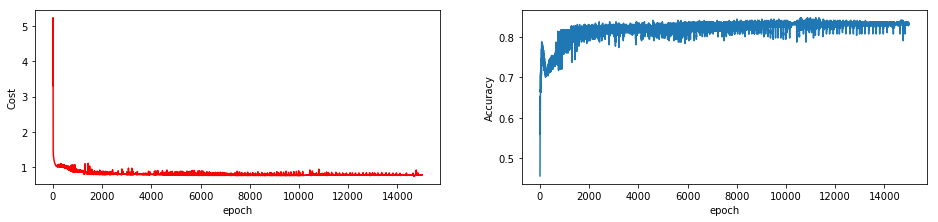

In [16]:
#### RUN this after training is done
#access the cost and accuracy during training by referencing the nnet object's attributes costs and accuracies
#This is done in the following way:
cost_training= nnet_2.costs
accuracy_training=nnet_2.accuracies
# Plots the cost and accuracy evolution during training 
fig = plt.figure(figsize=plt.figaspect(0.2))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(cost_training,'r')
plt.xlabel('epoch')
plt.ylabel('Cost')
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(accuracy_training)
plt.xlabel('epoch')
plt.ylabel('Accuracy')
A=np.array(accuracy_training)
best_epoch=np.argmax(A)
print('best_accuracy:',max(accuracy_training),'achieved at epoch:',best_epoch)

#### Visualize the posterior of the model trained above

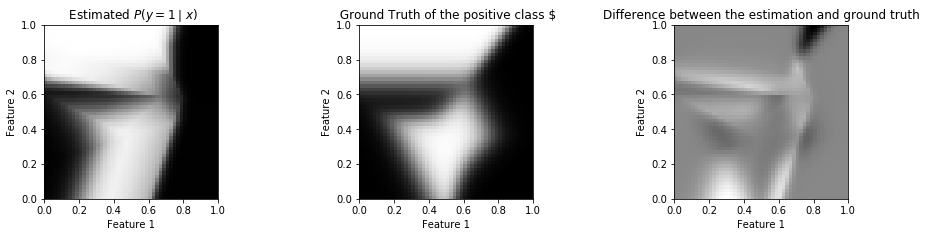

In [17]:
#### RUN this after training is done
x_rng = y_rng = np.linspace(0, 1, 50)
gridx,gridy = np.meshgrid(x_rng, y_rng)
p1=np.zeros((50,50))
p0=np.zeros((50,50))
for i in range(50):
    for j in range(50):
        v = np.array([gridx[i,j],gridy[i,j]])
        v=v[:,np.newaxis]
        out,dum1,dum2=nnet_2.feedforward(v)
        #print(out[0],out[1])
        p0[i,j]=out[0]
        p1[i,j]=out[1]
        #print(p0[i,j],p1[i,j])

fig = plt.figure(figsize=plt.figaspect(0.2))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(p1, extent=[0, 1, 0, 1], origin='lower')
ax1.set_title(" Estimated $P(y=1 \mid x)$")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

ax1 = fig.add_subplot(1, 3, 2)
ax1.imshow(posterior, extent=[0, 1, 0, 1], origin='lower')
ax1.set_title(" Ground Truth of the positive class $")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

ax1 = fig.add_subplot(1, 3, 3)
ax1.imshow(p1-posterior, extent=[0, 1, 0, 1], origin='lower')
ax1.set_title("Difference between the estimation and ground truth")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
plt.show()

## Comparison of two neural networks defined:

The neural network architecture with all sigmoid activation functions is a bit more accurate than the architecture with hidden ReLUs and sigmoid output (86.33% vs 84.66%). Train loss minimization is faster in the ReLU architecture but the full sigmoid architecture reaches a lower overall loss. Best accuracy is also reached faster in the full sigmoid architecture compared to ReLU. This is reflective in the visalized plots where Feature 1 and geound truth is clearer in the full sigmoid case